In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import time
import random
import country_converter as coco
import copy
import sqlite3
import matplotlib.pyplot as plt
from plotnine import *
pd.options.display.max_rows = 10000
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.
import missingno as miss

# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.

# Machine learning methods 
from sklearn.linear_model import LinearRegression as LM
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor as DTree
from sklearn.ensemble import BaggingRegressor as Bag
from sklearn.ensemble import RandomForestRegressor as RF

# For model interpretation
from sklearn.inspection import (
    permutation_importance,
    partial_dependence, 
    PartialDependenceDisplay, 
    plot_partial_dependence
)

# For evaluating our model's performance
import sklearn.metrics as m

# Pipeline to combine modeling elements
from sklearn.pipeline import Pipeline
warnings.filterwarnings('ignore')

In [2]:
url_un = "https://www.un.org/about-us/member-states"
page_un = requests.get(url_un)
page_un.status_code
# Check connection

200

In [3]:
# Parse the content
soup_un = BeautifulSoup(page_un.content, 'html.parser')
print(soup_un.prettify())

<!DOCTYPE html>
<html dir="ltr" lang="en">
 <head profile="http://www.w3.org/1999/xhtml/vocab">
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <!-- The above 3 meta tags *must* come first in the head; any other head content must come *after* these tags -->
  <meta content="" name="description"/>
  <meta content="United Nations" name="author"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="Drupal 7 (http://drupal.org)" name="Generator"/>
  <link href="/en/about-us/member-states" rel="canonical"/>
  <link href="/en/node/119289" rel="shortlink"/>
  <link href="https://www.un.org/sites/un2.un.org/themes/bootstrap_un2/favicon.ico" rel="shortcut icon" type="image/vnd.microsoft.icon"/>
  <title>
   Member States | United Nations
  </title>
  <meta content="Member States | United Nations" name="DC.Title"/>
  <meta content="" name="DC

In [4]:
# Find all the country name. 
soup_un.find_all('h2')

[<h2 class="element-invisible">Search the United Nations</h2>,
 <h2 class="mb-0">Afghanistan</h2>,
 <h2 class="mb-0">Albania</h2>,
 <h2 class="mb-0">Algeria</h2>,
 <h2 class="mb-0">Andorra</h2>,
 <h2 class="mb-0">Angola</h2>,
 <h2 class="mb-0">Antigua and Barbuda</h2>,
 <h2 class="mb-0">Argentina</h2>,
 <h2 class="mb-0">Armenia</h2>,
 <h2 class="mb-0">Australia</h2>,
 <h2 class="mb-0">Austria</h2>,
 <h2 class="mb-0">Azerbaijan</h2>,
 <h2 class="mb-0">Bahamas</h2>,
 <h2 class="mb-0">Bahrain</h2>,
 <h2 class="mb-0">Bangladesh</h2>,
 <h2 class="mb-0">Barbados</h2>,
 <h2 class="mb-0"><a href="https://www.un.org/en/about-us/member-states/belarus">Belarus</a></h2>,
 <h2 class="mb-0">Belgium</h2>,
 <h2 class="mb-0">Belize</h2>,
 <h2 class="mb-0"><a href="https://www.un.org/en/about-us/member-states/benin">Benin</a></h2>,
 <h2 class="mb-0">Bhutan</h2>,
 <h2 class="mb-0"><a href="https://www.un.org/en/about-us/member-states/bolivia">Bolivia (Plurinational State of)</a></h2>,
 <h2 class="mb-0"><

In [5]:
# Make the country name to a DataFrame
un_list = [i.get_text() for i in soup_un.find_all('h2')]
un_list.pop(0)
un_df = pd.DataFrame (un_list, columns = ['Name'])
un_df['Name'] = coco.convert (names = un_df['Name'], to = 'name_short')
un_df

Name
0                       Afghanistan
1                           Albania
2                           Algeria
3                           Andorra
4                            Angola
5               Antigua and Barbuda
6                         Argentina
7                           Armenia
8                         Australia
9                           Austria
10                       Azerbaijan
11                          Bahamas
12                          Bahrain
13                       Bangladesh
14                         Barbados
15                          Belarus
16                          Belgium
17                           Belize
18                            Benin
19                           Bhutan
20                          Bolivia
21           Bosnia and Herzegovina
22                         Botswana
23                           Brazil
24                Brunei Darussalam
25                         Bulgaria
26                     Burkina Faso
27                          Burundi
28                       Cabo Verde
29                         Cambodia
30                         Cameroon
31                           Canada
32         Central African Republic
33                             Chad
34                            Chile
35                            China
36                         Colombia
37                          Comoros
38                   Congo Republic
39                       Costa Rica
40                    Cote d'Ivoire
41                          Croatia
42                             Cuba
43                           Cyprus
44                   Czech Republic
45                      North Korea
46                         DR Congo
47                          Denmark
48                         Djibouti
49                         Dominica
50               Dominican Republic
51                          Ecuador
52                            Egypt
53                      El Salvador
54                Equatorial Guinea
55                          Eritrea
56                          Estonia
57                         Eswatini
58                         Ethiopia
59                             Fiji
60                          Finland
61                           France
62                            Gabon
63                           Gambia
64                          Georgia
65                          Germany
66                            Ghana
67                           Greece
68                          Grenada
69                        Guatemala
70                           Guinea
71                    Guinea-Bissau
72                           Guyana
73                            Haiti
74                         Honduras
75                          Hungary
76                          Iceland
77                            India
78                        Indonesia
79                             Iran
80                             Iraq
81                          Ireland
82                           Israel
83                            Italy
84                          Jamaica
85                            Japan
86                           Jordan
87                       Kazakhstan
88                            Kenya
89                         Kiribati
90                           Kuwait
91                  Kyrgyz Republic
92                             Laos
93                           Latvia
94                          Lebanon
95                          Lesotho
96                          Liberia
97                            Libya
98                    Liechtenstein
99                        Lithuania
100                      Luxembourg
101                      Madagascar
102                          Malawi
103                        Malaysia
104                        Maldives
105                            Mali
106                           Malta
107                Marshall Islands
108                      Mauritania
109                       Mauritius
110                          Mexico

In [6]:
url_pfi20 = "https://rsf.org/en/ranking/2020"
page_pfi20 = requests.get(url_pfi20)
page_pfi20.status_code

200

In [7]:
soup_pfi20 = BeautifulSoup(page_pfi20.content, 'html.parser')
pfi20_list = [i.get_text() for i in soup_pfi20.find_all('span')]
pfi20_list
pfi20_df = pd.DataFrame (pfi20_list)
pfi20_df = pfi20_df.drop(labels = range(0,11), axis = 0)
pfi20_df = pfi20_df.reset_index()
pfi20_df = pfi20_df.drop(['index'], axis = 1)
pfi20_df = pfi20_df.drop(labels = range(719,727), axis = 0)
pfi20_df

0
0                               1
1                          Norway
2                            7.84
3                                
4                               2
5                         Finland
6                            7.93
7                                
8                               3
9                         Denmark
10                           8.13
11                               
12                              4
13                         Sweden
14                           9.25
15                               
16                              5
17                    Netherlands
18                           9.96
19                               
20                              6
21                        Jamaica
22                          10.51
23                               
24                              7
25                     Costa Rica
26                          10.53
27                               
28                              8
29                    Switzerland
30                          10.62
31                               
32                              9
33                    New Zealand
34                          10.69
35                               
36                             10
37                       Portugal
38                          11.83
39                               
40                             11
41                        Germany
42                          12.16
43                               
44                             12
45                        Belgium
46                          12.57
47                               
48                             13
49                        Ireland
50                          12.60
51                               
52                             14
53                        Estonia
54                          12.61
55                               
56                             15
57                        Iceland
58                          15.12
59                               
60                             16
61                         Canada
62                          15.29
63                               
64                             17
65                     Luxembourg
66                          15.46
67                               
68                             18
69                        Austria
70                          15.78
71                               
72                             19
73                        Uruguay
74                          15.79
75                               
76                             20
77                       Suriname
78                          17.50
79                               
80                             21
81                          Samoa
82                          18.25
83                               
84                             22
85                         Latvia
86                          18.56
87                               
88                             23
89                        Namibia
90                          19.25
91                               
92                             24
93                  Liechtenstein
94                          19.52
95                               
96                             25
97                     Cabo Verde
98                          20.15
99                               
100                            26
101                     Australia
102                         20.21
103                              
104                            27
105                        Cyprus
106                         20.45
107                              
108                            28
109                     Lithuania
110                         21.19
111                              
112                            29
113                         Spain
114                         22.16
115                              
116                            30
117                 

In [8]:
pfi20_df_rank = pfi20_df[pfi20_df.index%4 == 0].reset_index()
pfi20_df_rank = pfi20_df_rank.drop(['index'], axis = 1)
pfi20_df_name = pfi20_df[pfi20_df.index%4 == 1].reset_index()
pfi20_df_name = pfi20_df_name.drop(['index'], axis = 1)

In [9]:
pfi20_df_rank.columns = list('a')
pfi20_df_rank = pfi20_df_rank.rename(columns = {'a':'PFI_Rank'})
pfi20_df_name.columns = list('a')
pfi20_df_name = pfi20_df_name.rename(columns = {'a':'Name'})
pfi20_df = pd.concat([pfi20_df_name,pfi20_df_rank], axis = 1)
pfi20_df

Name PFI_Rank
0                          Norway        1
1                         Finland        2
2                         Denmark        3
3                          Sweden        4
4                     Netherlands        5
5                         Jamaica        6
6                      Costa Rica        7
7                     Switzerland        8
8                     New Zealand        9
9                        Portugal       10
10                        Germany       11
11                        Belgium       12
12                        Ireland       13
13                        Estonia       14
14                        Iceland       15
15                         Canada       16
16                     Luxembourg       17
17                        Austria       18
18                        Uruguay       19
19                       Suriname       20
20                          Samoa       21
21                         Latvia       22
22                        Namibia       23
23                  Liechtenstein       24
24                     Cabo Verde       25
25                      Australia       26
26                         Cyprus       27
27                      Lithuania       28
28                          Spain       29
29                          Ghana       30
30                   South Africa       31
31                       Slovenia       32
32                       Slovakia       33
33                         France       34
34                 United Kingdom       35
35            Trinidad and Tobago       36
36                        Andorra       37
37                   Burkina Faso       38
38                       Botswana       39
39                 Czech Republic       40
40                          Italy       41
41                    South Korea       42
42                         Taiwan       43
43                           OECS       44
44                  United States       45
45               Papua New Guinea       46
46                        Senegal       47
47                        Romania       48
48                         Guyana       49
49                          Tonga       50
50                          Chile       51
51                           Fiji       52
52                         Belize       53
53                     Madagascar       54
54             Dominican Republic       55
55                      Mauritius       56
56                          Niger       57
57             Bosnia-Herzegovina       58
58                        Croatia       59
59                        Georgia       60
60                        Armenia       61
61                         Poland       62
62                     Seychelles       63
63                      Argentina       64
64                         Greece       65
65                          Japan       66
66                         Bhutan       67
67                  Côte d’Ivoire       68
68                         Malawi       69
69                         Kosovo       70
70                           Togo       71
71                        Tunisia       72
72                       Mongolia       73
73                    El Salvador       74
74                        Comoros       75
75                         Panama       76
76                Northern Cyprus       77
77                    Timor-Leste       78
78                       Maldives       79
79                      Hong Kong       80
80                          Malta       81
81                     Kyrgyzstan       82
82                          Haïti       83
83                        Albania       84
84                   Sierra Leone       85
85                        Lesotho       86
86                         Gambia       87
87                         Israel       88
88                        Hungary       89
89                           Peru       90
90                        Moldova       91
91                North Macedonia       92
92                         Ser

In [10]:
pfi20_df['Name'] = coco.convert(names = pfi20_df['Name'], to = 'name_short')

OECS not found in regex
More then one regular expression match for Morocco / Western Sahara
More then one regular expression match for Morocco / Western Sahara
More then one regular expression match for Morocco / Western Sahara
More then one regular expression match for Morocco / Western Sahara


In [11]:
pfi20_df = pfi20_df.drop([132])

In [12]:
pfi20_df = pfi20_df.merge(un_df, how = 'inner', on = 'Name')
pfi20_df

Name PFI_Rank
0                      Norway        1
1                     Finland        2
2                     Denmark        3
3                      Sweden        4
4                 Netherlands        5
5                     Jamaica        6
6                  Costa Rica        7
7                 Switzerland        8
8                 New Zealand        9
9                    Portugal       10
10                    Germany       11
11                    Belgium       12
12                    Ireland       13
13                    Estonia       14
14                    Iceland       15
15                     Canada       16
16                 Luxembourg       17
17                    Austria       18
18                    Uruguay       19
19                   Suriname       20
20                      Samoa       21
21                     Latvia       22
22                    Namibia       23
23              Liechtenstein       24
24                 Cabo Verde       25
25                  Australia       26
26                     Cyprus       27
27                     Cyprus       77
28                  Lithuania       28
29                      Spain       29
30                      Ghana       30
31               South Africa       31
32                   Slovenia       32
33                   Slovakia       33
34                     France       34
35             United Kingdom       35
36        Trinidad and Tobago       36
37                    Andorra       37
38               Burkina Faso       38
39                   Botswana       39
40             Czech Republic       40
41                      Italy       41
42                South Korea       42
43              United States       45
44           Papua New Guinea       46
45                    Senegal       47
46                    Romania       48
47                     Guyana       49
48                      Tonga       50
49                      Chile       51
50                       Fiji       52
51                     Belize       53
52                 Madagascar       54
53         Dominican Republic       55
54                  Mauritius       56
55                      Niger       57
56     Bosnia and Herzegovina       58
57                    Croatia       59
58                    Georgia       60
59                    Armenia       61
60                     Poland       62
61                 Seychelles       63
62                  Argentina       64
63                     Greece       65
64                      Japan       66
65                     Bhutan       67
66              Cote d'Ivoire       68
67                     Malawi       69
68                       Togo       71
69                    Tunisia       72
70                   Mongolia       73
71                El Salvador       74
72                    Comoros       75
73                     Panama       76
74                Timor-Leste       78
75                   Maldives       79
76                      Malta       81
77            Kyrgyz Republic       82
78                      Haiti       83
79                    Albania       84
80               Sierra Leone       85
81                    Lesotho       86
82                     Gambia       87
83                     Israel       88
84                    Hungary       89
85                       Peru       90
86                    Moldova       91
87                  Macedonia       92
88                     Serbia       93
89              Guinea-Bissau       94
90                    Liberia       95
91                    Ukraine       96
92                 Mauritania       97
93                    Ecuador       98
94                   Ethiopia       99
95                   Paraguay      100
96                   Malaysia      101
97                    Lebanon      102
98                      Kenya      103
99                 Mozambique      104
100                Montenegro      105
101                    Angola      106
102     

In [13]:
pfi20_df = pfi20_df.rename(columns = {'Name':'Year&Country'})
pfi20_df['Year&Country'] = "2020, " + pfi20_df['Year&Country'].astype(str)
pfi20_df

Year&Country PFI_Rank
0                      2020, Norway        1
1                     2020, Finland        2
2                     2020, Denmark        3
3                      2020, Sweden        4
4                 2020, Netherlands        5
5                     2020, Jamaica        6
6                  2020, Costa Rica        7
7                 2020, Switzerland        8
8                 2020, New Zealand        9
9                    2020, Portugal       10
10                    2020, Germany       11
11                    2020, Belgium       12
12                    2020, Ireland       13
13                    2020, Estonia       14
14                    2020, Iceland       15
15                     2020, Canada       16
16                 2020, Luxembourg       17
17                    2020, Austria       18
18                    2020, Uruguay       19
19                   2020, Suriname       20
20                      2020, Samoa       21
21                     2020, Latvia       22
22                    2020, Namibia       23
23              2020, Liechtenstein       24
24                 2020, Cabo Verde       25
25                  2020, Australia       26
26                     2020, Cyprus       27
27                     2020, Cyprus       77
28                  2020, Lithuania       28
29                      2020, Spain       29
30                      2020, Ghana       30
31               2020, South Africa       31
32                   2020, Slovenia       32
33                   2020, Slovakia       33
34                     2020, France       34
35             2020, United Kingdom       35
36        2020, Trinidad and Tobago       36
37                    2020, Andorra       37
38               2020, Burkina Faso       38
39                   2020, Botswana       39
40             2020, Czech Republic       40
41                      2020, Italy       41
42                2020, South Korea       42
43              2020, United States       45
44           2020, Papua New Guinea       46
45                    2020, Senegal       47
46                    2020, Romania       48
47                     2020, Guyana       49
48                      2020, Tonga       50
49                      2020, Chile       51
50                       2020, Fiji       52
51                     2020, Belize       53
52                 2020, Madagascar       54
53         2020, Dominican Republic       55
54                  2020, Mauritius       56
55                      2020, Niger       57
56     2020, Bosnia and Herzegovina       58
57                    2020, Croatia       59
58                    2020, Georgia       60
59                    2020, Armenia       61
60                     2020, Poland       62
61                 2020, Seychelles       63
62                  2020, Argentina       64
63                     2020, Greece       65
64                      2020, Japan       66
65                     2020, Bhutan       67
66              2020, Cote d'Ivoire       68
67                     2020, Malawi       69
68                       2020, Togo       71
69                    2020, Tunisia       72
70                   2020, Mongolia       73
71                2020, El Salvador       74
72                    2020, Comoros       75
73                     2020, Panama       76
74                2020, Timor-Leste       78
75                   2020, Maldives       79
76                      2020, Malta       81
77            2020, Kyrgyz Republic       82
78                      2020, Haiti       83
79                    2020, Albania       84
80               2020, Sierra Leone       85
81                    2020, Lesotho       86
82                     2020, Gambia       87
83                     2020, Israel       88
84                    2020, Hungary       89
85                       2020, Peru       90
86                    2020, Moldova       91
87                  2020, Macedonia       92
88                

In [14]:
url_pfi19 = "https://rsf.org/en/ranking/2019"
page_pfi19 = requests.get(url_pfi19)
soup_pfi19 = BeautifulSoup(page_pfi19.content, 'html.parser')
pfi19_list = [i.get_text() for i in soup_pfi19.find_all('span')]
pfi19_list
pfi19_df = pd.DataFrame (pfi19_list)
pfi19_df = pfi19_df.drop(labels = range(0,11), axis = 0)
pfi19_df = pfi19_df.reset_index()
pfi19_df = pfi19_df.drop(['index'], axis = 1)
pfi19_df = pfi19_df.drop(labels = range(719,727), axis = 0)
pfi19_df_rank = pfi19_df[pfi19_df.index%4 == 0].reset_index()
pfi19_df_rank = pfi19_df_rank.drop(['index'], axis = 1)
pfi19_df_name = pfi19_df[pfi19_df.index%4 == 1].reset_index()
pfi19_df_name = pfi19_df_name.drop(['index'], axis = 1)
pfi19_df_rank.columns = list('a')
pfi19_df_rank = pfi19_df_rank.rename(columns = {'a':'PFI_Rank'})
pfi19_df_name.columns = list('a')
pfi19_df_name = pfi19_df_name.rename(columns = {'a':'Name'})
pfi19_df = pd.concat([pfi19_df_name,pfi19_df_rank], axis = 1)
pfi19_df['Name'] = coco.convert(names = pfi19_df['Name'], to = 'name_short')
pfi19_df

OECS not found in regex
More then one regular expression match for Morocco / Western Sahara
More then one regular expression match for Morocco / Western Sahara
More then one regular expression match for Morocco / Western Sahara
More then one regular expression match for Morocco / Western Sahara


Name PFI_Rank
0                       Norway        1
1                      Finland        2
2                       Sweden        3
3                  Netherlands        4
4                      Denmark        5
5                  Switzerland        6
6                  New Zealand        7
7                      Jamaica        8
8                      Belgium        9
9                   Costa Rica       10
10                     Estonia       11
11                    Portugal       12
12                     Germany       13
13                     Iceland       14
14                     Ireland       15
15                     Austria       16
16                  Luxembourg       17
17                      Canada       18
18                     Uruguay       19
19                    Suriname       20
20                   Australia       21
21                       Samoa       22
22                     Namibia       23
23                      Latvia       24
24                  Cabo Verde       25
25               Liechtenstein       26
26                       Ghana       27
27                      Cyprus       28
28                       Spain       29
29                   Lithuania       30
30                South Africa       31
31                      France       32
32              United Kingdom       33
33                    Slovenia       34
34                    Slovakia       35
35                Burkina Faso       36
36                     Andorra       37
37            Papua New Guinea       38
38         Trinidad and Tobago       39
39              Czech Republic       40
40                 South Korea       41
41                      Taiwan       42
42                       Italy       43
43                    Botswana       44
44                       Tonga       45
45                       Chile       46
46                     Romania       47
47               United States       48
48                     Senegal       49
49                   not found       50
50                      Guyana       51
51                        Fiji       52
52                      Belize       53
53                  Madagascar       54
54          Dominican Republic       55
55                     Comoros       56
56                   Argentina       57
57                   Mauritius       58
58                      Poland       59
59                     Georgia       60
60                     Armenia       61
61                       Haiti       62
62      Bosnia and Herzegovina       63
63                     Croatia       64
64                      Greece       65
65                       Niger       66
66                       Japan       67
67                      Malawi       68
68                  Seychelles       69
69                    Mongolia       70
70               Cote d'Ivoire       71
71                     Tunisia       72
72                   Hong Kong       73
73                      Cyprus       74
74                      Kosovo       75
75                        Togo       76
76                       Malta       77
77                     Lesotho       78
78                      Panama       79
79                      Bhutan       80
80                 El Salvador       81
81                     Albania       82
82             Kyrgyz Republic       83
83                 Timor-Leste       84
84                        Peru       85
85                Sierra Leone       86
86                     Hungary       87
87                      Israel       88
88               Guinea-Bissau       89
89                      Serbia       90
90                     Moldova       91
91                      Gambia       92
92                     Liberia       93
93                  Mauritania       94
94                   Macedonia       95
95                       Benin       96
96                     Ecuador       97
97                    Maldives       98
98                    Paraguay       99
99                       K

In [15]:
pfi19_df = pfi19_df.drop([134])
pfi19_df = pfi19_df.merge(un_df, how = 'inner', on = 'Name')
pfi19_df = pfi19_df.rename(columns = {'Name':'Year&Country'})
pfi19_df['Year&Country'] = "2019, " + pfi19_df['Year&Country'].astype(str)
pfi19_df

Year&Country PFI_Rank
0                      2019, Norway        1
1                     2019, Finland        2
2                      2019, Sweden        3
3                 2019, Netherlands        4
4                     2019, Denmark        5
5                 2019, Switzerland        6
6                 2019, New Zealand        7
7                     2019, Jamaica        8
8                     2019, Belgium        9
9                  2019, Costa Rica       10
10                    2019, Estonia       11
11                   2019, Portugal       12
12                    2019, Germany       13
13                    2019, Iceland       14
14                    2019, Ireland       15
15                    2019, Austria       16
16                 2019, Luxembourg       17
17                     2019, Canada       18
18                    2019, Uruguay       19
19                   2019, Suriname       20
20                  2019, Australia       21
21                      2019, Samoa       22
22                    2019, Namibia       23
23                     2019, Latvia       24
24                 2019, Cabo Verde       25
25              2019, Liechtenstein       26
26                      2019, Ghana       27
27                     2019, Cyprus       28
28                     2019, Cyprus       74
29                      2019, Spain       29
30                  2019, Lithuania       30
31               2019, South Africa       31
32                     2019, France       32
33             2019, United Kingdom       33
34                   2019, Slovenia       34
35                   2019, Slovakia       35
36               2019, Burkina Faso       36
37                    2019, Andorra       37
38           2019, Papua New Guinea       38
39        2019, Trinidad and Tobago       39
40             2019, Czech Republic       40
41                2019, South Korea       41
42                      2019, Italy       43
43                   2019, Botswana       44
44                      2019, Tonga       45
45                      2019, Chile       46
46                    2019, Romania       47
47              2019, United States       48
48                    2019, Senegal       49
49                     2019, Guyana       51
50                       2019, Fiji       52
51                     2019, Belize       53
52                 2019, Madagascar       54
53         2019, Dominican Republic       55
54                    2019, Comoros       56
55                  2019, Argentina       57
56                  2019, Mauritius       58
57                     2019, Poland       59
58                    2019, Georgia       60
59                    2019, Armenia       61
60                      2019, Haiti       62
61     2019, Bosnia and Herzegovina       63
62                    2019, Croatia       64
63                     2019, Greece       65
64                      2019, Niger       66
65                      2019, Japan       67
66                     2019, Malawi       68
67                 2019, Seychelles       69
68                   2019, Mongolia       70
69              2019, Cote d'Ivoire       71
70                    2019, Tunisia       72
71                       2019, Togo       76
72                      2019, Malta       77
73                    2019, Lesotho       78
74                     2019, Panama       79
75                     2019, Bhutan       80
76                2019, El Salvador       81
77                    2019, Albania       82
78            2019, Kyrgyz Republic       83
79                2019, Timor-Leste       84
80                       2019, Peru       85
81               2019, Sierra Leone       86
82                    2019, Hungary       87
83                     2019, Israel       88
84              2019, Guinea-Bissau       89
85                     2019, Serbia       90
86                    2019, Moldova       91
87                     2019, Gambia       92
88                

In [16]:
url_pfi18 = "https://rsf.org/en/ranking/2018"
page_pfi18 = requests.get(url_pfi18)
soup_pfi18 = BeautifulSoup(page_pfi18.content, 'html.parser')
pfi18_list = [i.get_text() for i in soup_pfi18.find_all('span')]
pfi18_list
pfi18_df = pd.DataFrame (pfi18_list)
pfi18_df = pfi18_df.drop(labels = range(0,11), axis = 0)
pfi18_df = pfi18_df.reset_index()
pfi18_df = pfi18_df.drop(['index'], axis = 1)
pfi18_df = pfi18_df.drop(labels = range(719,727), axis = 0)
pfi18_df_rank = pfi18_df[pfi18_df.index%4 == 0].reset_index()
pfi18_df_rank = pfi18_df_rank.drop(['index'], axis = 1)
pfi18_df_name = pfi18_df[pfi18_df.index%4 == 1].reset_index()
pfi18_df_name = pfi18_df_name.drop(['index'], axis = 1)
pfi18_df_rank.columns = list('a')
pfi18_df_rank = pfi18_df_rank.rename(columns = {'a':'PFI_Rank'})
pfi18_df_name.columns = list('a')
pfi18_df_name = pfi18_df_name.rename(columns = {'a':'Name'})
pfi18_df = pd.concat([pfi18_df_name,pfi18_df_rank], axis = 1)
pfi18_df['Name'] = coco.convert(names = pfi18_df['Name'], to = 'name_short')
pfi18_df

OECS not found in regex
More then one regular expression match for Morocco / Western Sahara
More then one regular expression match for Morocco / Western Sahara
More then one regular expression match for Morocco / Western Sahara
More then one regular expression match for Morocco / Western Sahara


Name PFI_Rank
0                       Norway        1
1                       Sweden        2
2                  Netherlands        3
3                      Finland        4
4                  Switzerland        5
5                      Jamaica        6
6                      Belgium        7
7                  New Zealand        8
8                      Denmark        9
9                   Costa Rica       10
10                     Austria       11
11                     Estonia       12
12                     Iceland       13
13                    Portugal       14
14                     Germany       15
15                     Ireland       16
16                  Luxembourg       17
17                      Canada       18
18                   Australia       19
19                     Uruguay       20
20                    Suriname       21
21                       Samoa       22
22                       Ghana       23
23                      Latvia       24
24                      Cyprus       25
25                     Namibia       26
26                    Slovakia       27
27                South Africa       28
28                  Cabo Verde       29
29               Liechtenstein       30
30                       Spain       31
31                    Slovenia       32
32                      France       33
33              Czech Republic       34
34                   not found       35
35                   Lithuania       36
36                     Andorra       37
37                       Chile       38
38         Trinidad and Tobago       39
39              United Kingdom       40
40                Burkina Faso       41
41                      Taiwan       42
42                 South Korea       43
43                     Romania       44
44               United States       45
45                       Italy       46
46                      Belize       47
47                    Botswana       48
48                     Comoros       49
49                     Senegal       50
50                       Tonga       51
51                   Argentina       52
52            Papua New Guinea       53
53                  Madagascar       54
54                      Guyana       55
55                   Mauritius       56
56                        Fiji       57
57                      Poland       58
58          Dominican Republic       59
59                       Haiti       60
60                     Georgia       61
61      Bosnia and Herzegovina       62
62                       Niger       63
63                      Malawi       64
64                       Malta       65
65                 El Salvador       66
66                       Japan       67
67                     Lesotho       68
68                     Croatia       69
69                   Hong Kong       70
70                    Mongolia       71
71                  Mauritania       72
72                     Hungary       73
73                      Greece       74
74                     Albania       75
75                      Serbia       76
76                      Cyprus       77
77                      Kosovo       78
78                Sierra Leone       79
79                     Armenia       80
80                     Moldova       81
81               Cote d'Ivoire       82
82               Guinea-Bissau       83
83                       Benin       84
84                  Seychelles       85
85                        Togo       86
86                      Israel       87
87                        Peru       88
88                     Liberia       89
89                   Nicaragua       90
90                      Panama       91
91                     Ecuador       92
92                    Tanzania       93
93                      Bhutan       94
94                 Timor-Leste       95
95                       Kenya       96
96                     Tunisia       97
97             Kyrgyz Republic       98
98                  Mozambique       99
99                     Leb

In [17]:
pfi18_df = pfi18_df.drop([134])
pfi18_df = pfi18_df.merge(un_df, how = 'inner', on = 'Name')
pfi18_df = pfi18_df.rename(columns = {'Name':'Year&Country'})
pfi18_df['Year&Country'] = "2018, " + pfi18_df['Year&Country'].astype(str)
pfi18_df

Year&Country PFI_Rank
0                      2018, Norway        1
1                      2018, Sweden        2
2                 2018, Netherlands        3
3                     2018, Finland        4
4                 2018, Switzerland        5
5                     2018, Jamaica        6
6                     2018, Belgium        7
7                 2018, New Zealand        8
8                     2018, Denmark        9
9                  2018, Costa Rica       10
10                    2018, Austria       11
11                    2018, Estonia       12
12                    2018, Iceland       13
13                   2018, Portugal       14
14                    2018, Germany       15
15                    2018, Ireland       16
16                 2018, Luxembourg       17
17                     2018, Canada       18
18                  2018, Australia       19
19                    2018, Uruguay       20
20                   2018, Suriname       21
21                      2018, Samoa       22
22                      2018, Ghana       23
23                     2018, Latvia       24
24                     2018, Cyprus       25
25                     2018, Cyprus       77
26                    2018, Namibia       26
27                   2018, Slovakia       27
28               2018, South Africa       28
29                 2018, Cabo Verde       29
30              2018, Liechtenstein       30
31                      2018, Spain       31
32                   2018, Slovenia       32
33                     2018, France       33
34             2018, Czech Republic       34
35                  2018, Lithuania       36
36                    2018, Andorra       37
37                      2018, Chile       38
38        2018, Trinidad and Tobago       39
39             2018, United Kingdom       40
40               2018, Burkina Faso       41
41                2018, South Korea       43
42                    2018, Romania       44
43              2018, United States       45
44                      2018, Italy       46
45                     2018, Belize       47
46                   2018, Botswana       48
47                    2018, Comoros       49
48                    2018, Senegal       50
49                      2018, Tonga       51
50                  2018, Argentina       52
51           2018, Papua New Guinea       53
52                 2018, Madagascar       54
53                     2018, Guyana       55
54                  2018, Mauritius       56
55                       2018, Fiji       57
56                     2018, Poland       58
57         2018, Dominican Republic       59
58                      2018, Haiti       60
59                    2018, Georgia       61
60     2018, Bosnia and Herzegovina       62
61                      2018, Niger       63
62                     2018, Malawi       64
63                      2018, Malta       65
64                2018, El Salvador       66
65                      2018, Japan       67
66                    2018, Lesotho       68
67                    2018, Croatia       69
68                   2018, Mongolia       71
69                 2018, Mauritania       72
70                    2018, Hungary       73
71                     2018, Greece       74
72                    2018, Albania       75
73                     2018, Serbia       76
74               2018, Sierra Leone       79
75                    2018, Armenia       80
76                    2018, Moldova       81
77              2018, Cote d'Ivoire       82
78              2018, Guinea-Bissau       83
79                      2018, Benin       84
80                 2018, Seychelles       85
81                       2018, Togo       86
82                     2018, Israel       87
83                       2018, Peru       88
84                    2018, Liberia       89
85                  2018, Nicaragua       90
86                     2018, Panama       91
87                    2018, Ecuador       92
88                

In [18]:
url_pfi17 = "https://rsf.org/en/ranking/2017"
page_pfi17 = requests.get(url_pfi17)
soup_pfi17 = BeautifulSoup(page_pfi17.content, 'html.parser')
pfi17_list = [i.get_text() for i in soup_pfi17.find_all('span')]
pfi17_list
pfi17_df = pd.DataFrame (pfi17_list)
pfi17_df = pfi17_df.drop(labels = range(0,11), axis = 0)
pfi17_df = pfi17_df.reset_index()
pfi17_df = pfi17_df.drop(['index'], axis = 1)
pfi17_df = pfi17_df.drop(labels = range(719,727), axis = 0)
pfi17_df_rank = pfi17_df[pfi17_df.index%4 == 0].reset_index()
pfi17_df_rank = pfi17_df_rank.drop(['index'], axis = 1)
pfi17_df_name = pfi17_df[pfi17_df.index%4 == 1].reset_index()
pfi17_df_name = pfi17_df_name.drop(['index'], axis = 1)
pfi17_df_rank.columns = list('a')
pfi17_df_rank = pfi17_df_rank.rename(columns = {'a':'PFI_Rank'})
pfi17_df_name.columns = list('a')
pfi17_df_name = pfi17_df_name.rename(columns = {'a':'Name'})
pfi17_df = pd.concat([pfi17_df_name,pfi17_df_rank], axis = 1)
pfi17_df['Name'] = coco.convert(names = pfi17_df['Name'], to = 'name_short')
pfi17_df

OECS not found in regex
More then one regular expression match for Morocco / Western Sahara
More then one regular expression match for Morocco / Western Sahara
More then one regular expression match for Morocco / Western Sahara
More then one regular expression match for Morocco / Western Sahara


Name PFI_Rank
0                       Norway        1
1                       Sweden        2
2                      Finland        3
3                      Denmark        4
4                  Netherlands        5
5                   Costa Rica        6
6                  Switzerland        7
7                      Jamaica        8
8                      Belgium        9
9                      Iceland       10
10                     Austria       11
11                     Estonia       12
12                 New Zealand       13
13                     Ireland       14
14                  Luxembourg       15
15                     Germany       16
16                    Slovakia       17
17                    Portugal       18
18                   Australia       19
19                    Suriname       20
20                       Samoa       21
21                      Canada       22
22              Czech Republic       23
23                     Namibia       24
24                     Uruguay       25
25                       Ghana       26
26                  Cabo Verde       27
27                      Latvia       28
28                       Spain       29
29                      Cyprus       30
30                South Africa       31
31               Liechtenstein       32
32                       Chile       33
33         Trinidad and Tobago       34
34                     Andorra       35
35                   Lithuania       36
36                    Slovenia       37
37                   not found       38
38                      France       39
39              United Kingdom       40
40                      Belize       41
41                Burkina Faso       42
42               United States       43
43                     Comoros       44
44                      Taiwan       45
45                     Romania       46
46                       Malta       47
47                    Botswana       48
48                       Tonga       49
49                   Argentina       50
50            Papua New Guinea       51
51                       Italy       52
52                       Haiti       53
53                      Poland       54
54                  Mauritania       55
55                   Mauritius       56
56                  Madagascar       57
57                     Senegal       58
58          Dominican Republic       59
59                      Guyana       60
60                       Niger       61
61                 El Salvador       62
62                 South Korea       63
63                     Georgia       64
64      Bosnia and Herzegovina       65
65                      Serbia       66
66                        Fiji       67
67                     Lesotho       68
68                    Mongolia       69
69                      Malawi       70
70                     Hungary       71
71                       Japan       72
72                   Hong Kong       73
73                     Croatia       74
74                      Cyprus       75
75                     Albania       76
76               Guinea-Bissau       77
77                       Benin       78
78                     Armenia       79
79                     Moldova       80
80               Cote d'Ivoire       81
81                      Kosovo       82
82                    Tanzania       83
83                      Bhutan       84
84                Sierra Leone       85
85                        Togo       86
86                  Seychelles       87
87                      Greece       88
88             Kyrgyz Republic       89
89                        Peru       90
90                      Israel       91
91                   Nicaragua       92
92                  Mozambique       93
93                     Liberia       94
94                       Kenya       95
95                      Panama       96
96                     Tunisia       97
97                 Timor-Leste       98
98                     Lebanon       99
99                       N

In [19]:
pfi17_df = pfi17_df.drop([132])
pfi17_df = pfi17_df.merge(un_df, how = 'inner', on = 'Name')
pfi17_df = pfi17_df.rename(columns = {'Name':'Year&Country'})
pfi17_df['Year&Country'] = "2017, " + pfi17_df['Year&Country'].astype(str)
pfi17_df

Year&Country PFI_Rank
0                      2017, Norway        1
1                      2017, Sweden        2
2                     2017, Finland        3
3                     2017, Denmark        4
4                 2017, Netherlands        5
5                  2017, Costa Rica        6
6                 2017, Switzerland        7
7                     2017, Jamaica        8
8                     2017, Belgium        9
9                     2017, Iceland       10
10                    2017, Austria       11
11                    2017, Estonia       12
12                2017, New Zealand       13
13                    2017, Ireland       14
14                 2017, Luxembourg       15
15                    2017, Germany       16
16                   2017, Slovakia       17
17                   2017, Portugal       18
18                  2017, Australia       19
19                   2017, Suriname       20
20                      2017, Samoa       21
21                     2017, Canada       22
22             2017, Czech Republic       23
23                    2017, Namibia       24
24                    2017, Uruguay       25
25                      2017, Ghana       26
26                 2017, Cabo Verde       27
27                     2017, Latvia       28
28                      2017, Spain       29
29                     2017, Cyprus       30
30                     2017, Cyprus       75
31               2017, South Africa       31
32              2017, Liechtenstein       32
33                      2017, Chile       33
34        2017, Trinidad and Tobago       34
35                    2017, Andorra       35
36                  2017, Lithuania       36
37                   2017, Slovenia       37
38                     2017, France       39
39             2017, United Kingdom       40
40                     2017, Belize       41
41               2017, Burkina Faso       42
42              2017, United States       43
43                    2017, Comoros       44
44                    2017, Romania       46
45                      2017, Malta       47
46                   2017, Botswana       48
47                      2017, Tonga       49
48                  2017, Argentina       50
49           2017, Papua New Guinea       51
50                      2017, Italy       52
51                      2017, Haiti       53
52                     2017, Poland       54
53                 2017, Mauritania       55
54                  2017, Mauritius       56
55                 2017, Madagascar       57
56                    2017, Senegal       58
57         2017, Dominican Republic       59
58                     2017, Guyana       60
59                      2017, Niger       61
60                2017, El Salvador       62
61                2017, South Korea       63
62                    2017, Georgia       64
63     2017, Bosnia and Herzegovina       65
64                     2017, Serbia       66
65                       2017, Fiji       67
66                    2017, Lesotho       68
67                   2017, Mongolia       69
68                     2017, Malawi       70
69                    2017, Hungary       71
70                      2017, Japan       72
71                    2017, Croatia       74
72                    2017, Albania       76
73              2017, Guinea-Bissau       77
74                      2017, Benin       78
75                    2017, Armenia       79
76                    2017, Moldova       80
77              2017, Cote d'Ivoire       81
78                   2017, Tanzania       83
79                     2017, Bhutan       84
80               2017, Sierra Leone       85
81                       2017, Togo       86
82                 2017, Seychelles       87
83                     2017, Greece       88
84            2017, Kyrgyz Republic       89
85                       2017, Peru       90
86                     2017, Israel       91
87                  2017, Nicaragua       92
88                

In [20]:
url_pfi16 = "https://rsf.org/en/ranking/2016"
page_pfi16 = requests.get(url_pfi16)
soup_pfi16 = BeautifulSoup(page_pfi16.content, 'html.parser')
pfi16_list = [i.get_text() for i in soup_pfi16.find_all('span')]
pfi16_list
pfi16_df = pd.DataFrame (pfi16_list)
pfi16_df = pfi16_df.drop(labels = range(0,11), axis = 0)
pfi16_df = pfi16_df.reset_index()
pfi16_df = pfi16_df.drop(['index'], axis = 1)
pfi16_df = pfi16_df.drop(labels = range(719,727), axis = 0)
pfi16_df_rank = pfi16_df[pfi16_df.index%4 == 0].reset_index()
pfi16_df_rank = pfi16_df_rank.drop(['index'], axis = 1)
pfi16_df_name = pfi16_df[pfi16_df.index%4 == 1].reset_index()
pfi16_df_name = pfi16_df_name.drop(['index'], axis = 1)
pfi16_df_rank.columns = list('a')
pfi16_df_rank = pfi16_df_rank.rename(columns = {'a':'PFI_Rank'})
pfi16_df_name.columns = list('a')
pfi16_df_name = pfi16_df_name.rename(columns = {'a':'Name'})
pfi16_df = pd.concat([pfi16_df_name,pfi16_df_rank], axis = 1)
pfi16_df['Name'] = coco.convert(names = pfi16_df['Name'], to = 'name_short')
pfi16_df

OECS not found in regex
More then one regular expression match for Morocco / Western Sahara
More then one regular expression match for Morocco / Western Sahara
More then one regular expression match for Morocco / Western Sahara
More then one regular expression match for Morocco / Western Sahara


Name PFI_Rank
0                      Finland        1
1                  Netherlands        2
2                       Norway        3
3                      Denmark        4
4                  New Zealand        5
5                   Costa Rica        6
6                  Switzerland        7
7                       Sweden        8
8                      Ireland        9
9                      Jamaica       10
10                     Austria       11
11                    Slovakia       12
12                     Belgium       13
13                     Estonia       14
14                  Luxembourg       15
15                     Germany       16
16                     Namibia       17
17                      Canada       18
18                     Iceland       19
19                     Uruguay       20
20              Czech Republic       21
21                    Suriname       22
22                    Portugal       23
23                      Latvia       24
24                   Australia       25
25                       Ghana       26
26               Liechtenstein       28
27                       Samoa       29
28                   not found       30
29                       Chile       31
30                  Cabo Verde       32
31                     Andorra       33
32                       Spain       34
33                   Lithuania       35
34                      Belize       36
35                       Tonga       37
36              United Kingdom       38
37                South Africa       39
38                    Slovenia       40
39               United States       41
40                Burkina Faso       42
41                    Botswana       43
42         Trinidad and Tobago       44
43                      France       45
44                       Malta       46
45                      Poland       47
46                  Mauritania       48
47                     Romania       49
48                     Comoros       50
49                      Taiwan       51
50                       Niger       52
51                       Haiti       53
52                   Argentina       54
53            Papua New Guinea       55
54                  Madagascar       56
55                      Guyana       57
56                 El Salvador       58
57                      Serbia       59
58                    Mongolia       60
59                   Mauritius       61
60          Dominican Republic       62
61                     Croatia       63
62                     Georgia       64
63                     Senegal       65
64                      Malawi       66
65                     Hungary       67
66      Bosnia and Herzegovina       68
67                   Hong Kong       69
68                 South Korea       70
69                    Tanzania       71
70                       Japan       72
71                     Lesotho       73
72                     Armenia       74
73                      Cyprus       75
74                   Nicaragua       75
75                     Moldova       76
76                       Italy       77
77                       Benin       78
78               Guinea-Bissau       79
79                        Fiji       80
80                      Cyprus       81
81                     Albania       82
82                Sierra Leone       83
83                        Peru       84
84             Kyrgyz Republic       85
85               Cote d'Ivoire       86
86                  Mozambique       87
87                        Togo       88
88                      Greece       89
89                      Kosovo       90
90                      Panama       91
91                  Seychelles       92
92                     Liberia       93
93                      Bhutan       94
94                       Kenya       95
95                     Tunisia       96
96                     Bolivia       97
97                     Lebanon       98
98                 Timor-Leste       99
99                       G

In [21]:
pfi16_df = pfi16_df.drop([130])
pfi16_df = pfi16_df.merge(un_df, how = 'inner', on = 'Name')
pfi16_df = pfi16_df.rename(columns = {'Name':'Year&Country'})
pfi16_df['Year&Country'] = "2016, " + pfi16_df['Year&Country'].astype(str)
pfi16_df

Year&Country PFI_Rank
0                     2016, Finland        1
1                 2016, Netherlands        2
2                      2016, Norway        3
3                     2016, Denmark        4
4                 2016, New Zealand        5
5                  2016, Costa Rica        6
6                 2016, Switzerland        7
7                      2016, Sweden        8
8                     2016, Ireland        9
9                     2016, Jamaica       10
10                    2016, Austria       11
11                   2016, Slovakia       12
12                    2016, Belgium       13
13                    2016, Estonia       14
14                 2016, Luxembourg       15
15                    2016, Germany       16
16                    2016, Namibia       17
17                     2016, Canada       18
18                    2016, Iceland       19
19                    2016, Uruguay       20
20             2016, Czech Republic       21
21                   2016, Suriname       22
22                   2016, Portugal       23
23                     2016, Latvia       24
24                  2016, Australia       25
25                      2016, Ghana       26
26              2016, Liechtenstein       28
27                      2016, Samoa       29
28                      2016, Chile       31
29                 2016, Cabo Verde       32
30                    2016, Andorra       33
31                      2016, Spain       34
32                  2016, Lithuania       35
33                     2016, Belize       36
34                      2016, Tonga       37
35             2016, United Kingdom       38
36               2016, South Africa       39
37                   2016, Slovenia       40
38              2016, United States       41
39               2016, Burkina Faso       42
40                   2016, Botswana       43
41        2016, Trinidad and Tobago       44
42                     2016, France       45
43                      2016, Malta       46
44                     2016, Poland       47
45                 2016, Mauritania       48
46                    2016, Romania       49
47                    2016, Comoros       50
48                      2016, Niger       52
49                      2016, Haiti       53
50                  2016, Argentina       54
51           2016, Papua New Guinea       55
52                 2016, Madagascar       56
53                     2016, Guyana       57
54                2016, El Salvador       58
55                     2016, Serbia       59
56                   2016, Mongolia       60
57                  2016, Mauritius       61
58         2016, Dominican Republic       62
59                    2016, Croatia       63
60                    2016, Georgia       64
61                    2016, Senegal       65
62                     2016, Malawi       66
63                    2016, Hungary       67
64     2016, Bosnia and Herzegovina       68
65                2016, South Korea       70
66                   2016, Tanzania       71
67                      2016, Japan       72
68                    2016, Lesotho       73
69                    2016, Armenia       74
70                     2016, Cyprus       75
71                     2016, Cyprus       81
72                  2016, Nicaragua       75
73                    2016, Moldova       76
74                      2016, Italy       77
75                      2016, Benin       78
76              2016, Guinea-Bissau       79
77                       2016, Fiji       80
78                    2016, Albania       82
79               2016, Sierra Leone       83
80                       2016, Peru       84
81            2016, Kyrgyz Republic       85
82              2016, Cote d'Ivoire       86
83                 2016, Mozambique       87
84                       2016, Togo       88
85                     2016, Greece       89
86                     2016, Panama       91
87                 2016, Seychelles       92
88                

In [22]:
url_pfi15 = "https://rsf.org/en/ranking/2015"
page_pfi15 = requests.get(url_pfi15)
soup_pfi15 = BeautifulSoup(page_pfi15.content, 'html.parser')
pfi15_list = [i.get_text() for i in soup_pfi15.find_all('span')]
pfi15_list
pfi15_df = pd.DataFrame (pfi15_list)
pfi15_df = pfi15_df.drop(labels = range(0,11), axis = 0)
pfi15_df = pfi15_df.reset_index()
pfi15_df = pfi15_df.drop(['index'], axis = 1)
pfi15_df = pfi15_df.drop(labels = range(707,715), axis = 0)
pfi15_df_rank = pfi15_df[pfi15_df.index%4 == 0].reset_index()
pfi15_df_rank = pfi15_df_rank.drop(['index'], axis = 1)
pfi15_df_name = pfi15_df[pfi15_df.index%4 == 1].reset_index()
pfi15_df_name = pfi15_df_name.drop(['index'], axis = 1)
pfi15_df_rank.columns = list('a')
pfi15_df_rank = pfi15_df_rank.rename(columns = {'a':'PFI_Rank'})
pfi15_df_name.columns = list('a')
pfi15_df_name = pfi15_df_name.rename(columns = {'a':'Name'})
pfi15_df = pd.concat([pfi15_df_name,pfi15_df_rank], axis = 1)
pfi15_df['Name'] = coco.convert(names = pfi15_df['Name'], to = 'name_short')
pfi15_df

More then one regular expression match for Morocco / Western Sahara
More then one regular expression match for Morocco / Western Sahara
More then one regular expression match for Morocco / Western Sahara
More then one regular expression match for Morocco / Western Sahara


Name PFI_Rank
0                      Finland        1
1                       Norway        2
2                      Denmark        3
3                  Netherlands        4
4                       Sweden        5
5                  New Zealand        6
6                      Austria        7
7                       Canada        8
8                      Jamaica        9
9                      Estonia       10
10                     Ireland       11
11                     Germany       12
12              Czech Republic       13
13                    Slovakia       14
14                     Belgium       15
15                  Costa Rica       16
16                     Namibia       17
17                      Poland       18
18                  Luxembourg       19
19                 Switzerland       20
20                     Iceland       21
21                       Ghana       22
22                     Uruguay       23
23                      Cyprus       24
24                   Australia       25
25                    Portugal       26
26               Liechtenstein       27
27                      Latvia       28
28                    Suriname       29
29                      Belize       30
30                   Lithuania       31
31                     Andorra       32
32                       Spain       33
33              United Kingdom       34
34                    Slovenia       35
35                  Cabo Verde       36
36                      France       38
37                South Africa       39
38                       Samoa       40
39         Trinidad and Tobago       41
40                    Botswana       42
41                       Chile       43
42                       Tonga       44
43                 El Salvador       45
44                Burkina Faso       46
45                       Niger       47
46                       Malta       48
47               United States       49
48                     Comoros       50
49                      Taiwan       51
50                     Romania       52
51                       Haiti       53
52                    Mongolia       54
53                  Mauritania       55
54            Papua New Guinea       56
55                   Argentina       57
56                     Croatia       58
57                      Malawi       59
58                 South Korea       60
59                       Japan       61
60                      Guyana       62
61          Dominican Republic       63
62                  Madagascar       64
63                     Hungary       65
64      Bosnia and Herzegovina       66
65                      Serbia       67
66                   Mauritius       68
67                     Georgia       69
68                   Hong Kong       70
69                     Senegal       71
70                     Moldova       72
71                       Italy       73
72                   Nicaragua       74
73                    Tanzania       75
74                     Lesotho       77
75                     Armenia       78
76                Sierra Leone       79
77                        Togo       80
78               Guinea-Bissau       81
79                     Albania       82
80                      Panama       83
81                       Benin       84
82                  Mozambique       85
83               Cote d'Ivoire       86
84             Kyrgyz Republic       88
85                     Liberia       89
86                      Kuwait       90
87                      Greece       91
88                        Peru       92
89                        Fiji       93
90                     Bolivia       94
91                       Gabon       95
92                  Seychelles       96
93                      Uganda       97
94                     Lebanon       98
95                      Brazil       99
96                       Kenya      100
97                      Israel      101
98                      Guinea      102
99                 Timor-L

In [23]:
pfi15_df = pfi15_df.drop([126])
pfi15_df = pfi15_df.merge(un_df, how = 'inner', on = 'Name')
pfi15_df = pfi15_df.rename(columns = {'Name':'Year&Country'})
pfi15_df['Year&Country'] = "2015, " + pfi15_df['Year&Country'].astype(str)
pfi15_df

Year&Country PFI_Rank
0                     2015, Finland        1
1                      2015, Norway        2
2                     2015, Denmark        3
3                 2015, Netherlands        4
4                      2015, Sweden        5
5                 2015, New Zealand        6
6                     2015, Austria        7
7                      2015, Canada        8
8                     2015, Jamaica        9
9                     2015, Estonia       10
10                    2015, Ireland       11
11                    2015, Germany       12
12             2015, Czech Republic       13
13                   2015, Slovakia       14
14                    2015, Belgium       15
15                 2015, Costa Rica       16
16                    2015, Namibia       17
17                     2015, Poland       18
18                 2015, Luxembourg       19
19                2015, Switzerland       20
20                    2015, Iceland       21
21                      2015, Ghana       22
22                    2015, Uruguay       23
23                     2015, Cyprus       24
24                  2015, Australia       25
25                   2015, Portugal       26
26              2015, Liechtenstein       27
27                     2015, Latvia       28
28                   2015, Suriname       29
29                     2015, Belize       30
30                  2015, Lithuania       31
31                    2015, Andorra       32
32                      2015, Spain       33
33             2015, United Kingdom       34
34                   2015, Slovenia       35
35                 2015, Cabo Verde       36
36                     2015, France       38
37               2015, South Africa       39
38                      2015, Samoa       40
39        2015, Trinidad and Tobago       41
40                   2015, Botswana       42
41                      2015, Chile       43
42                      2015, Tonga       44
43                2015, El Salvador       45
44               2015, Burkina Faso       46
45                      2015, Niger       47
46                      2015, Malta       48
47              2015, United States       49
48                    2015, Comoros       50
49                    2015, Romania       52
50                      2015, Haiti       53
51                   2015, Mongolia       54
52                 2015, Mauritania       55
53           2015, Papua New Guinea       56
54                  2015, Argentina       57
55                    2015, Croatia       58
56                     2015, Malawi       59
57                2015, South Korea       60
58                      2015, Japan       61
59                     2015, Guyana       62
60         2015, Dominican Republic       63
61                 2015, Madagascar       64
62                    2015, Hungary       65
63     2015, Bosnia and Herzegovina       66
64                     2015, Serbia       67
65                  2015, Mauritius       68
66                    2015, Georgia       69
67                    2015, Senegal       71
68                    2015, Moldova       72
69                      2015, Italy       73
70                  2015, Nicaragua       74
71                   2015, Tanzania       75
72                    2015, Lesotho       77
73                    2015, Armenia       78
74               2015, Sierra Leone       79
75                       2015, Togo       80
76              2015, Guinea-Bissau       81
77                    2015, Albania       82
78                     2015, Panama       83
79                      2015, Benin       84
80                 2015, Mozambique       85
81              2015, Cote d'Ivoire       86
82            2015, Kyrgyz Republic       88
83                    2015, Liberia       89
84                     2015, Kuwait       90
85                     2015, Greece       91
86                       2015, Peru       92
87                       2015, Fiji       93
88                

In [24]:
pfi_frames = [pfi20_df, pfi19_df, pfi18_df, pfi17_df, pfi16_df, pfi15_df]
pfi_df = pd.concat(pfi_frames)
pfi_df = pfi_df.reset_index()
pfi_df = pfi_df.drop(['index'], axis = 1)
pfi_df

Year&Country PFI_Rank
0                       2020, Norway        1
1                      2020, Finland        2
2                      2020, Denmark        3
3                       2020, Sweden        4
4                  2020, Netherlands        5
5                      2020, Jamaica        6
6                   2020, Costa Rica        7
7                  2020, Switzerland        8
8                  2020, New Zealand        9
9                     2020, Portugal       10
10                     2020, Germany       11
11                     2020, Belgium       12
12                     2020, Ireland       13
13                     2020, Estonia       14
14                     2020, Iceland       15
15                      2020, Canada       16
16                  2020, Luxembourg       17
17                     2020, Austria       18
18                     2020, Uruguay       19
19                    2020, Suriname       20
20                       2020, Samoa       21
21                      2020, Latvia       22
22                     2020, Namibia       23
23               2020, Liechtenstein       24
24                  2020, Cabo Verde       25
25                   2020, Australia       26
26                      2020, Cyprus       27
27                      2020, Cyprus       77
28                   2020, Lithuania       28
29                       2020, Spain       29
30                       2020, Ghana       30
31                2020, South Africa       31
32                    2020, Slovenia       32
33                    2020, Slovakia       33
34                      2020, France       34
35              2020, United Kingdom       35
36         2020, Trinidad and Tobago       36
37                     2020, Andorra       37
38                2020, Burkina Faso       38
39                    2020, Botswana       39
40              2020, Czech Republic       40
41                       2020, Italy       41
42                 2020, South Korea       42
43               2020, United States       45
44            2020, Papua New Guinea       46
45                     2020, Senegal       47
46                     2020, Romania       48
47                      2020, Guyana       49
48                       2020, Tonga       50
49                       2020, Chile       51
50                        2020, Fiji       52
51                      2020, Belize       53
52                  2020, Madagascar       54
53          2020, Dominican Republic       55
54                   2020, Mauritius       56
55                       2020, Niger       57
56      2020, Bosnia and Herzegovina       58
57                     2020, Croatia       59
58                     2020, Georgia       60
59                     2020, Armenia       61
60                      2020, Poland       62
61                  2020, Seychelles       63
62                   2020, Argentina       64
63                      2020, Greece       65
64                       2020, Japan       66
65                      2020, Bhutan       67
66               2020, Cote d'Ivoire       68
67                      2020, Malawi       69
68                        2020, Togo       71
69                     2020, Tunisia       72
70                    2020, Mongolia       73
71                 2020, El Salvador       74
72                     2020, Comoros       75
73                      2020, Panama       76
74                 2020, Timor-Leste       78
75                    2020, Maldives       79
76                       2020, Malta       81
77             2020, Kyrgyz Republic       82
78                       2020, Haiti       83
79                     2020, Albania       84
80                2020, Sierra Leone       85
81                     2020, Lesotho       86
82                      2020, Gambia       87
83                      2020, Israel       88
84                     2020, Hungary       89
85                        2020, Peru       90
86                    

In [25]:
ief20_df = pd.read_excel('/Users/Lawrence/Desktop/Georgetown_G1/PPOL_564_DS/Final_Project/PPOL_564_Final_Project_Zhan_Naiqiu_nz155/Index_Econ/index2020_data.xls', index_col = 0)
ief20_df = ief20_df.loc[:,['Country Name','2020 Score']]
ief20_df = ief20_df.rename(columns = {'Country Name':'Name'})
ief20_df['Name'] = coco.convert(names = ief20_df['Name'], to = 'name_short')
ief20_df = ief20_df.merge(un_df, how = 'inner', on = 'Name')
ief20_df = ief20_df.rename(columns = {'Name':'Year&Country'})
ief20_df = ief20_df.rename(columns = {'2020 Score':'IEF_Score'})
ief20_df['Year&Country'] = "2020, " + ief20_df['Year&Country'].astype(str)
ief20_df

Year&Country  IEF_Score
0                       2020, Afghanistan       54.7
1                           2020, Albania       66.9
2                           2020, Algeria       46.9
3                            2020, Angola       52.2
4                         2020, Argentina       53.1
5                           2020, Armenia       70.6
6                         2020, Australia       82.6
7                           2020, Austria       73.3
8                        2020, Azerbaijan       69.3
9                           2020, Bahamas       64.5
10                          2020, Bahrain       66.3
11                       2020, Bangladesh       56.4
12                         2020, Barbados       61.4
13                          2020, Belarus       61.7
14                          2020, Belgium       68.9
15                           2020, Belize       57.4
16                            2020, Benin       55.2
17                           2020, Bhutan       62.1
18                          2020, Bolivia       42.8
19           2020, Bosnia and Herzegovina       62.6
20                         2020, Botswana       69.6
21                           2020, Brazil       53.7
22                2020, Brunei Darussalam       66.6
23                         2020, Bulgaria       70.2
24                     2020, Burkina Faso       56.7
25                          2020, Myanmar       54.0
26                          2020, Burundi       49.0
27                         2020, Cambodia       57.3
28                         2020, Cameroon       53.6
29                           2020, Canada       78.2
30                       2020, Cabo Verde       63.6
31         2020, Central African Republic       50.7
32                             2020, Chad       50.2
33                            2020, Chile       76.8
34                            2020, China       59.5
35                         2020, Colombia       69.2
36                          2020, Comoros       53.7
37                         2020, DR Congo       49.5
38                   2020, Congo Republic       41.8
39                       2020, Costa Rica       65.8
40                    2020, Cote d'Ivoire       59.7
41                          2020, Croatia       62.2
42                             2020, Cuba       26.9
43                           2020, Cyprus       70.1
44                   2020, Czech Republic       74.8
45                          2020, Denmark       78.3
46                         2020, Djibouti       52.9
47                         2020, Dominica       60.8
48               2020, Dominican Republic       60.9
49                          2020, Ecuador       51.3
50                            2020, Egypt       54.0
51                      2020, El Salvador       61.6
52                2020, Equatorial Guinea       48.3
53                          2020, Eritrea       38.5
54                          2020, Estonia       77.7
55                         2020, Eswatini       55.3
56                         2020, Ethiopia       53.6
57                             2020, Fiji       63.4
58                          2020, Finland       75.7
59                           2020, France       66.0
60                            2020, Gabon       56.7
61                           2020, Gambia       56.3
62                          2020, Georgia       77.1
63                          2020, Germany       73.5
64                            2020, Ghana       59.4
65                           2020, Greece       59.9
66                        2020, Guatemala       64.0
67                           2020, Guinea       56.5
68                    2020, Guinea-Bissau       53.3
69                           2020, Guyana       56.2
70                            2020, Haiti       52.3
71                         2020, Honduras       61.1
72                          2020, Hungary       66.4
73                          2020, Iceland       77.1
74                            2020, India       56.5
7

In [26]:
ief19_df = pd.read_excel('/Users/Lawrence/Desktop/Georgetown_G1/PPOL_564_DS/Final_Project/PPOL_564_Final_Project_Zhan_Naiqiu_nz155/Index_Econ/index2019_data.xls', index_col = 0)
ief19_df = ief19_df.loc[:,['Country Name','2019 Score']]
ief19_df = ief19_df.rename(columns = {'Country Name':'Name'})
ief19_df['Name'] = coco.convert(names = ief19_df['Name'], to = 'name_short')
ief19_df = ief19_df.merge(un_df, how = 'inner', on = 'Name')
ief19_df = ief19_df.rename(columns = {'Name':'Year&Country'})
ief19_df = ief19_df.rename(columns = {'2019 Score':'IEF_Score'})
ief19_df['Year&Country'] = "2019, " + ief19_df['Year&Country'].astype(str)
ief19_df

Year&Country  IEF_Score
0                       2019, Afghanistan       51.5
1                           2019, Albania       66.5
2                           2019, Algeria       46.2
3                            2019, Angola       50.6
4                         2019, Argentina       52.2
5                           2019, Armenia       67.7
6                         2019, Australia       80.9
7                           2019, Austria       72.0
8                        2019, Azerbaijan       65.4
9                           2019, Bahamas       62.9
10                          2019, Bahrain       66.4
11                       2019, Bangladesh       55.6
12                         2019, Barbados       64.7
13                          2019, Belarus       57.9
14                          2019, Belgium       67.3
15                           2019, Belize       55.4
16                            2019, Benin       55.3
17                           2019, Bhutan       62.9
18                          2019, Bolivia       42.3
19           2019, Bosnia and Herzegovina       61.9
20                         2019, Botswana       69.5
21                           2019, Brazil       51.9
22                2019, Brunei Darussalam       65.1
23                         2019, Bulgaria       69.0
24                     2019, Burkina Faso       59.4
25                          2019, Myanmar       53.6
26                          2019, Burundi       48.9
27                         2019, Cambodia       57.8
28                         2019, Cameroon       52.4
29                           2019, Canada       77.7
30                       2019, Cabo Verde       63.1
31         2019, Central African Republic       49.1
32                             2019, Chad       49.9
33                            2019, Chile       75.4
34                            2019, China       58.4
35                         2019, Colombia       67.3
36                          2019, Comoros       55.4
37                         2019, DR Congo       50.3
38                   2019, Congo Republic       39.7
39                       2019, Costa Rica       65.3
40                    2019, Cote d'Ivoire       62.4
41                          2019, Croatia       61.4
42                             2019, Cuba       27.8
43                           2019, Cyprus       68.1
44                   2019, Czech Republic       73.7
45                          2019, Denmark       76.7
46                         2019, Djibouti       47.1
47                         2019, Dominica       63.6
48               2019, Dominican Republic       61.0
49                          2019, Ecuador       46.9
50                            2019, Egypt       52.5
51                      2019, El Salvador       61.8
52                2019, Equatorial Guinea       41.0
53                          2019, Eritrea       38.9
54                          2019, Estonia       76.6
55                         2019, Eswatini       54.7
56                         2019, Ethiopia       53.6
57                             2019, Fiji       62.2
58                          2019, Finland       74.9
59                           2019, France       63.8
60                            2019, Gabon       56.3
61                           2019, Gambia       52.4
62                          2019, Georgia       75.9
63                          2019, Germany       73.5
64                            2019, Ghana       57.5
65                           2019, Greece       57.7
66                        2019, Guatemala       62.6
67                           2019, Guinea       55.7
68                    2019, Guinea-Bissau       54.0
69                           2019, Guyana       56.8
70                            2019, Haiti       52.7
71                         2019, Honduras       60.2
72                          2019, Hungary       65.0
73                          2019, Iceland       77.1
74                            2019, India       55.2
7

In [27]:
ief18_df = pd.read_excel('/Users/Lawrence/Desktop/Georgetown_G1/PPOL_564_DS/Final_Project/PPOL_564_Final_Project_Zhan_Naiqiu_nz155/Index_Econ/index2018_data.xls', index_col = 0)
ief18_df = ief18_df.loc[:,['Country Name','2018 Score']]
ief18_df = ief18_df.rename(columns = {'Country Name':'Name'})
ief18_df['Name'] = coco.convert(names = ief18_df['Name'], to = 'name_short')
ief18_df = ief18_df.merge(un_df, how = 'inner', on = 'Name')
ief18_df = ief18_df.rename(columns = {'Name':'Year&Country'})
ief18_df = ief18_df.rename(columns = {'2018 Score':'IEF_Score'})
ief18_df['Year&Country'] = "2018, " + ief18_df['Year&Country'].astype(str)
ief18_df

Year&Country  IEF_Score
0                       2018, Afghanistan       51.3
1                           2018, Albania       64.5
2                           2018, Algeria       44.7
3                            2018, Angola       48.6
4                         2018, Argentina       52.3
5                           2018, Armenia       68.7
6                         2018, Australia       80.9
7                           2018, Austria       71.8
8                        2018, Azerbaijan       64.3
9                           2018, Bahamas       63.3
10                          2018, Bahrain       67.7
11                       2018, Bangladesh       55.1
12                         2018, Barbados       57.0
13                          2018, Belarus       58.1
14                          2018, Belgium       67.5
15                           2018, Belize       57.1
16                            2018, Benin       56.7
17                           2018, Bhutan       61.8
18                          2018, Bolivia       44.1
19           2018, Bosnia and Herzegovina       61.4
20                         2018, Botswana       69.9
21                           2018, Brazil       51.4
22                         2018, Bulgaria       68.3
23                     2018, Burkina Faso       60.0
24                          2018, Myanmar       53.9
25                          2018, Burundi       50.9
26                         2018, Cambodia       58.7
27                         2018, Cameroon       51.9
28                           2018, Canada       77.7
29                       2018, Cabo Verde       60.0
30         2018, Central African Republic       49.2
31                             2018, Chad       49.3
32                            2018, Chile       75.2
33                            2018, China       57.8
34                         2018, Colombia       68.9
35                          2018, Comoros       56.2
36                         2018, DR Congo       52.1
37                   2018, Congo Republic       38.9
38                       2018, Costa Rica       65.6
39                    2018, Cote d'Ivoire       62.0
40                          2018, Croatia       61.0
41                             2018, Cuba       31.9
42                           2018, Cyprus       67.8
43                   2018, Czech Republic       74.2
44                          2018, Denmark       76.6
45                         2018, Djibouti       45.1
46                         2018, Dominica       64.5
47               2018, Dominican Republic       61.6
48                          2018, Ecuador       48.5
49                            2018, Egypt       53.4
50                      2018, El Salvador       63.2
51                2018, Equatorial Guinea       42.0
52                          2018, Eritrea       41.7
53                          2018, Estonia       78.8
54                         2018, Ethiopia       52.8
55                             2018, Fiji       62.0
56                          2018, Finland       74.1
57                           2018, France       63.9
58                            2018, Gabon       58.0
59                           2018, Gambia       52.3
60                          2018, Georgia       76.2
61                          2018, Germany       74.2
62                            2018, Ghana       56.0
63                           2018, Greece       57.3
64                        2018, Guatemala       63.4
65                           2018, Guinea       52.2
66                    2018, Guinea-Bissau       56.9
67                           2018, Guyana       58.7
68                            2018, Haiti       55.8
69                         2018, Honduras       60.6
70                          2018, Hungary       66.7
71                          2018, Iceland       77.0
72                            2018, India       54.5
73                        2018, Indonesia       64.2
74                             2018, Iran       50.9
7

In [28]:
ief17_df = pd.read_excel('/Users/Lawrence/Desktop/Georgetown_G1/PPOL_564_DS/Final_Project/PPOL_564_Final_Project_Zhan_Naiqiu_nz155/Index_Econ/index2017_data.xls', index_col = 0)
ief17_df = ief17_df.loc[:,['Country Name','2017 Score']]
ief17_df = ief17_df.rename(columns = {'Country Name':'Name'})
ief17_df['Name'] = coco.convert(names = ief17_df['Name'], to = 'name_short')
ief17_df = ief17_df.merge(un_df, how = 'inner', on = 'Name')
ief17_df = ief17_df.rename(columns = {'Name':'Year&Country'})
ief17_df = ief17_df.rename(columns = {'2017 Score':'IEF_Score'})
ief17_df['Year&Country'] = "2017, " + ief17_df['Year&Country'].astype(str)
ief17_df

Year&Country  IEF_Score
0                       2017, Afghanistan  48.885716
1                           2017, Albania  64.353003
2                           2017, Algeria  46.528581
3                            2017, Angola  48.515521
4                         2017, Argentina  50.409088
5                           2017, Armenia  70.306017
6                         2017, Australia  81.015797
7                           2017, Austria  72.265759
8                        2017, Azerbaijan  63.599004
9                           2017, Bahamas  61.081741
10                          2017, Bahrain  68.472391
11                       2017, Bangladesh  54.981640
12                         2017, Barbados  54.501504
13                          2017, Belarus  58.588849
14                          2017, Belgium  67.846954
15                           2017, Belize  58.629195
16                            2017, Benin  59.237728
17                           2017, Bhutan  58.445013
18                          2017, Bolivia  47.696458
19           2017, Bosnia and Herzegovina  60.221983
20                         2017, Botswana  70.109960
21                           2017, Brazil  52.853198
22                         2017, Bulgaria  67.855456
23                     2017, Burkina Faso  59.610196
24                          2017, Myanmar  52.483818
25                          2017, Burundi  53.189931
26                         2017, Cambodia  59.518220
27                         2017, Cameroon  51.811193
28                           2017, Canada  78.507499
29                       2017, Cabo Verde  56.949831
30         2017, Central African Republic  51.806708
31                             2017, Chad  49.042667
32                            2017, Chile  76.547682
33                            2017, China  57.403493
34                         2017, Colombia  69.693825
35                          2017, Comoros  55.835946
36                         2017, DR Congo  56.409066
37                   2017, Congo Republic  40.031387
38                       2017, Costa Rica  65.030547
39                    2017, Cote d'Ivoire  62.985824
40                          2017, Croatia  59.380310
41                             2017, Cuba  33.937592
42                           2017, Cyprus  67.850932
43                   2017, Czech Republic  73.342232
44                          2017, Denmark  75.051807
45                         2017, Djibouti  46.691890
46                         2017, Dominica  63.654017
47               2017, Dominican Republic  62.905408
48                          2017, Ecuador  49.293371
49                            2017, Egypt  52.594284
50                      2017, El Salvador  64.122778
51                2017, Equatorial Guinea  45.003058
52                          2017, Eritrea  42.231275
53                          2017, Estonia  79.057079
54                         2017, Ethiopia  52.657248
55                             2017, Fiji  63.393214
56                          2017, Finland  73.986781
57                           2017, France  63.300151
58                            2017, Gabon  58.603383
59                           2017, Gambia  53.402213
60                          2017, Georgia  75.985086
61                          2017, Germany  73.804488
62                            2017, Ghana  56.218113
63                           2017, Greece  55.001327
64                        2017, Guatemala  63.006509
65                           2017, Guinea  47.578249
66                    2017, Guinea-Bissau  56.120982
67                           2017, Guyana  58.498368
68                            2017, Haiti  49.647080
69                         2017, Honduras  58.840590
70                          2017, Hungary  65.791536
71                          2017, Iceland  74.386751
72                            2017, India  52.638699
73                        2017, Indonesia  61.939133
74                             2017, Iran  50.516070
7

In [29]:
ief16_df = pd.read_excel('/Users/Lawrence/Desktop/Georgetown_G1/PPOL_564_DS/Final_Project/PPOL_564_Final_Project_Zhan_Naiqiu_nz155/Index_Econ/index2016_data.xls', index_col = 0)
ief16_df = ief16_df.loc[:,['Country Name','2016 Score']]
ief16_df = ief16_df.rename(columns = {'Country Name':'Name'})
ief16_df['Name'] = coco.convert(names = ief16_df['Name'], to = 'name_short')
ief16_df = ief16_df.merge(un_df, how = 'inner', on = 'Name')
ief16_df = ief16_df.rename(columns = {'Name':'Year&Country'})
ief16_df = ief16_df.rename(columns = {'2016 Score':'IEF_Score'})
ief16_df['Year&Country'] = "2016, " + ief16_df['Year&Country'].astype(str)
ief16_df

Year&Country  IEF_Score
0                       2016, Afghanistan        NaN
1                           2016, Albania      65.92
2                           2016, Algeria      50.06
3                            2016, Angola      48.94
4                         2016, Argentina      43.77
5                           2016, Armenia      66.96
6                         2016, Australia      80.34
7                           2016, Austria      71.67
8                        2016, Azerbaijan      60.20
9                           2016, Bahamas      70.92
10                          2016, Bahrain      74.25
11                       2016, Bangladesh      53.32
12                         2016, Barbados      68.29
13                          2016, Belarus      48.77
14                          2016, Belgium      68.41
15                           2016, Belize      57.35
16                            2016, Benin      59.31
17                           2016, Bhutan      59.53
18                          2016, Bolivia      47.40
19           2016, Bosnia and Herzegovina      58.63
20                         2016, Botswana      71.07
21                           2016, Brazil      56.54
22                         2016, Bulgaria      65.86
23                     2016, Burkina Faso      59.09
24                          2016, Myanmar      48.65
25                          2016, Burundi      53.91
26                         2016, Cambodia      57.90
27                         2016, Cameroon      54.18
28                           2016, Canada      77.97
29                       2016, Cabo Verde      66.46
30         2016, Central African Republic      45.23
31                             2016, Chad      46.33
32                            2016, Chile      77.66
33                            2016, China      51.96
34                         2016, Colombia      70.79
35                          2016, Comoros      52.35
36                         2016, DR Congo      46.38
37                   2016, Congo Republic      42.80
38                       2016, Costa Rica      67.37
39                    2016, Cote d'Ivoire      60.01
40                          2016, Croatia      59.13
41                             2016, Cuba      29.79
42                           2016, Cyprus      68.74
43                   2016, Czech Republic      73.22
44                          2016, Denmark      75.26
45                         2016, Djibouti      55.96
46                         2016, Dominica      67.02
47               2016, Dominican Republic      61.01
48                          2016, Ecuador      48.56
49                            2016, Egypt      55.96
50                      2016, El Salvador      65.12
51                2016, Equatorial Guinea      43.67
52                          2016, Eritrea      42.70
53                          2016, Estonia      77.22
54                         2016, Ethiopia      51.52
55                             2016, Fiji      58.78
56                          2016, Finland      72.56
57                           2016, France      62.32
58                            2016, Gabon      58.96
59                           2016, Gambia      57.14
60                          2016, Georgia      72.62
61                          2016, Germany      74.37
62                            2016, Ghana      63.00
63                           2016, Greece      53.21
64                        2016, Guatemala      61.81
65                           2016, Guinea      53.33
66                    2016, Guinea-Bissau      51.81
67                           2016, Guyana      55.37
68                            2016, Haiti      51.30
69                         2016, Honduras      57.74
70                          2016, Hungary      66.01
71                          2016, Iceland      73.34
72                            2016, India      56.24
73                        2016, Indonesia      59.44
74                             2016, Iran      43.49
7

In [30]:
ief15_df = pd.read_excel('/Users/Lawrence/Desktop/Georgetown_G1/PPOL_564_DS/Final_Project/PPOL_564_Final_Project_Zhan_Naiqiu_nz155/Index_Econ/index2015_data.xls', index_col = 0)
ief15_df = ief15_df.loc[:,['Country Name','2015 Score']]
ief15_df = ief15_df.rename(columns = {'Country Name':'Name'})
ief15_df['Name'] = coco.convert(names = ief15_df['Name'], to = 'name_short')
ief15_df = ief15_df.merge(un_df, how = 'inner', on = 'Name')
ief15_df = ief15_df.rename(columns = {'Name':'Year&Country'})
ief15_df = ief15_df.rename(columns = {'2015 Score':'IEF_Score'})
ief15_df['Year&Country'] = "2015, " + ief15_df['Year&Country'].astype(str)
ief15_df

nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3


Year&Country  IEF_Score
0                       2015, Afghanistan        NaN
1                           2015, Albania  65.650034
2                           2015, Algeria  48.881858
3                            2015, Angola  47.885804
4                         2015, Argentina  44.138922
5                           2015, Armenia  67.125092
6                         2015, Australia  81.387287
7                           2015, Austria  71.185607
8                        2015, Azerbaijan  61.029808
9                           2015, Bahamas  68.711722
10                          2015, Bahrain  73.440748
11                       2015, Bangladesh  53.926153
12                         2015, Barbados  67.866401
13                          2015, Belarus  49.774208
14                          2015, Belgium  68.783636
15                           2015, Belize  56.798000
16                            2015, Benin  58.783872
17                           2015, Bhutan  57.407578
18                          2015, Bolivia  46.821911
19           2015, Bosnia and Herzegovina  59.035615
20                         2015, Botswana  69.824519
21                           2015, Brazil  56.607279
22                         2015, Bulgaria  66.774032
23                     2015, Burkina Faso  58.576295
24                          2015, Myanmar  46.909872
25                          2015, Burundi  53.740757
26                         2015, Cambodia  57.528242
27                         2015, Cameroon  51.909730
28                           2015, Canada  79.059092
29                       2015, Cabo Verde  66.367205
30         2015, Central African Republic  45.874176
31                             2015, Chad  45.937770
32                            2015, Chile  78.458039
33                            2015, China  52.740986
34                         2015, Colombia  71.685985
35                          2015, Comoros  52.137088
36                         2015, DR Congo  44.995091
37                   2015, Congo Republic  42.697736
38                       2015, Costa Rica  67.157669
39                    2015, Cote d'Ivoire  58.488200
40                          2015, Croatia  61.509867
41                             2015, Cuba  29.639285
42                           2015, Cyprus  67.899282
43                   2015, Czech Republic  72.544293
44                          2015, Denmark  76.259228
45                         2015, Djibouti  57.508984
46                         2015, Dominica  66.073852
47               2015, Dominican Republic  61.001057
48                          2015, Ecuador  49.248166
49                            2015, Egypt  55.222734
50                      2015, El Salvador  65.728655
51                2015, Equatorial Guinea  40.408222
52                          2015, Eritrea  38.939254
53                          2015, Estonia  76.762849
54                         2015, Ethiopia  51.468830
55                             2015, Fiji  59.009241
56                          2015, Finland  73.429782
57                           2015, France  62.515049
58                            2015, Gabon  58.265613
59                           2015, Gambia  57.496935
60                          2015, Georgia  72.973746
61                          2015, Germany  73.775551
62                            2015, Ghana  62.979692
63                           2015, Greece  53.989928
64                        2015, Guatemala  60.433956
65                           2015, Guinea  52.051923
66                    2015, Guinea-Bissau  52.034820
67                           2015, Guyana  55.518580
68                            2015, Haiti  51.338969
69                         2015, Honduras  57.382540
70                          2015, Hungary  66.797016
71                          2015, Iceland  72.037062
72                            2015, India  54.568970
73                        2015, Indonesia  58.128302
74                             2015, Iran  41.760866
7

In [31]:
ief_frames = [ief20_df, ief19_df, ief18_df, ief17_df, ief16_df, ief15_df]
ief_df = pd.concat(ief_frames)
ief_df = ief_df.reset_index()
ief_df = ief_df.drop(['index'], axis = 1)
ief_df

Year&Country  IEF_Score
0                        2020, Afghanistan  54.700000
1                            2020, Albania  66.900000
2                            2020, Algeria  46.900000
3                             2020, Angola  52.200000
4                          2020, Argentina  53.100000
5                            2020, Armenia  70.600000
6                          2020, Australia  82.600000
7                            2020, Austria  73.300000
8                         2020, Azerbaijan  69.300000
9                            2020, Bahamas  64.500000
10                           2020, Bahrain  66.300000
11                        2020, Bangladesh  56.400000
12                          2020, Barbados  61.400000
13                           2020, Belarus  61.700000
14                           2020, Belgium  68.900000
15                            2020, Belize  57.400000
16                             2020, Benin  55.200000
17                            2020, Bhutan  62.100000
18                           2020, Bolivia  42.800000
19            2020, Bosnia and Herzegovina  62.600000
20                          2020, Botswana  69.600000
21                            2020, Brazil  53.700000
22                 2020, Brunei Darussalam  66.600000
23                          2020, Bulgaria  70.200000
24                      2020, Burkina Faso  56.700000
25                           2020, Myanmar  54.000000
26                           2020, Burundi  49.000000
27                          2020, Cambodia  57.300000
28                          2020, Cameroon  53.600000
29                            2020, Canada  78.200000
30                        2020, Cabo Verde  63.600000
31          2020, Central African Republic  50.700000
32                              2020, Chad  50.200000
33                             2020, Chile  76.800000
34                             2020, China  59.500000
35                          2020, Colombia  69.200000
36                           2020, Comoros  53.700000
37                          2020, DR Congo  49.500000
38                    2020, Congo Republic  41.800000
39                        2020, Costa Rica  65.800000
40                     2020, Cote d'Ivoire  59.700000
41                           2020, Croatia  62.200000
42                              2020, Cuba  26.900000
43                            2020, Cyprus  70.100000
44                    2020, Czech Republic  74.800000
45                           2020, Denmark  78.300000
46                          2020, Djibouti  52.900000
47                          2020, Dominica  60.800000
48                2020, Dominican Republic  60.900000
49                           2020, Ecuador  51.300000
50                             2020, Egypt  54.000000
51                       2020, El Salvador  61.600000
52                 2020, Equatorial Guinea  48.300000
53                           2020, Eritrea  38.500000
54                           2020, Estonia  77.700000
55                          2020, Eswatini  55.300000
56                          2020, Ethiopia  53.600000
57                              2020, Fiji  63.400000
58                           2020, Finland  75.700000
59                            2020, France  66.000000
60                             2020, Gabon  56.700000
61                            2020, Gambia  56.300000
62                           2020, Georgia  77.100000
63                           2020, Germany  73.500000
64                             2020, Ghana  59.400000
65                            2020, Greece  59.900000
66                         2020, Guatemala  64.000000
67                            2020, Guinea  56.500000
68                     2020, Guinea-Bissau  53.300000
69                            2020, Guyana  56.200000
70                             2020, Haiti  52.300000
71                          2020, Honduras  61.100000
72                           2020, Hungary  66.400000
73                           2020,

In [32]:
final_df = pfi_df.merge(ief_df, how = 'inner', on = 'Year&Country')

In [33]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031 entries, 0 to 1030
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year&Country  1031 non-null   object 
 1   PFI_Rank      1031 non-null   object 
 2   IEF_Score     992 non-null    float64
dtypes: float64(1), object(2)
memory usage: 32.2+ KB


In [34]:
fsi20_df = pd.read_excel('/Users/Lawrence/Desktop/Georgetown_G1/PPOL_564_DS/Final_Project/PPOL_564_Final_Project_Zhan_Naiqiu_nz155/Index_Fragile/fsi-2020.xlsx', index_col = 0)
fsi20_df = fsi20_df.reset_index()
fsi20_df = fsi20_df.loc[:,['Country','Total']]
fsi20_df

Country       Total
0                        Yemen  112.438694
1                      Somalia  110.888959
2                  South Sudan  110.752190
3                        Syria  110.749697
4    Congo Democratic Republic  109.394621
5     Central African Republic  107.486605
6                         Chad  106.433821
7                        Sudan  104.765885
8                  Afghanistan  102.901187
9                     Zimbabwe   99.220857
10                     Burundi   97.876030
11                    Cameroon   97.855082
12                       Haiti   97.679000
13                     Nigeria   97.267511
14                      Guinea   97.167611
15                        Mali   96.043313
16                        Iraq   95.941170
17                     Eritrea   95.844231
18                       Niger   95.314883
19                       Libya   95.193718
20                    Ethiopia   94.595776
21                     Myanmar   94.000000
22               Guinea Bissau   92.902076
23                      Uganda   92.770368
24                    Pakistan   92.078093
25              Congo Republic   92.068200
26                  Mozambique   91.693713
27                   Venezuela   91.157591
28                       Kenya   90.315870
29                 North Korea   90.211298
30                     Liberia   90.043901
31               Cote d'Ivoire   89.722674
32                  Mauritania   88.742469
33                      Angola   87.320039
34                      Rwanda   86.029522
35                       Egypt   86.006138
36                Burkina Faso   85.928523
37                        Togo   85.841431
38                  Bangladesh   85.700000
39                     Lebanon   84.720433
40                      Zambia   84.474129
41                Sierra Leone   84.355803
42                      Malawi   84.016361
43                        Iran   83.386609
44           Equatorial Guinea   83.016204
45                   Swaziland   83.000000
46                    Djibouti   82.725483
47                 Timor-Leste   82.663114
48                       Nepal   82.566602
49            Papua New Guinea   82.297290
50                      Gambia   82.214640
51                   Sri Lanka   81.800000
52                     Comoros   81.249012
53                 Philippines   81.000000
54                    Cambodia   80.308381
55             Solomon Islands   79.745246
56                  Madagascar   79.530299
57                   Guatemala   79.176348
58                      Turkey   79.147394
59                     Lesotho   78.290115
60                    Tanzania   78.144137
61                   Nicaragua   77.077512
62                        Laos   76.860187
63                    Honduras   76.788977
64                    Colombia   76.614192
65                  Tajikistan   75.505154
66                      Jordan   75.428531
67                       India   75.307433
68        Israel and West Bank   75.123972
69                     Bolivia   74.966870
70                     Algeria   74.575183
71                     Senegal   74.564648
72             Kyrgyz Republic   73.929364
73                  Uzbekistan   73.103887
74                      Brazil   72.994114
75                      Russia   72.558583
76                       Benin   72.544798
77                  Azerbaijan   71.282159
78                  Micronesia   71.235630
79                     Morocco   71.221052
80                     Georgia   71.152295
81                    Thailand   70.813580
82       Sao Tome and Principe   70.281900
83      Bosnia and Herzegovina   70.220406
84                South Africa   70.107243
85                       China   69.858788
86                        Fiji   69.852122
87                      Bhutan   69.509023
88                     Ecuador   69.403035
89                       Gabon   69.087001
90                Turkmenistan   69.058142
91                     Ukraine   69.007042
92                 El Sa

In [35]:
fsi20_df = fsi20_df.rename(columns = {'Country':'Name'})
fsi20_df['Name'] = coco.convert(names = fsi20_df['Name'], to = 'name_short')
fsi20_df

More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match f

Name       Total
0                       Yemen  112.438694
1                     Somalia  110.888959
2                 South Sudan  110.752190
3                       Syria  110.749697
4                    DR Congo  109.394621
5    Central African Republic  107.486605
6                        Chad  106.433821
7                       Sudan  104.765885
8                 Afghanistan  102.901187
9                    Zimbabwe   99.220857
10                    Burundi   97.876030
11                   Cameroon   97.855082
12                      Haiti   97.679000
13                    Nigeria   97.267511
14                     Guinea   97.167611
15                       Mali   96.043313
16                       Iraq   95.941170
17                    Eritrea   95.844231
18                      Niger   95.314883
19                      Libya   95.193718
20                   Ethiopia   94.595776
21                    Myanmar   94.000000
22              Guinea-Bissau   92.902076
23                     Uganda   92.770368
24                   Pakistan   92.078093
25             Congo Republic   92.068200
26                 Mozambique   91.693713
27                  Venezuela   91.157591
28                      Kenya   90.315870
29                North Korea   90.211298
30                    Liberia   90.043901
31              Cote d'Ivoire   89.722674
32                 Mauritania   88.742469
33                     Angola   87.320039
34                     Rwanda   86.029522
35                      Egypt   86.006138
36               Burkina Faso   85.928523
37                       Togo   85.841431
38                 Bangladesh   85.700000
39                    Lebanon   84.720433
40                     Zambia   84.474129
41               Sierra Leone   84.355803
42                     Malawi   84.016361
43                       Iran   83.386609
44          Equatorial Guinea   83.016204
45                   Eswatini   83.000000
46                   Djibouti   82.725483
47                Timor-Leste   82.663114
48                      Nepal   82.566602
49           Papua New Guinea   82.297290
50                     Gambia   82.214640
51                  Sri Lanka   81.800000
52                    Comoros   81.249012
53                Philippines   81.000000
54                   Cambodia   80.308381
55            Solomon Islands   79.745246
56                 Madagascar   79.530299
57                  Guatemala   79.176348
58                     Turkey   79.147394
59                    Lesotho   78.290115
60                   Tanzania   78.144137
61                  Nicaragua   77.077512
62                       Laos   76.860187
63                   Honduras   76.788977
64                   Colombia   76.614192
65                 Tajikistan   75.505154
66                     Jordan   75.428531
67                      India   75.307433
68        [Israel, Palestine]   75.123972
69                    Bolivia   74.966870
70                    Algeria   74.575183
71                    Senegal   74.564648
72            Kyrgyz Republic   73.929364
73                 Uzbekistan   73.103887
74                     Brazil   72.994114
75                     Russia   72.558583
76                      Benin   72.544798
77                 Azerbaijan   71.282159
78      Micronesia, Fed. Sts.   71.235630
79                    Morocco   71.221052
80                    Georgia   71.152295
81                   Thailand   70.813580
82      Sao Tome and Principe   70.281900
83     Bosnia and Herzegovina   70.220406
84               South Africa   70.107243
85                      China   69.858788
86                       Fiji   69.852122
87                     Bhutan   69.509023
88                    Ecuador   69.403035
89                      Gabon   69.087001
90               Turkmenistan   69.058142
91                    Ukraine   69.007042
92                El Salvador   68.894644
93               Saudi Arabia   68.800000
94                    Tunisia   68.

In [36]:
fsi20_df = fsi20_df.drop([68])
fsi20_df = fsi20_df.merge(un_df, how = 'inner', on = 'Name')
fsi20_df = fsi20_df.rename(columns = {'Name':'Year&Country'})
fsi20_df = fsi20_df.rename(columns = {'Total':'FSI_Score'})
fsi20_df['Year&Country'] = "2020, " + fsi20_df['Year&Country'].astype(str)
fsi20_df

Year&Country   FSI_Score
0                       2020, Yemen  112.438694
1                     2020, Somalia  110.888959
2                 2020, South Sudan  110.752190
3                       2020, Syria  110.749697
4                    2020, DR Congo  109.394621
5    2020, Central African Republic  107.486605
6                        2020, Chad  106.433821
7                       2020, Sudan  104.765885
8                 2020, Afghanistan  102.901187
9                    2020, Zimbabwe   99.220857
10                    2020, Burundi   97.876030
11                   2020, Cameroon   97.855082
12                      2020, Haiti   97.679000
13                    2020, Nigeria   97.267511
14                     2020, Guinea   97.167611
15                       2020, Mali   96.043313
16                       2020, Iraq   95.941170
17                    2020, Eritrea   95.844231
18                      2020, Niger   95.314883
19                      2020, Libya   95.193718
20                   2020, Ethiopia   94.595776
21                    2020, Myanmar   94.000000
22              2020, Guinea-Bissau   92.902076
23                     2020, Uganda   92.770368
24                   2020, Pakistan   92.078093
25             2020, Congo Republic   92.068200
26                 2020, Mozambique   91.693713
27                  2020, Venezuela   91.157591
28                      2020, Kenya   90.315870
29                2020, North Korea   90.211298
30                    2020, Liberia   90.043901
31              2020, Cote d'Ivoire   89.722674
32                 2020, Mauritania   88.742469
33                     2020, Angola   87.320039
34                     2020, Rwanda   86.029522
35                      2020, Egypt   86.006138
36               2020, Burkina Faso   85.928523
37                       2020, Togo   85.841431
38                 2020, Bangladesh   85.700000
39                    2020, Lebanon   84.720433
40                     2020, Zambia   84.474129
41               2020, Sierra Leone   84.355803
42                     2020, Malawi   84.016361
43                       2020, Iran   83.386609
44          2020, Equatorial Guinea   83.016204
45                   2020, Eswatini   83.000000
46                   2020, Djibouti   82.725483
47                2020, Timor-Leste   82.663114
48                      2020, Nepal   82.566602
49           2020, Papua New Guinea   82.297290
50                     2020, Gambia   82.214640
51                  2020, Sri Lanka   81.800000
52                    2020, Comoros   81.249012
53                2020, Philippines   81.000000
54                   2020, Cambodia   80.308381
55            2020, Solomon Islands   79.745246
56                 2020, Madagascar   79.530299
57                  2020, Guatemala   79.176348
58                     2020, Turkey   79.147394
59                    2020, Lesotho   78.290115
60                   2020, Tanzania   78.144137
61                  2020, Nicaragua   77.077512
62                       2020, Laos   76.860187
63                   2020, Honduras   76.788977
64                   2020, Colombia   76.614192
65                 2020, Tajikistan   75.505154
66                     2020, Jordan   75.428531
67                      2020, India   75.307433
68                    2020, Bolivia   74.966870
69                    2020, Algeria   74.575183
70                    2020, Senegal   74.564648
71            2020, Kyrgyz Republic   73.929364
72                 2020, Uzbekistan   73.103887
73                     2020, Brazil   72.994114
74                     2020, Russia   72.558583
75                      2020, Benin   72.544798
76                 2020, Azerbaijan   71.282159
77      2020, Micronesia, Fed. Sts.   71.235630
78                    2020, Morocco   71.221052
79                    2020, Georgia   71.152295
80                   2020, Thailand   70.813580
81      2020, Sao Tome and Principe   70.281900
82     2020, Bosnia and Herzegovina   7

In [37]:
fsi19_df = pd.read_excel('/Users/Lawrence/Desktop/Georgetown_G1/PPOL_564_DS/Final_Project/PPOL_564_Final_Project_Zhan_Naiqiu_nz155/Index_Fragile/fsi-2019.xlsx', index_col = 0)
fsi19_df = fsi19_df.reset_index()
fsi19_df = fsi19_df.loc[:,['Country','Total']]
fsi19_df = fsi19_df.rename(columns = {'Country':'Name'})
fsi19_df['Name'] = coco.convert(names = fsi19_df['Name'], to = 'name_short')
fsi19_df

More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match f

Name  Total
0                       Yemen  113.5
1                     Somalia  112.3
2                 South Sudan  112.2
3                       Syria  111.5
4                    DR Congo  110.2
5    Central African Republic  108.9
6                        Chad  108.5
7                       Sudan  108.0
8                 Afghanistan  105.0
9                    Zimbabwe   99.5
10                     Guinea   99.4
11                      Haiti   99.3
12                       Iraq   99.1
13                    Nigeria   98.5
14                    Burundi   98.2
15                   Cameroon   97.0
16                    Eritrea   96.4
17                      Niger   96.2
18              Guinea-Bissau   95.5
19                     Uganda   95.3
20                       Mali   94.5
21                    Myanmar   94.3
22                   Pakistan   94.2
23                   Ethiopia   94.2
24                      Kenya   93.5
25                North Korea   92.7
26             Congo Republic   92.5
27                      Libya   92.2
28              Cote d'Ivoire   92.1
29                    Liberia   90.2
30                 Mauritania   90.1
31                  Venezuela   89.3
32                 Mozambique   88.7
33                      Egypt   88.4
34                     Angola   87.8
35                 Bangladesh   87.7
36                     Rwanda   87.5
37                       Togo   87.4
38               Sierra Leone   86.8
39                     Zambia   85.7
40                Timor-Leste   85.5
41                   Eswatini   85.3
42                   Djibouti   85.1
43                    Lebanon   85.0
44                      Nepal   84.7
45                  Sri Lanka   84.0
46               Burkina Faso   83.9
47                     Gambia   83.9
48                     Malawi   83.3
49           Papua New Guinea   83.1
50                Philippines   83.1
51                       Iran   83.0
52          Equatorial Guinea   82.6
53                   Cambodia   82.5
54            Solomon Islands   81.9
55                    Comoros   81.7
56                  Guatemala   81.4
57                 Madagascar   80.9
58                     Turkey   80.3
59                   Tanzania   80.1
60                    Lesotho   79.7
61                       Laos   78.7
62                  Nicaragua   78.1
63                   Honduras   77.8
64                 Tajikistan   77.7
65                    Senegal   77.2
66        [Israel, Palestine]   76.5
67            Kyrgyz Republic   76.2
68                     Jordan   75.9
69                   Colombia   75.7
70                 Uzbekistan   75.7
71                    Algeria   75.4
72                     Russia   74.7
73                      India   74.4
74                      Benin   73.6
75                 Azerbaijan   73.2
76                   Thailand   73.1
77                    Morocco   73.0
78      Micronesia, Fed. Sts.   73.0
79                    Bolivia   72.9
80                    Georgia   72.0
81                     Bhutan   72.0
82                     Brazil   71.8
83                       Fiji   71.7
84               Turkmenistan   71.4
85     Bosnia and Herzegovina   71.3
86                    Ecuador   71.2
87      Sao Tome and Principe   71.1
88                      China   71.1
89               South Africa   71.1
90                    Ukraine   71.0
91                      Gabon   70.5
92               Saudi Arabia   70.4
93                  Indonesia   70.4
94                    Tunisia   70.1
95                El Salvador   69.8
96                   Maldives   69.8
97                     Mexico   69.7
98                       Peru   68.2
99                     Guyana   68.2
100                   Belarus   68.2
101                    Serbia   68.0
102                   Moldova   67.1
103                  Paraguay   67.0
104                   Armenia   66.7
105                Cabo Verde   66.6
106                   Namibia   66.4
107        Dominican Republic

In [38]:
fsi19_df = fsi19_df.drop([66])
fsi19_df = fsi19_df.merge(un_df, how = 'inner', on = 'Name')
fsi19_df = fsi19_df.rename(columns = {'Name':'Year&Country'})
fsi19_df = fsi19_df.rename(columns = {'Total':'FSI_Score'})
fsi19_df['Year&Country'] = "2019, " + fsi19_df['Year&Country'].astype(str)
fsi19_df

Year&Country  FSI_Score
0                       2019, Yemen      113.5
1                     2019, Somalia      112.3
2                 2019, South Sudan      112.2
3                       2019, Syria      111.5
4                    2019, DR Congo      110.2
5    2019, Central African Republic      108.9
6                        2019, Chad      108.5
7                       2019, Sudan      108.0
8                 2019, Afghanistan      105.0
9                    2019, Zimbabwe       99.5
10                     2019, Guinea       99.4
11                      2019, Haiti       99.3
12                       2019, Iraq       99.1
13                    2019, Nigeria       98.5
14                    2019, Burundi       98.2
15                   2019, Cameroon       97.0
16                    2019, Eritrea       96.4
17                      2019, Niger       96.2
18              2019, Guinea-Bissau       95.5
19                     2019, Uganda       95.3
20                       2019, Mali       94.5
21                    2019, Myanmar       94.3
22                   2019, Pakistan       94.2
23                   2019, Ethiopia       94.2
24                      2019, Kenya       93.5
25                2019, North Korea       92.7
26             2019, Congo Republic       92.5
27                      2019, Libya       92.2
28              2019, Cote d'Ivoire       92.1
29                    2019, Liberia       90.2
30                 2019, Mauritania       90.1
31                  2019, Venezuela       89.3
32                 2019, Mozambique       88.7
33                      2019, Egypt       88.4
34                     2019, Angola       87.8
35                 2019, Bangladesh       87.7
36                     2019, Rwanda       87.5
37                       2019, Togo       87.4
38               2019, Sierra Leone       86.8
39                     2019, Zambia       85.7
40                2019, Timor-Leste       85.5
41                   2019, Eswatini       85.3
42                   2019, Djibouti       85.1
43                    2019, Lebanon       85.0
44                      2019, Nepal       84.7
45                  2019, Sri Lanka       84.0
46               2019, Burkina Faso       83.9
47                     2019, Gambia       83.9
48                     2019, Malawi       83.3
49           2019, Papua New Guinea       83.1
50                2019, Philippines       83.1
51                       2019, Iran       83.0
52          2019, Equatorial Guinea       82.6
53                   2019, Cambodia       82.5
54            2019, Solomon Islands       81.9
55                    2019, Comoros       81.7
56                  2019, Guatemala       81.4
57                 2019, Madagascar       80.9
58                     2019, Turkey       80.3
59                   2019, Tanzania       80.1
60                    2019, Lesotho       79.7
61                       2019, Laos       78.7
62                  2019, Nicaragua       78.1
63                   2019, Honduras       77.8
64                 2019, Tajikistan       77.7
65                    2019, Senegal       77.2
66            2019, Kyrgyz Republic       76.2
67                     2019, Jordan       75.9
68                   2019, Colombia       75.7
69                 2019, Uzbekistan       75.7
70                    2019, Algeria       75.4
71                     2019, Russia       74.7
72                      2019, India       74.4
73                      2019, Benin       73.6
74                 2019, Azerbaijan       73.2
75                   2019, Thailand       73.1
76                    2019, Morocco       73.0
77      2019, Micronesia, Fed. Sts.       73.0
78                    2019, Bolivia       72.9
79                    2019, Georgia       72.0
80                     2019, Bhutan       72.0
81                     2019, Brazil       71.8
82                       2019, Fiji       71.7
83               2019, Turkmenistan       71.4
84     2019, Bosnia and Herz

In [39]:
fsi18_df = pd.read_excel('/Users/Lawrence/Desktop/Georgetown_G1/PPOL_564_DS/Final_Project/PPOL_564_Final_Project_Zhan_Naiqiu_nz155/Index_Fragile/fsi-2018.xlsx', index_col = 0)
fsi18_df = fsi18_df.reset_index()
fsi18_df = fsi18_df.loc[:,['Country','Total']]
fsi18_df = fsi18_df.rename(columns = {'Country':'Name'})
fsi18_df['Name'] = coco.convert(names = fsi18_df['Name'], to = 'name_short')
fsi18_df

More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match f

Name       Total
0                 South Sudan  113.357315
1                     Somalia  113.200796
2                       Yemen  112.671504
3                       Syria  111.393031
4    Central African Republic  111.126345
5                    DR Congo  110.670365
6                       Sudan  108.663194
7                        Chad  108.311870
8                 Afghanistan  106.620768
9                    Zimbabwe  102.293753
10                       Iraq  102.205685
11                      Haiti  101.969552
12                     Guinea  101.616742
13                    Nigeria   99.908232
14                   Ethiopia   99.569098
15              Guinea-Bissau   98.094590
16                      Kenya   97.380515
17                    Burundi   97.364240
18                    Eritrea   97.208239
19                   Pakistan   96.338060
20                      Niger   96.152903
21                    Myanmar   96.092310
22                   Cameroon   95.312181
23                     Uganda   95.143796
24                      Libya   94.600000
25              Cote d'Ivoire   94.561519
26                       Mali   93.581321
27                North Korea   93.200000
28             Congo Republic   93.127630
29                    Liberia   92.560251
30                 Mauritania   92.152829
31                 Bangladesh   90.312817
32                     Angola   89.440296
33                     Rwanda   89.287724
34               Sierra Leone   89.086996
35                      Egypt   88.737363
36                 Mozambique   88.654134
37                Timor-Leste   88.256831
38                      Nepal   87.876427
39                   Eswatini   87.540650
40                     Zambia   87.224050
41                   Djibouti   87.114778
42                     Gambia   87.064185
43                    Lebanon   86.813286
44               Burkina Faso   86.523638
45                  Venezuela   86.206925
46                Philippines   85.499882
47                     Malawi   85.487622
48                       Togo   85.158845
49                  Sri Lanka   84.896688
50           Papua New Guinea   84.770266
51                       Iran   84.271115
52                   Cambodia   84.048892
53                 Madagascar   83.571630
54          Equatorial Guinea   83.398896
55            Solomon Islands   83.104918
56                    Comoros   82.622791
57                     Turkey   82.219036
58                  Guatemala   81.836709
59                       Laos   80.724310
60                    Lesotho   80.133362
61                    Senegal   79.628288
62                 Tajikistan   79.502038
63                   Tanzania   79.385691
64                 Uzbekistan   79.100000
65            Kyrgyz Republic   78.634122
66        [Israel, Palestine]   78.533740
67                   Honduras   77.262442
68                     Russia   77.165457
69                     Jordan   76.752071
70                   Colombia   76.627930
71                      India   76.308510
72                    Algeria   75.785052
73                      Benin   75.690097
74                  Nicaragua   75.329321
75                    Bolivia   75.223379
76                   Thailand   74.980031
77                 Azerbaijan   74.630320
78                       Fiji   74.518221
79      Micronesia, Fed. Sts.   74.437088
80                     Bhutan   74.273985
81                    Ecuador   74.231226
82                    Morocco   74.004153
83                    Georgia   74.000039
84               South Africa   72.900000
85               Turkmenistan   72.621115
86                    Ukraine   72.561612
87                      Gabon   72.476283
88                   Maldives   72.400000
89                      China   72.395041
90                  Indonesia   72.297728
91      Sao Tome and Principe   72.130782
92                    Tunisia   72.070675
93                     Mexico   71.518144
94     Bosnia and Herzegovina   71.

In [40]:
fsi18_df = fsi18_df.drop([66])
fsi18_df = fsi18_df.merge(un_df, how = 'inner', on = 'Name')
fsi18_df = fsi18_df.rename(columns = {'Name':'Year&Country'})
fsi18_df = fsi18_df.rename(columns = {'Total':'FSI_Score'})
fsi18_df['Year&Country'] = "2018, " + fsi18_df['Year&Country'].astype(str)
fsi18_df

Year&Country   FSI_Score
0                 2018, South Sudan  113.357315
1                     2018, Somalia  113.200796
2                       2018, Yemen  112.671504
3                       2018, Syria  111.393031
4    2018, Central African Republic  111.126345
5                    2018, DR Congo  110.670365
6                       2018, Sudan  108.663194
7                        2018, Chad  108.311870
8                 2018, Afghanistan  106.620768
9                    2018, Zimbabwe  102.293753
10                       2018, Iraq  102.205685
11                      2018, Haiti  101.969552
12                     2018, Guinea  101.616742
13                    2018, Nigeria   99.908232
14                   2018, Ethiopia   99.569098
15              2018, Guinea-Bissau   98.094590
16                      2018, Kenya   97.380515
17                    2018, Burundi   97.364240
18                    2018, Eritrea   97.208239
19                   2018, Pakistan   96.338060
20                      2018, Niger   96.152903
21                    2018, Myanmar   96.092310
22                   2018, Cameroon   95.312181
23                     2018, Uganda   95.143796
24                      2018, Libya   94.600000
25              2018, Cote d'Ivoire   94.561519
26                       2018, Mali   93.581321
27                2018, North Korea   93.200000
28             2018, Congo Republic   93.127630
29                    2018, Liberia   92.560251
30                 2018, Mauritania   92.152829
31                 2018, Bangladesh   90.312817
32                     2018, Angola   89.440296
33                     2018, Rwanda   89.287724
34               2018, Sierra Leone   89.086996
35                      2018, Egypt   88.737363
36                 2018, Mozambique   88.654134
37                2018, Timor-Leste   88.256831
38                      2018, Nepal   87.876427
39                   2018, Eswatini   87.540650
40                     2018, Zambia   87.224050
41                   2018, Djibouti   87.114778
42                     2018, Gambia   87.064185
43                    2018, Lebanon   86.813286
44               2018, Burkina Faso   86.523638
45                  2018, Venezuela   86.206925
46                2018, Philippines   85.499882
47                     2018, Malawi   85.487622
48                       2018, Togo   85.158845
49                  2018, Sri Lanka   84.896688
50           2018, Papua New Guinea   84.770266
51                       2018, Iran   84.271115
52                   2018, Cambodia   84.048892
53                 2018, Madagascar   83.571630
54          2018, Equatorial Guinea   83.398896
55            2018, Solomon Islands   83.104918
56                    2018, Comoros   82.622791
57                     2018, Turkey   82.219036
58                  2018, Guatemala   81.836709
59                       2018, Laos   80.724310
60                    2018, Lesotho   80.133362
61                    2018, Senegal   79.628288
62                 2018, Tajikistan   79.502038
63                   2018, Tanzania   79.385691
64                 2018, Uzbekistan   79.100000
65            2018, Kyrgyz Republic   78.634122
66                   2018, Honduras   77.262442
67                     2018, Russia   77.165457
68                     2018, Jordan   76.752071
69                   2018, Colombia   76.627930
70                      2018, India   76.308510
71                    2018, Algeria   75.785052
72                      2018, Benin   75.690097
73                  2018, Nicaragua   75.329321
74                    2018, Bolivia   75.223379
75                   2018, Thailand   74.980031
76                 2018, Azerbaijan   74.630320
77                       2018, Fiji   74.518221
78      2018, Micronesia, Fed. Sts.   74.437088
79                     2018, Bhutan   74.273985
80                    2018, Ecuador   74.231226
81                    2018, Morocco   74.004153
82                    2018, Georgia   7

In [41]:
fsi17_df = pd.read_excel('/Users/Lawrence/Desktop/Georgetown_G1/PPOL_564_DS/Final_Project/PPOL_564_Final_Project_Zhan_Naiqiu_nz155/Index_Fragile/fsi-2017.xlsx', index_col = 0)
fsi17_df = fsi17_df.reset_index()
fsi17_df = fsi17_df.loc[:,['Country','Total']]
fsi17_df = fsi17_df.rename(columns = {'Country':'Name'})
fsi17_df['Name'] = coco.convert(names = fsi17_df['Name'], to = 'name_short')
fsi17_df

More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match f

Name  Total
0                 South Sudan  113.9
1                     Somalia  113.4
2    Central African Republic  112.6
3                       Yemen  111.1
4                       Sudan  110.6
5                       Syria  110.6
6                    DR Congo  110.0
7                        Chad  109.4
8                 Afghanistan  107.3
9                        Iraq  105.4
10                      Haiti  105.3
11                     Guinea  102.4
12                    Nigeria  101.6
13                   Zimbabwe  101.6
14                   Ethiopia  101.1
15              Guinea-Bissau   99.5
16                    Burundi   98.9
17                   Pakistan   98.9
18                    Eritrea   98.1
19                      Niger   97.4
20              Cote d'Ivoire   96.5
21                      Kenya   96.4
22                      Libya   96.3
23                     Uganda   96.0
24                    Myanmar   95.7
25                   Cameroon   95.6
26                    Liberia   93.8
27                 Mauritania   93.7
28             Congo Republic   93.4
29                North Korea   93.3
30                       Mali   92.9
31                     Angola   91.1
32                      Nepal   91.0
33                     Rwanda   90.8
34                Timor-Leste   90.5
35                      Egypt   89.8
36                     Gambia   89.4
37               Sierra Leone   89.3
38                 Bangladesh   89.1
39                 Mozambique   89.0
40                   Djibouti   88.9
41                   Eswatini   88.8
42                    Lebanon   88.2
43               Burkina Faso   88.0
44                     Malawi   88.0
45                     Zambia   87.8
46                  Sri Lanka   86.6
47           Papua New Guinea   86.4
48                       Iran   85.8
49                   Cambodia   85.7
50          Equatorial Guinea   85.0
51                    Comoros   84.8
52            Solomon Islands   84.8
53                Philippines   84.4
54                 Madagascar   84.0
55                       Togo   83.9
56                  Guatemala   83.1
57                  Venezuela   82.9
58                       Laos   82.4
59                    Senegal   82.3
60                 Tajikistan   81.8
61                    Lesotho   81.7
62                 Uzbekistan   81.5
63                     Turkey   80.8
64            Kyrgyz Republic   80.3
65                   Tanzania   80.3
66                     Russia   79.2
67                   Honduras   79.1
68                   Colombia   78.9
69        [Israel, Palestine]   78.9
70                     Jordan   78.7
71                      India   77.9
72                      Benin   77.6
73                  Nicaragua   77.4
74                    Ecuador   77.3
75                       Fiji   76.9
76                    Algeria   76.8
77                    Bolivia   76.8
78                    Georgia   76.5
79      Micronesia, Fed. Sts.   76.4
80                 Azerbaijan   76.3
81                   Thailand   76.2
82                     Bhutan   76.0
83                    Morocco   74.9
84                      China   74.7
85                   Maldives   74.4
86               Turkmenistan   74.4
87                     Mexico   74.3
88                    Tunisia   74.2
89                    Ukraine   74.0
90                      Gabon   73.8
91                El Salvador   73.1
92     Bosnia and Herzegovina   73.0
93                  Indonesia   72.9
94                    Belarus   72.4
95               South Africa   72.3
96      Sao Tome and Principe   72.1
97                    Moldova   72.0
98                   Paraguay   71.6
99                     Guyana   71.3
100              Saudi Arabia   71.2
101                   Armenia   71.0
102                   Namibia   70.4
103                      Peru   70.3
104                   Vietnam   70.2
105                Cabo Verde   70.1
106                    Serbia   70.0
107                     Ghana

In [42]:
fsi17_df = fsi17_df.drop([69])
fsi17_df = fsi17_df.merge(un_df, how = 'inner', on = 'Name')
fsi17_df = fsi17_df.rename(columns = {'Name':'Year&Country'})
fsi17_df = fsi17_df.rename(columns = {'Total':'FSI_Score'})
fsi17_df['Year&Country'] = "2017, " + fsi17_df['Year&Country'].astype(str)
fsi17_df

Year&Country  FSI_Score
0                 2017, South Sudan      113.9
1                     2017, Somalia      113.4
2    2017, Central African Republic      112.6
3                       2017, Yemen      111.1
4                       2017, Sudan      110.6
5                       2017, Syria      110.6
6                    2017, DR Congo      110.0
7                        2017, Chad      109.4
8                 2017, Afghanistan      107.3
9                        2017, Iraq      105.4
10                      2017, Haiti      105.3
11                     2017, Guinea      102.4
12                    2017, Nigeria      101.6
13                   2017, Zimbabwe      101.6
14                   2017, Ethiopia      101.1
15              2017, Guinea-Bissau       99.5
16                    2017, Burundi       98.9
17                   2017, Pakistan       98.9
18                    2017, Eritrea       98.1
19                      2017, Niger       97.4
20              2017, Cote d'Ivoire       96.5
21                      2017, Kenya       96.4
22                      2017, Libya       96.3
23                     2017, Uganda       96.0
24                    2017, Myanmar       95.7
25                   2017, Cameroon       95.6
26                    2017, Liberia       93.8
27                 2017, Mauritania       93.7
28             2017, Congo Republic       93.4
29                2017, North Korea       93.3
30                       2017, Mali       92.9
31                     2017, Angola       91.1
32                      2017, Nepal       91.0
33                     2017, Rwanda       90.8
34                2017, Timor-Leste       90.5
35                      2017, Egypt       89.8
36                     2017, Gambia       89.4
37               2017, Sierra Leone       89.3
38                 2017, Bangladesh       89.1
39                 2017, Mozambique       89.0
40                   2017, Djibouti       88.9
41                   2017, Eswatini       88.8
42                    2017, Lebanon       88.2
43               2017, Burkina Faso       88.0
44                     2017, Malawi       88.0
45                     2017, Zambia       87.8
46                  2017, Sri Lanka       86.6
47           2017, Papua New Guinea       86.4
48                       2017, Iran       85.8
49                   2017, Cambodia       85.7
50          2017, Equatorial Guinea       85.0
51                    2017, Comoros       84.8
52            2017, Solomon Islands       84.8
53                2017, Philippines       84.4
54                 2017, Madagascar       84.0
55                       2017, Togo       83.9
56                  2017, Guatemala       83.1
57                  2017, Venezuela       82.9
58                       2017, Laos       82.4
59                    2017, Senegal       82.3
60                 2017, Tajikistan       81.8
61                    2017, Lesotho       81.7
62                 2017, Uzbekistan       81.5
63                     2017, Turkey       80.8
64            2017, Kyrgyz Republic       80.3
65                   2017, Tanzania       80.3
66                     2017, Russia       79.2
67                   2017, Honduras       79.1
68                   2017, Colombia       78.9
69                     2017, Jordan       78.7
70                      2017, India       77.9
71                      2017, Benin       77.6
72                  2017, Nicaragua       77.4
73                    2017, Ecuador       77.3
74                       2017, Fiji       76.9
75                    2017, Algeria       76.8
76                    2017, Bolivia       76.8
77                    2017, Georgia       76.5
78      2017, Micronesia, Fed. Sts.       76.4
79                 2017, Azerbaijan       76.3
80                   2017, Thailand       76.2
81                     2017, Bhutan       76.0
82                    2017, Morocco       74.9
83                      2017, China       74.7
84                   2017, M

In [43]:
fsi16_df = pd.read_excel('/Users/Lawrence/Desktop/Georgetown_G1/PPOL_564_DS/Final_Project/PPOL_564_Final_Project_Zhan_Naiqiu_nz155/Index_Fragile/fsi-2016.xlsx', index_col = 0)
fsi16_df = fsi16_df.reset_index()
fsi16_df = fsi16_df.loc[:,['Country','Total']]
fsi16_df = fsi16_df.rename(columns = {'Country':'Name'})
fsi16_df['Name'] = coco.convert(names = fsi16_df['Name'], to = 'name_short')
fsi16_df

More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match f

Name  Total
0                     Somalia  114.0
1                 South Sudan  113.8
2    Central African Republic  112.1
3                       Sudan  111.5
4                       Yemen  111.5
5                       Syria  110.8
6                        Chad  110.1
7                    DR Congo  110.0
8                 Afghanistan  107.9
9                       Haiti  105.1
10                       Iraq  104.7
11                     Guinea  103.8
12                    Nigeria  103.5
13                   Pakistan  101.7
14                    Burundi  100.7
15                   Zimbabwe  100.5
16              Guinea-Bissau   99.8
17                    Eritrea   98.6
18                      Niger   98.4
19                      Kenya   98.3
20              Cote d'Ivoire   97.9
21                   Cameroon   97.8
22                     Uganda   97.7
23                   Ethiopia   97.2
24                      Libya   96.4
25                    Myanmar   96.3
26                    Liberia   95.5
27                 Mauritania   95.4
28                       Mali   95.2
29                North Korea   93.9
30             Congo Republic   92.2
31                     Rwanda   91.3
32                      Nepal   91.2
33               Sierra Leone   91.0
34                Timor-Leste   90.8
35                 Bangladesh   90.7
36                     Angola   90.5
37                      Egypt   90.2
38                   Djibouti   89.7
39                    Lebanon   89.6
40               Burkina Faso   89.4
41                 Mozambique   87.8
42                  Sri Lanka   87.7
43                     Malawi   87.6
44                   Eswatini   87.6
45                   Cambodia   87.4
46                       Iran   86.9
47                     Gambia   86.8
48                     Zambia   86.3
49           Papua New Guinea   86.2
50                       Togo   85.8
51            Solomon Islands   85.3
52          Equatorial Guinea   85.2
53                Philippines   84.7
54                       Laos   84.4
55                 Madagascar   84.2
56                    Comoros   83.8
57                 Tajikistan   83.8
58                    Senegal   83.6
59                 Uzbekistan   83.5
60                  Guatemala   83.2
61                   Tanzania   81.8
62                  Venezuela   81.6
63            Kyrgyz Republic   81.1
64                     Russia   81.0
65                    Lesotho   80.9
66                   Colombia   80.2
67                   Honduras   79.8
68        [Israel, Palestine]   79.7
69                      India   79.6
70                  Nicaragua   79.0
71                      Benin   78.9
72                    Georgia   78.9
73                   Thailand   78.8
74                    Bolivia   78.5
75                    Algeria   78.3
76                     Jordan   78.0
77                     Bhutan   77.6
78                     Turkey   77.3
79      Micronesia, Fed. Sts.   77.1
80                 Azerbaijan   76.3
81                       Fiji   76.2
82               Turkmenistan   76.0
83                    Ecuador   75.6
84                    Ukraine   75.5
85                      China   74.9
86                  Indonesia   74.9
87     Bosnia and Herzegovina   74.6
88                    Tunisia   74.6
89                    Morocco   74.2
90                   Maldives   74.0
91                    Belarus   73.9
92                    Moldova   73.2
93      Sao Tome and Principe   72.9
94                   Paraguay   72.6
95                El Salvador   72.5
96               Saudi Arabia   72.2
97                      Gabon   72.0
98                       Peru   72.0
99                     Serbia   72.0
100                Cabo Verde   71.5
101                     Ghana   71.2
102                   Namibia   71.1
103                    Guyana   70.9
104        Dominican Republic   70.8
105                   Vietnam   70.7
106                    Mexico   70.4
107              South Africa

In [44]:
fsi16_df = fsi16_df.drop([68])
fsi16_df = fsi16_df.merge(un_df, how = 'inner', on = 'Name')
fsi16_df = fsi16_df.rename(columns = {'Name':'Year&Country'})
fsi16_df = fsi16_df.rename(columns = {'Total':'FSI_Score'})
fsi16_df['Year&Country'] = "2016, " + fsi16_df['Year&Country'].astype(str)
fsi16_df

Year&Country  FSI_Score
0                     2016, Somalia      114.0
1                 2016, South Sudan      113.8
2    2016, Central African Republic      112.1
3                       2016, Sudan      111.5
4                       2016, Yemen      111.5
5                       2016, Syria      110.8
6                        2016, Chad      110.1
7                    2016, DR Congo      110.0
8                 2016, Afghanistan      107.9
9                       2016, Haiti      105.1
10                       2016, Iraq      104.7
11                     2016, Guinea      103.8
12                    2016, Nigeria      103.5
13                   2016, Pakistan      101.7
14                    2016, Burundi      100.7
15                   2016, Zimbabwe      100.5
16              2016, Guinea-Bissau       99.8
17                    2016, Eritrea       98.6
18                      2016, Niger       98.4
19                      2016, Kenya       98.3
20              2016, Cote d'Ivoire       97.9
21                   2016, Cameroon       97.8
22                     2016, Uganda       97.7
23                   2016, Ethiopia       97.2
24                      2016, Libya       96.4
25                    2016, Myanmar       96.3
26                    2016, Liberia       95.5
27                 2016, Mauritania       95.4
28                       2016, Mali       95.2
29                2016, North Korea       93.9
30             2016, Congo Republic       92.2
31                     2016, Rwanda       91.3
32                      2016, Nepal       91.2
33               2016, Sierra Leone       91.0
34                2016, Timor-Leste       90.8
35                 2016, Bangladesh       90.7
36                     2016, Angola       90.5
37                      2016, Egypt       90.2
38                   2016, Djibouti       89.7
39                    2016, Lebanon       89.6
40               2016, Burkina Faso       89.4
41                 2016, Mozambique       87.8
42                  2016, Sri Lanka       87.7
43                     2016, Malawi       87.6
44                   2016, Eswatini       87.6
45                   2016, Cambodia       87.4
46                       2016, Iran       86.9
47                     2016, Gambia       86.8
48                     2016, Zambia       86.3
49           2016, Papua New Guinea       86.2
50                       2016, Togo       85.8
51            2016, Solomon Islands       85.3
52          2016, Equatorial Guinea       85.2
53                2016, Philippines       84.7
54                       2016, Laos       84.4
55                 2016, Madagascar       84.2
56                    2016, Comoros       83.8
57                 2016, Tajikistan       83.8
58                    2016, Senegal       83.6
59                 2016, Uzbekistan       83.5
60                  2016, Guatemala       83.2
61                   2016, Tanzania       81.8
62                  2016, Venezuela       81.6
63            2016, Kyrgyz Republic       81.1
64                     2016, Russia       81.0
65                    2016, Lesotho       80.9
66                   2016, Colombia       80.2
67                   2016, Honduras       79.8
68                      2016, India       79.6
69                  2016, Nicaragua       79.0
70                      2016, Benin       78.9
71                    2016, Georgia       78.9
72                   2016, Thailand       78.8
73                    2016, Bolivia       78.5
74                    2016, Algeria       78.3
75                     2016, Jordan       78.0
76                     2016, Bhutan       77.6
77                     2016, Turkey       77.3
78      2016, Micronesia, Fed. Sts.       77.1
79                 2016, Azerbaijan       76.3
80                       2016, Fiji       76.2
81               2016, Turkmenistan       76.0
82                    2016, Ecuador       75.6
83                    2016, Ukraine       75.5
84                      2016

In [45]:
fsi15_df = pd.read_excel('/Users/Lawrence/Desktop/Georgetown_G1/PPOL_564_DS/Final_Project/PPOL_564_Final_Project_Zhan_Naiqiu_nz155/Index_Fragile/fsi-2015.xlsx', index_col = 0)
fsi15_df = fsi15_df.reset_index()
fsi15_df = fsi15_df.loc[:,['Country','Total']]
fsi15_df = fsi15_df.rename(columns = {'Country':'Name'})
fsi15_df['Name'] = coco.convert(names = fsi15_df['Name'], to = 'name_short')
fsi15_df

More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match for Israel and West Bank
More then one regular expression match f

Name  Total
0                 South Sudan  114.5
1                     Somalia  114.0
2    Central African Republic  111.9
3                       Sudan  110.8
4                    DR Congo  109.7
5                        Chad  108.4
6                       Yemen  108.2
7                 Afghanistan  107.9
8                       Syria  107.8
9                      Guinea  104.9
10                      Haiti  104.5
11                       Iraq  104.4
12                   Pakistan  103.0
13                    Nigeria  102.5
14              Cote d'Ivoire  100.1
15                   Zimbabwe  100.0
16              Guinea-Bissau   99.9
17                    Burundi   98.0
18                      Niger   97.8
19                   Ethiopia   97.5
20                      Kenya   97.3
21                    Liberia   97.3
22                     Uganda   97.0
23                    Eritrea   96.9
24                      Libya   95.3
25                 Mauritania   94.9
26                    Myanmar   94.7
27                   Cameroon   94.3
28                North Korea   93.8
29                       Mali   92.9
30               Sierra Leone   91.9
31                 Bangladesh   91.8
32             Congo Republic   90.8
33                  Sri Lanka   90.7
34                      Nepal   90.5
35                Timor-Leste   90.5
36                     Rwanda   90.2
37                      Egypt   89.9
38               Burkina Faso   89.2
39                    Lebanon   88.1
40                   Djibouti   88.0
41                     Angola   87.9
42                   Cambodia   87.9
43                       Iran   87.1
44                     Malawi   86.9
45                 Mozambique   86.9
46                       Togo   86.8
47                Philippines   86.2
48                   Eswatini   86.2
49            Solomon Islands   85.9
50                     Gambia   85.4
51                 Uzbekistan   85.3
52                     Zambia   85.1
53          Equatorial Guinea   84.8
54                       Laos   84.4
55                 Madagascar   83.6
56           Papua New Guinea   83.4
57                 Tajikistan   83.4
58                    Comoros   83.3
59                    Senegal   82.9
60                   Colombia   82.5
61            Kyrgyz Republic   82.2
62                   Tanzania   80.8
63                  Guatemala   80.4
64                     Russia   80.0
65                    Lesotho   79.9
66                    Algeria   79.6
67        [Israel, Palestine]   79.4
68                      India   79.3
69                    Georgia   79.2
70                   Thailand   79.1
71                  Nicaragua   79.0
72                      Benin   78.8
73                     Bhutan   78.7
74                  Venezuela   78.7
75                    Bolivia   78.1
76                   Honduras   78.1
77     Bosnia and Herzegovina   77.4
78               Turkmenistan   77.4
79                 Azerbaijan   77.3
80                     Jordan   76.9
81                       Fiji   76.7
82                      China   76.5
83                    Ukraine   76.3
84                    Ecuador   75.9
85                    Tunisia   75.7
86                    Belarus   75.6
87                  Indonesia   75.0
88                    Morocco   74.6
89                     Turkey   74.6
90                   Maldives   74.3
91                     Serbia   73.8
92      Sao Tome and Principe   73.7
93                 Cabo Verde   73.5
94      Micronesia, Fed. Sts.   73.5
95                    Moldova   73.0
96                    Vietnam   72.4
97                       Peru   72.0
98                     Mexico   71.9
99                      Ghana   71.8
100              Saudi Arabia   71.6
101               El Salvador   71.4
102                  Paraguay   71.3
103        Dominican Republic   71.2
104                     Gabon   71.2
105                   Namibia   70.8
106                    Guyana   70.5
107                   Armenia

In [46]:
fsi15_df = fsi15_df.drop([67])
fsi15_df = fsi15_df.merge(un_df, how = 'inner', on = 'Name')
fsi15_df = fsi15_df.rename(columns = {'Name':'Year&Country'})
fsi15_df = fsi15_df.rename(columns = {'Total':'FSI_Score'})
fsi15_df['Year&Country'] = "2015, " + fsi15_df['Year&Country'].astype(str)
fsi15_df

Year&Country  FSI_Score
0                 2015, South Sudan      114.5
1                     2015, Somalia      114.0
2    2015, Central African Republic      111.9
3                       2015, Sudan      110.8
4                    2015, DR Congo      109.7
5                        2015, Chad      108.4
6                       2015, Yemen      108.2
7                 2015, Afghanistan      107.9
8                       2015, Syria      107.8
9                      2015, Guinea      104.9
10                      2015, Haiti      104.5
11                       2015, Iraq      104.4
12                   2015, Pakistan      103.0
13                    2015, Nigeria      102.5
14              2015, Cote d'Ivoire      100.1
15                   2015, Zimbabwe      100.0
16              2015, Guinea-Bissau       99.9
17                    2015, Burundi       98.0
18                      2015, Niger       97.8
19                   2015, Ethiopia       97.5
20                      2015, Kenya       97.3
21                    2015, Liberia       97.3
22                     2015, Uganda       97.0
23                    2015, Eritrea       96.9
24                      2015, Libya       95.3
25                 2015, Mauritania       94.9
26                    2015, Myanmar       94.7
27                   2015, Cameroon       94.3
28                2015, North Korea       93.8
29                       2015, Mali       92.9
30               2015, Sierra Leone       91.9
31                 2015, Bangladesh       91.8
32             2015, Congo Republic       90.8
33                  2015, Sri Lanka       90.7
34                      2015, Nepal       90.5
35                2015, Timor-Leste       90.5
36                     2015, Rwanda       90.2
37                      2015, Egypt       89.9
38               2015, Burkina Faso       89.2
39                    2015, Lebanon       88.1
40                   2015, Djibouti       88.0
41                     2015, Angola       87.9
42                   2015, Cambodia       87.9
43                       2015, Iran       87.1
44                     2015, Malawi       86.9
45                 2015, Mozambique       86.9
46                       2015, Togo       86.8
47                2015, Philippines       86.2
48                   2015, Eswatini       86.2
49            2015, Solomon Islands       85.9
50                     2015, Gambia       85.4
51                 2015, Uzbekistan       85.3
52                     2015, Zambia       85.1
53          2015, Equatorial Guinea       84.8
54                       2015, Laos       84.4
55                 2015, Madagascar       83.6
56           2015, Papua New Guinea       83.4
57                 2015, Tajikistan       83.4
58                    2015, Comoros       83.3
59                    2015, Senegal       82.9
60                   2015, Colombia       82.5
61            2015, Kyrgyz Republic       82.2
62                   2015, Tanzania       80.8
63                  2015, Guatemala       80.4
64                     2015, Russia       80.0
65                    2015, Lesotho       79.9
66                    2015, Algeria       79.6
67                      2015, India       79.3
68                    2015, Georgia       79.2
69                   2015, Thailand       79.1
70                  2015, Nicaragua       79.0
71                      2015, Benin       78.8
72                     2015, Bhutan       78.7
73                  2015, Venezuela       78.7
74                    2015, Bolivia       78.1
75                   2015, Honduras       78.1
76     2015, Bosnia and Herzegovina       77.4
77               2015, Turkmenistan       77.4
78                 2015, Azerbaijan       77.3
79                     2015, Jordan       76.9
80                       2015, Fiji       76.7
81                      2015, China       76.5
82                    2015, Ukraine       76.3
83                    2015, Ecuador       75.9
84                    2015, 

In [47]:
fsi_frames = [fsi20_df, fsi19_df, fsi18_df, fsi17_df, fsi16_df, fsi15_df]
fsi_df = pd.concat(fsi_frames)
fsi_df = fsi_df.reset_index()
fsi_df = fsi_df.drop(['index'], axis = 1)
fsi_df

Year&Country   FSI_Score
0                        2020, Yemen  112.438694
1                      2020, Somalia  110.888959
2                  2020, South Sudan  110.752190
3                        2020, Syria  110.749697
4                     2020, DR Congo  109.394621
5     2020, Central African Republic  107.486605
6                         2020, Chad  106.433821
7                        2020, Sudan  104.765885
8                  2020, Afghanistan  102.901187
9                     2020, Zimbabwe   99.220857
10                     2020, Burundi   97.876030
11                    2020, Cameroon   97.855082
12                       2020, Haiti   97.679000
13                     2020, Nigeria   97.267511
14                      2020, Guinea   97.167611
15                        2020, Mali   96.043313
16                        2020, Iraq   95.941170
17                     2020, Eritrea   95.844231
18                       2020, Niger   95.314883
19                       2020, Libya   95.193718
20                    2020, Ethiopia   94.595776
21                     2020, Myanmar   94.000000
22               2020, Guinea-Bissau   92.902076
23                      2020, Uganda   92.770368
24                    2020, Pakistan   92.078093
25              2020, Congo Republic   92.068200
26                  2020, Mozambique   91.693713
27                   2020, Venezuela   91.157591
28                       2020, Kenya   90.315870
29                 2020, North Korea   90.211298
30                     2020, Liberia   90.043901
31               2020, Cote d'Ivoire   89.722674
32                  2020, Mauritania   88.742469
33                      2020, Angola   87.320039
34                      2020, Rwanda   86.029522
35                       2020, Egypt   86.006138
36                2020, Burkina Faso   85.928523
37                        2020, Togo   85.841431
38                  2020, Bangladesh   85.700000
39                     2020, Lebanon   84.720433
40                      2020, Zambia   84.474129
41                2020, Sierra Leone   84.355803
42                      2020, Malawi   84.016361
43                        2020, Iran   83.386609
44           2020, Equatorial Guinea   83.016204
45                    2020, Eswatini   83.000000
46                    2020, Djibouti   82.725483
47                 2020, Timor-Leste   82.663114
48                       2020, Nepal   82.566602
49            2020, Papua New Guinea   82.297290
50                      2020, Gambia   82.214640
51                   2020, Sri Lanka   81.800000
52                     2020, Comoros   81.249012
53                 2020, Philippines   81.000000
54                    2020, Cambodia   80.308381
55             2020, Solomon Islands   79.745246
56                  2020, Madagascar   79.530299
57                   2020, Guatemala   79.176348
58                      2020, Turkey   79.147394
59                     2020, Lesotho   78.290115
60                    2020, Tanzania   78.144137
61                   2020, Nicaragua   77.077512
62                        2020, Laos   76.860187
63                    2020, Honduras   76.788977
64                    2020, Colombia   76.614192
65                  2020, Tajikistan   75.505154
66                      2020, Jordan   75.428531
67                       2020, India   75.307433
68                     2020, Bolivia   74.966870
69                     2020, Algeria   74.575183
70                     2020, Senegal   74.564648
71             2020, Kyrgyz Republic   73.929364
72                  2020, Uzbekistan   73.103887
73                      2020, Brazil   72.994114
74                      2020, Russia   72.558583
75                       2020, Benin   72.544798
76                  2020, Azerbaijan   71.282159
77       2020, Micronesia, Fed. Sts.   71.235630
78                     2020, Morocco   71.221052
79                     2020, Georgia   71.152295
80                    2020, Thailand   70.813580
81    

In [48]:
final_df = final_df.merge(fsi_df, how = 'inner', on = 'Year&Country')

In [49]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1013 entries, 0 to 1012
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year&Country  1013 non-null   object 
 1   PFI_Rank      1013 non-null   object 
 2   IEF_Score     980 non-null    float64
 3   FSI_Score     1013 non-null   float64
dtypes: float64(2), object(2)
memory usage: 39.6+ KB


In [50]:
eiu20_df = pd.read_csv('/Users/Lawrence/Desktop/Georgetown_G1/PPOL_564_DS/Final_Project/PPOL_564_Final_Project_Zhan_Naiqiu_nz155/EIU Democracy Index 2020.csv', index_col = 0)
eiu20_df = eiu20_df.loc[eiu20_df['year'] == 2020]
eiu20_df = eiu20_df.reset_index()
eiu20_df.loc[22, 'country'] = 'United Kingdom'
eiu20_df.loc[121,'country'] = 'United Arab Emirates'
eiu20_df

country   eiu  year
0                          Canada  9.24  2020
1                              US  7.92  2020
2                         Austria  8.16  2020
3                         Belgium  7.51  2020
4                          Cyprus  7.56  2020
5                         Denmark  9.15  2020
6                         Finland  9.20  2020
7                          France  7.99  2020
8                         Germany  8.67  2020
9                          Greece  7.39  2020
10                        Iceland  9.37  2020
11                        Ireland  9.05  2020
12                          Italy  7.74  2020
13                     Luxembourg  8.68  2020
14                          Malta  7.68  2020
15                    Netherlands  8.96  2020
16                         Norway  9.81  2020
17                       Portugal  7.90  2020
18                          Spain  8.12  2020
19                         Sweden  9.26  2020
20                    Switzerland  8.83  2020
21                         Turkey  4.48  2020
22                 United Kingdom  8.54  2020
23                        Albania  6.08  2020
24                        Armenia  5.35  2020
25                     Azerbaijan  2.68  2020
26                        Belarus  2.59  2020
27         Bosnia and Hercegovina  4.84  2020
28                       Bulgaria  6.71  2020
29                        Croatia  6.50  2020
30                 Czech Republic  7.67  2020
31                        Estonia  7.84  2020
32                        Georgia  5.31  2020
33                        Hungary  6.56  2020
34                     Kazakhstan  3.14  2020
35                Kyrgyz Republic  4.21  2020
36                         Latvia  7.24  2020
37                      Lithuania  7.13  2020
38                        Moldova  5.78  2020
39                     Montenegro  5.77  2020
40                North Macedonia  5.89  2020
41                         Poland  6.85  2020
42                        Romania  6.40  2020
43                         Russia  3.31  2020
44                         Serbia  6.22  2020
45                       Slovakia  6.97  2020
46                       Slovenia  7.54  2020
47                     Tajikistan  1.94  2020
48                   Turkmenistan  1.72  2020
49                        Ukraine  5.81  2020
50                     Uzbekistan  2.12  2020
51                      Argentina  6.95  2020
52                        Bolivia  5.08  2020
53                         Brazil  6.92  2020
54                          Chile  8.28  2020
55                       Colombia  7.04  2020
56                     Costa Rica  8.16  2020
57                           Cuba  2.84  2020
58             Dominican Republic  6.32  2020
59                        Ecuador  6.13  2020
60                    El Salvador  5.90  2020
61                      Guatemala  4.97  2020
62                         Guyana  6.01  2020
63                          Haiti  4.22  2020
64                       Honduras  5.36  2020
65                        Jamaica  7.13  2020
66                         Mexico  6.07  2020
67                      Nicaragua  3.60  2020
68                         Panama  7.18  2020
69                       Paraguay  6.18  2020
70                           Peru  6.53  2020
71                       Suriname  6.82  2020
72            Trinidad and Tobago  7.16  2020
73                        Uruguay  8.61  2020
74                      Venezuela  2.76  2020
75                    Afghanistan  2.85  2020
76                      Australia  8.96  2020
77                     Bangladesh  5.99  2020
78                         Bhutan  5.71  2020
79                       Cambodia  3.10  2020
80                          China  2.27  2020
81                           Fiji  5.72  2020
82                      Hong Kong  5.57  2020
83                          India  6.61  2020
84                      Indonesia  6.30  2020
85                          Japan  8.13  2020
86                      

In [51]:
eiu20_df = eiu20_df.rename(columns = {'country':'Name'})
eiu20_df['Name'] = coco.convert(names = eiu20_df['Name'], to = 'name_short')
eiu20_df

Name   eiu  year
0                      Canada  9.24  2020
1               United States  7.92  2020
2                     Austria  8.16  2020
3                     Belgium  7.51  2020
4                      Cyprus  7.56  2020
5                     Denmark  9.15  2020
6                     Finland  9.20  2020
7                      France  7.99  2020
8                     Germany  8.67  2020
9                      Greece  7.39  2020
10                    Iceland  9.37  2020
11                    Ireland  9.05  2020
12                      Italy  7.74  2020
13                 Luxembourg  8.68  2020
14                      Malta  7.68  2020
15                Netherlands  8.96  2020
16                     Norway  9.81  2020
17                   Portugal  7.90  2020
18                      Spain  8.12  2020
19                     Sweden  9.26  2020
20                Switzerland  8.83  2020
21                     Turkey  4.48  2020
22             United Kingdom  8.54  2020
23                    Albania  6.08  2020
24                    Armenia  5.35  2020
25                 Azerbaijan  2.68  2020
26                    Belarus  2.59  2020
27     Bosnia and Herzegovina  4.84  2020
28                   Bulgaria  6.71  2020
29                    Croatia  6.50  2020
30             Czech Republic  7.67  2020
31                    Estonia  7.84  2020
32                    Georgia  5.31  2020
33                    Hungary  6.56  2020
34                 Kazakhstan  3.14  2020
35            Kyrgyz Republic  4.21  2020
36                     Latvia  7.24  2020
37                  Lithuania  7.13  2020
38                    Moldova  5.78  2020
39                 Montenegro  5.77  2020
40                  Macedonia  5.89  2020
41                     Poland  6.85  2020
42                    Romania  6.40  2020
43                     Russia  3.31  2020
44                     Serbia  6.22  2020
45                   Slovakia  6.97  2020
46                   Slovenia  7.54  2020
47                 Tajikistan  1.94  2020
48               Turkmenistan  1.72  2020
49                    Ukraine  5.81  2020
50                 Uzbekistan  2.12  2020
51                  Argentina  6.95  2020
52                    Bolivia  5.08  2020
53                     Brazil  6.92  2020
54                      Chile  8.28  2020
55                   Colombia  7.04  2020
56                 Costa Rica  8.16  2020
57                       Cuba  2.84  2020
58         Dominican Republic  6.32  2020
59                    Ecuador  6.13  2020
60                El Salvador  5.90  2020
61                  Guatemala  4.97  2020
62                     Guyana  6.01  2020
63                      Haiti  4.22  2020
64                   Honduras  5.36  2020
65                    Jamaica  7.13  2020
66                     Mexico  6.07  2020
67                  Nicaragua  3.60  2020
68                     Panama  7.18  2020
69                   Paraguay  6.18  2020
70                       Peru  6.53  2020
71                   Suriname  6.82  2020
72        Trinidad and Tobago  7.16  2020
73                    Uruguay  8.61  2020
74                  Venezuela  2.76  2020
75                Afghanistan  2.85  2020
76                  Australia  8.96  2020
77                 Bangladesh  5.99  2020
78                     Bhutan  5.71  2020
79                   Cambodia  3.10  2020
80                      China  2.27  2020
81                       Fiji  5.72  2020
82                  Hong Kong  5.57  2020
83                      India  6.61  2020
84                  Indonesia  6.30  2020
85                      Japan  8.13  2020
86                       Laos  1.77  2020
87                   Malaysia  7.19  2020
88                   Mongolia  6.48  2020
89                    Myanmar  3.04  2020
90                      Nepal  5.22  2020
91                New Zealand  9.25  2020
92                North Korea  1.08  2020
93                   Pakistan  4.31  2020
94           Papua New Guinea  6.10

In [52]:
eiu20_df = eiu20_df.merge(un_df, how = 'inner', on = 'Name')
eiu20_df = eiu20_df.rename(columns = {'Name':'Year&Country'})
eiu20_df = eiu20_df.rename(columns = {'eiu':'EIU_Score'})
eiu20_df = eiu20_df.drop(['year'], axis=1)
eiu20_df['Year&Country'] = "2020, " + eiu20_df['Year&Country'].astype(str)
eiu20_df

Year&Country  EIU_Score
0                      2020, Canada       9.24
1               2020, United States       7.92
2                     2020, Austria       8.16
3                     2020, Belgium       7.51
4                      2020, Cyprus       7.56
5                     2020, Denmark       9.15
6                     2020, Finland       9.20
7                      2020, France       7.99
8                     2020, Germany       8.67
9                      2020, Greece       7.39
10                    2020, Iceland       9.37
11                    2020, Ireland       9.05
12                      2020, Italy       7.74
13                 2020, Luxembourg       8.68
14                      2020, Malta       7.68
15                2020, Netherlands       8.96
16                     2020, Norway       9.81
17                   2020, Portugal       7.90
18                      2020, Spain       8.12
19                     2020, Sweden       9.26
20                2020, Switzerland       8.83
21                     2020, Turkey       4.48
22             2020, United Kingdom       8.54
23                    2020, Albania       6.08
24                    2020, Armenia       5.35
25                 2020, Azerbaijan       2.68
26                    2020, Belarus       2.59
27     2020, Bosnia and Herzegovina       4.84
28                   2020, Bulgaria       6.71
29                    2020, Croatia       6.50
30             2020, Czech Republic       7.67
31                    2020, Estonia       7.84
32                    2020, Georgia       5.31
33                    2020, Hungary       6.56
34                 2020, Kazakhstan       3.14
35            2020, Kyrgyz Republic       4.21
36                     2020, Latvia       7.24
37                  2020, Lithuania       7.13
38                    2020, Moldova       5.78
39                 2020, Montenegro       5.77
40                  2020, Macedonia       5.89
41                     2020, Poland       6.85
42                    2020, Romania       6.40
43                     2020, Russia       3.31
44                     2020, Serbia       6.22
45                   2020, Slovakia       6.97
46                   2020, Slovenia       7.54
47                 2020, Tajikistan       1.94
48               2020, Turkmenistan       1.72
49                    2020, Ukraine       5.81
50                 2020, Uzbekistan       2.12
51                  2020, Argentina       6.95
52                    2020, Bolivia       5.08
53                     2020, Brazil       6.92
54                      2020, Chile       8.28
55                   2020, Colombia       7.04
56                 2020, Costa Rica       8.16
57                       2020, Cuba       2.84
58         2020, Dominican Republic       6.32
59                    2020, Ecuador       6.13
60                2020, El Salvador       5.90
61                  2020, Guatemala       4.97
62                     2020, Guyana       6.01
63                      2020, Haiti       4.22
64                   2020, Honduras       5.36
65                    2020, Jamaica       7.13
66                     2020, Mexico       6.07
67                  2020, Nicaragua       3.60
68                     2020, Panama       7.18
69                   2020, Paraguay       6.18
70                       2020, Peru       6.53
71                   2020, Suriname       6.82
72        2020, Trinidad and Tobago       7.16
73                    2020, Uruguay       8.61
74                  2020, Venezuela       2.76
75                2020, Afghanistan       2.85
76                  2020, Australia       8.96
77                 2020, Bangladesh       5.99
78                     2020, Bhutan       5.71
79                   2020, Cambodia       3.10
80                      2020, China       2.27
81                       2020, Fiji       5.72
82                      2020, India       6.61
83                  2020, Indonesia       6.30
84                      2020

In [53]:
eiu19_df = pd.read_csv('/Users/Lawrence/Desktop/Georgetown_G1/PPOL_564_DS/Final_Project/PPOL_564_Final_Project_Zhan_Naiqiu_nz155/EIU Democracy Index 2020.csv', index_col = 0)
eiu19_df = eiu19_df.loc[eiu19_df['year'] == 2019]
eiu19_df = eiu19_df.reset_index()
eiu19_df.loc[22, 'country'] = 'United Kingdom'
eiu19_df.loc[121,'country'] = 'United Arab Emirates'
eiu19_df = eiu19_df.rename(columns = {'country':'Name'})
eiu19_df['Name'] = coco.convert(names = eiu19_df['Name'], to = 'name_short')
eiu19_df = eiu19_df.merge(un_df, how = 'inner', on = 'Name')
eiu19_df = eiu19_df.rename(columns = {'Name':'Year&Country'})
eiu19_df = eiu19_df.rename(columns = {'eiu':'EIU_Score'})
eiu19_df = eiu19_df.drop(['year'], axis=1)
eiu19_df['Year&Country'] = "2019, " + eiu19_df['Year&Country'].astype(str)
eiu19_df

Year&Country  EIU_Score
0                      2019, Canada       9.22
1               2019, United States       7.96
2                     2019, Austria       8.29
3                     2019, Belgium       7.64
4                      2019, Cyprus       7.59
5                     2019, Denmark       9.22
6                     2019, Finland       9.25
7                      2019, France       8.12
8                     2019, Germany       8.68
9                      2019, Greece       7.43
10                    2019, Iceland       9.58
11                    2019, Ireland       9.24
12                      2019, Italy       7.52
13                 2019, Luxembourg       8.81
14                      2019, Malta       7.95
15                2019, Netherlands       9.01
16                     2019, Norway       9.87
17                   2019, Portugal       8.03
18                      2019, Spain       8.18
19                     2019, Sweden       9.39
20                2019, Switzerland       9.03
21                     2019, Turkey       4.09
22             2019, United Kingdom       8.52
23                    2019, Albania       5.89
24                    2019, Armenia       5.54
25                 2019, Azerbaijan       2.75
26                    2019, Belarus       2.48
27     2019, Bosnia and Herzegovina       4.86
28                   2019, Bulgaria       7.03
29                    2019, Croatia       6.57
30             2019, Czech Republic       7.69
31                    2019, Estonia       7.90
32                    2019, Georgia       5.42
33                    2019, Hungary       6.63
34                 2019, Kazakhstan       2.94
35            2019, Kyrgyz Republic       4.89
36                     2019, Latvia       7.49
37                  2019, Lithuania       7.50
38                    2019, Moldova       5.75
39                 2019, Montenegro       5.65
40                  2019, Macedonia       5.97
41                     2019, Poland       6.62
42                    2019, Romania       6.49
43                     2019, Russia       3.11
44                     2019, Serbia       6.41
45                   2019, Slovakia       7.17
46                   2019, Slovenia       7.50
47                 2019, Tajikistan       1.93
48               2019, Turkmenistan       1.72
49                    2019, Ukraine       5.90
50                 2019, Uzbekistan       2.01
51                  2019, Argentina       7.02
52                    2019, Bolivia       4.84
53                     2019, Brazil       6.86
54                      2019, Chile       8.08
55                   2019, Colombia       7.13
56                 2019, Costa Rica       8.13
57                       2019, Cuba       2.84
58         2019, Dominican Republic       6.54
59                    2019, Ecuador       6.33
60                2019, El Salvador       6.15
61                  2019, Guatemala       5.26
62                     2019, Guyana       6.15
63                      2019, Haiti       4.57
64                   2019, Honduras       5.42
65                    2019, Jamaica       6.96
66                     2019, Mexico       6.09
67                  2019, Nicaragua       3.55
68                     2019, Panama       7.05
69                   2019, Paraguay       6.24
70                       2019, Peru       6.60
71                   2019, Suriname       6.98
72        2019, Trinidad and Tobago       7.16
73                    2019, Uruguay       8.38
74                  2019, Venezuela       2.88
75                2019, Afghanistan       2.85
76                  2019, Australia       9.09
77                 2019, Bangladesh       5.88
78                     2019, Bhutan       5.30
79                   2019, Cambodia       3.53
80                      2019, China       2.26
81                       2019, Fiji       5.85
82                      2019, India       6.90
83                  2019, Indonesia       6.48
84                      2019

In [54]:
eiu18_df = pd.read_csv('/Users/Lawrence/Desktop/Georgetown_G1/PPOL_564_DS/Final_Project/PPOL_564_Final_Project_Zhan_Naiqiu_nz155/EIU Democracy Index 2020.csv', index_col = 0)
eiu18_df = eiu18_df.loc[eiu18_df['year'] == 2018]
eiu18_df = eiu18_df.reset_index()
eiu18_df.loc[22, 'country'] = 'United Kingdom'
eiu18_df.loc[121,'country'] = 'United Arab Emirates'
eiu18_df = eiu18_df.rename(columns = {'country':'Name'})
eiu18_df['Name'] = coco.convert(names = eiu18_df['Name'], to = 'name_short')
eiu18_df = eiu18_df.merge(un_df, how = 'inner', on = 'Name')
eiu18_df = eiu18_df.rename(columns = {'Name':'Year&Country'})
eiu18_df = eiu18_df.rename(columns = {'eiu':'EIU_Score'})
eiu18_df = eiu18_df.drop(['year'], axis=1)
eiu18_df['Year&Country'] = "2018, " + eiu18_df['Year&Country'].astype(str)
eiu18_df

Year&Country  EIU_Score
0                      2018, Canada       9.15
1               2018, United States       7.96
2                     2018, Austria       8.29
3                     2018, Belgium       7.78
4                      2018, Cyprus       7.59
5                     2018, Denmark       9.22
6                     2018, Finland       9.14
7                      2018, France       7.80
8                     2018, Germany       8.68
9                      2018, Greece       7.29
10                    2018, Iceland       9.58
11                    2018, Ireland       9.15
12                      2018, Italy       7.71
13                 2018, Luxembourg       8.81
14                      2018, Malta       8.21
15                2018, Netherlands       8.89
16                     2018, Norway       9.87
17                   2018, Portugal       7.84
18                      2018, Spain       8.08
19                     2018, Sweden       9.39
20                2018, Switzerland       9.03
21                     2018, Turkey       4.37
22             2018, United Kingdom       8.53
23                    2018, Albania       5.98
24                    2018, Armenia       4.79
25                 2018, Azerbaijan       2.65
26                    2018, Belarus       3.13
27     2018, Bosnia and Herzegovina       4.98
28                   2018, Bulgaria       7.03
29                    2018, Croatia       6.57
30             2018, Czech Republic       7.69
31                    2018, Estonia       7.97
32                    2018, Georgia       5.50
33                    2018, Hungary       6.63
34                 2018, Kazakhstan       2.94
35            2018, Kyrgyz Republic       5.11
36                     2018, Latvia       7.38
37                  2018, Lithuania       7.50
38                    2018, Moldova       5.85
39                 2018, Montenegro       5.74
40                  2018, Macedonia       5.87
41                     2018, Poland       6.67
42                    2018, Romania       6.38
43                     2018, Russia       2.94
44                     2018, Serbia       6.41
45                   2018, Slovakia       7.10
46                   2018, Slovenia       7.50
47                 2018, Tajikistan       1.93
48               2018, Turkmenistan       1.72
49                    2018, Ukraine       5.69
50                 2018, Uzbekistan       2.01
51                  2018, Argentina       7.02
52                    2018, Bolivia       5.70
53                     2018, Brazil       6.97
54                      2018, Chile       7.97
55                   2018, Colombia       6.96
56                 2018, Costa Rica       8.07
57                       2018, Cuba       3.00
58         2018, Dominican Republic       6.54
59                    2018, Ecuador       6.27
60                2018, El Salvador       5.96
61                  2018, Guatemala       5.60
62                     2018, Guyana       6.67
63                      2018, Haiti       4.91
64                   2018, Honduras       5.63
65                    2018, Jamaica       7.02
66                     2018, Mexico       6.19
67                  2018, Nicaragua       3.63
68                     2018, Panama       7.05
69                   2018, Paraguay       6.24
70                       2018, Peru       6.60
71                   2018, Suriname       6.98
72        2018, Trinidad and Tobago       7.16
73                    2018, Uruguay       8.38
74                  2018, Venezuela       3.16
75                2018, Afghanistan       2.97
76                  2018, Australia       9.09
77                 2018, Bangladesh       5.57
78                     2018, Bhutan       5.30
79                   2018, Cambodia       3.59
80                      2018, China       3.32
81                       2018, Fiji       5.85
82                      2018, India       7.23
83                  2018, Indonesia       6.39
84                      2018

In [55]:
eiu17_df = pd.read_csv('/Users/Lawrence/Desktop/Georgetown_G1/PPOL_564_DS/Final_Project/PPOL_564_Final_Project_Zhan_Naiqiu_nz155/EIU Democracy Index 2020.csv', index_col = 0)
eiu17_df = eiu17_df.loc[eiu17_df['year'] == 2017]
eiu17_df = eiu17_df.reset_index()
eiu17_df.loc[22, 'country'] = 'United Kingdom'
eiu17_df.loc[121,'country'] = 'United Arab Emirates'
eiu17_df = eiu17_df.rename(columns = {'country':'Name'})
eiu17_df['Name'] = coco.convert(names = eiu17_df['Name'], to = 'name_short')
eiu17_df = eiu17_df.merge(un_df, how = 'inner', on = 'Name')
eiu17_df = eiu17_df.rename(columns = {'Name':'Year&Country'})
eiu17_df = eiu17_df.rename(columns = {'eiu':'EIU_Score'})
eiu17_df = eiu17_df.drop(['year'], axis=1)
eiu17_df['Year&Country'] = "2017, " + eiu17_df['Year&Country'].astype(str)
eiu17_df

Year&Country  EIU_Score
0                      2017, Canada       9.15
1               2017, United States       7.98
2                     2017, Austria       8.42
3                     2017, Belgium       7.78
4                      2017, Cyprus       7.59
5                     2017, Denmark       9.22
6                     2017, Finland       9.03
7                      2017, France       7.80
8                     2017, Germany       8.61
9                      2017, Greece       7.29
10                    2017, Iceland       9.58
11                    2017, Ireland       9.15
12                      2017, Italy       7.98
13                 2017, Luxembourg       8.81
14                      2017, Malta       8.15
15                2017, Netherlands       8.89
16                     2017, Norway       9.87
17                   2017, Portugal       7.84
18                      2017, Spain       8.08
19                     2017, Sweden       9.39
20                2017, Switzerland       9.03
21                     2017, Turkey       4.88
22             2017, United Kingdom       8.53
23                    2017, Albania       5.98
24                    2017, Armenia       4.11
25                 2017, Azerbaijan       2.65
26                    2017, Belarus       3.13
27     2017, Bosnia and Herzegovina       4.87
28                   2017, Bulgaria       7.03
29                    2017, Croatia       6.63
30             2017, Czech Republic       7.62
31                    2017, Estonia       7.79
32                    2017, Georgia       5.93
33                    2017, Hungary       6.64
34                 2017, Kazakhstan       3.06
35            2017, Kyrgyz Republic       5.11
36                     2017, Latvia       7.25
37                  2017, Lithuania       7.41
38                    2017, Moldova       5.94
39                 2017, Montenegro       5.69
40                  2017, Macedonia       5.57
41                     2017, Poland       6.67
42                    2017, Romania       6.44
43                     2017, Russia       3.17
44                     2017, Serbia       6.41
45                   2017, Slovakia       7.16
46                   2017, Slovenia       7.50
47                 2017, Tajikistan       1.93
48               2017, Turkmenistan       1.72
49                    2017, Ukraine       5.69
50                 2017, Uzbekistan       1.95
51                  2017, Argentina       6.96
52                    2017, Bolivia       5.49
53                     2017, Brazil       6.86
54                      2017, Chile       7.84
55                   2017, Colombia       6.67
56                 2017, Costa Rica       7.88
57                       2017, Cuba       3.31
58         2017, Dominican Republic       6.66
59                    2017, Ecuador       6.02
60                2017, El Salvador       6.43
61                  2017, Guatemala       5.86
62                     2017, Guyana       6.46
63                      2017, Haiti       4.03
64                   2017, Honduras       5.72
65                    2017, Jamaica       7.29
66                     2017, Mexico       6.41
67                  2017, Nicaragua       4.66
68                     2017, Panama       7.08
69                   2017, Paraguay       6.31
70                       2017, Peru       6.49
71                   2017, Suriname       6.76
72        2017, Trinidad and Tobago       7.04
73                    2017, Uruguay       8.12
74                  2017, Venezuela       3.87
75                2017, Afghanistan       2.55
76                  2017, Australia       9.09
77                 2017, Bangladesh       5.43
78                     2017, Bhutan       5.08
79                   2017, Cambodia       3.63
80                      2017, China       3.10
81                       2017, Fiji       5.85
82                      2017, India       7.23
83                  2017, Indonesia       6.39
84                      2017

In [56]:
eiu16_df = pd.read_csv('/Users/Lawrence/Desktop/Georgetown_G1/PPOL_564_DS/Final_Project/PPOL_564_Final_Project_Zhan_Naiqiu_nz155/EIU Democracy Index 2020.csv', index_col = 0)
eiu16_df = eiu16_df.loc[eiu16_df['year'] == 2016]
eiu16_df = eiu16_df.reset_index()
eiu16_df.loc[22, 'country'] = 'United Kingdom'
eiu16_df.loc[121,'country'] = 'United Arab Emirates'
eiu16_df = eiu16_df.rename(columns = {'country':'Name'})
eiu16_df['Name'] = coco.convert(names = eiu16_df['Name'], to = 'name_short')
eiu16_df = eiu16_df.merge(un_df, how = 'inner', on = 'Name')
eiu16_df = eiu16_df.rename(columns = {'Name':'Year&Country'})
eiu16_df = eiu16_df.rename(columns = {'eiu':'EIU_Score'})
eiu16_df = eiu16_df.drop(['year'], axis=1)
eiu16_df['Year&Country'] = "2016, " + eiu16_df['Year&Country'].astype(str)
eiu16_df

Year&Country  EIU_Score
0                      2016, Canada       9.15
1               2016, United States       7.98
2                     2016, Austria       8.41
3                     2016, Belgium       7.77
4                      2016, Cyprus       7.65
5                     2016, Denmark       9.20
6                     2016, Finland       9.03
7                      2016, France       7.92
8                     2016, Germany       8.63
9                      2016, Greece       7.23
10                    2016, Iceland       9.50
11                    2016, Ireland       9.15
12                      2016, Italy       7.98
13                 2016, Luxembourg       8.81
14                      2016, Malta       8.39
15                2016, Netherlands       8.80
16                     2016, Norway       9.93
17                   2016, Portugal       7.86
18                      2016, Spain       8.30
19                     2016, Sweden       9.39
20                2016, Switzerland       9.09
21                     2016, Turkey       5.04
22             2016, United Kingdom       8.36
23                    2016, Albania       5.91
24                    2016, Armenia       3.88
25                 2016, Azerbaijan       2.65
26                    2016, Belarus       3.54
27     2016, Bosnia and Herzegovina       4.87
28                   2016, Bulgaria       7.01
29                    2016, Croatia       6.75
30             2016, Czech Republic       7.82
31                    2016, Estonia       7.85
32                    2016, Georgia       5.93
33                    2016, Hungary       6.72
34                 2016, Kazakhstan       3.06
35            2016, Kyrgyz Republic       4.93
36                     2016, Latvia       7.31
37                  2016, Lithuania       7.47
38                    2016, Moldova       6.01
39                 2016, Montenegro       5.72
40                  2016, Macedonia       5.23
41                     2016, Poland       6.83
42                    2016, Romania       6.62
43                     2016, Russia       3.24
44                     2016, Serbia       6.57
45                   2016, Slovakia       7.29
46                   2016, Slovenia       7.51
47                 2016, Tajikistan       1.89
48               2016, Turkmenistan       1.83
49                    2016, Ukraine       5.70
50                 2016, Uzbekistan       1.95
51                  2016, Argentina       6.96
52                    2016, Bolivia       5.63
53                     2016, Brazil       6.90
54                      2016, Chile       7.78
55                   2016, Colombia       6.67
56                 2016, Costa Rica       7.88
57                       2016, Cuba       3.46
58         2016, Dominican Republic       6.67
59                    2016, Ecuador       5.81
60                2016, El Salvador       6.64
61                  2016, Guatemala       5.92
62                     2016, Guyana       6.25
63                      2016, Haiti       4.02
64                   2016, Honduras       5.92
65                    2016, Jamaica       7.39
66                     2016, Mexico       6.47
67                  2016, Nicaragua       4.81
68                     2016, Panama       7.13
69                   2016, Paraguay       6.27
70                       2016, Peru       6.65
71                   2016, Suriname       6.77
72        2016, Trinidad and Tobago       7.10
73                    2016, Uruguay       8.17
74                  2016, Venezuela       4.68
75                2016, Afghanistan       2.55
76                  2016, Australia       9.01
77                 2016, Bangladesh       5.73
78                     2016, Bhutan       4.93
79                   2016, Cambodia       4.27
80                      2016, China       3.14
81                       2016, Fiji       5.64
82                      2016, India       7.81
83                  2016, Indonesia       6.97
84                      2016

In [57]:
eiu15_df = pd.read_csv('/Users/Lawrence/Desktop/Georgetown_G1/PPOL_564_DS/Final_Project/PPOL_564_Final_Project_Zhan_Naiqiu_nz155/EIU Democracy Index 2020.csv', index_col = 0)
eiu15_df = eiu15_df.loc[eiu15_df['year'] == 2015]
eiu15_df = eiu15_df.reset_index()
eiu15_df.loc[22, 'country'] = 'United Kingdom'
eiu15_df.loc[121,'country'] = 'United Arab Emirates'
eiu15_df = eiu15_df.rename(columns = {'country':'Name'})
eiu15_df['Name'] = coco.convert(names = eiu15_df['Name'], to = 'name_short')
eiu15_df = eiu15_df.merge(un_df, how = 'inner', on = 'Name')
eiu15_df = eiu15_df.rename(columns = {'Name':'Year&Country'})
eiu15_df = eiu15_df.rename(columns = {'eiu':'EIU_Score'})
eiu15_df = eiu15_df.drop(['year'], axis=1)
eiu15_df['Year&Country'] = "2015, " + eiu15_df['Year&Country'].astype(str)
eiu15_df

Year&Country  EIU_Score
0                      2015, Canada       9.08
1               2015, United States       8.05
2                     2015, Austria       8.54
3                     2015, Belgium       7.93
4                      2015, Cyprus       7.53
5                     2015, Denmark       9.11
6                     2015, Finland       9.03
7                      2015, France       7.92
8                     2015, Germany       8.64
9                      2015, Greece       7.45
10                    2015, Iceland       9.58
11                    2015, Ireland       8.85
12                      2015, Italy       7.98
13                 2015, Luxembourg       8.88
14                      2015, Malta       8.39
15                2015, Netherlands       8.92
16                     2015, Norway       9.93
17                   2015, Portugal       7.79
18                      2015, Spain       8.30
19                     2015, Sweden       9.45
20                2015, Switzerland       9.09
21                     2015, Turkey       5.12
22             2015, United Kingdom       8.31
23                    2015, Albania       5.91
24                    2015, Armenia       4.00
25                 2015, Azerbaijan       2.71
26                    2015, Belarus       3.62
27     2015, Bosnia and Herzegovina       4.83
28                   2015, Bulgaria       7.14
29                    2015, Croatia       6.93
30             2015, Czech Republic       7.94
31                    2015, Estonia       7.85
32                    2015, Georgia       5.88
33                    2015, Hungary       6.84
34                 2015, Kazakhstan       3.06
35            2015, Kyrgyz Republic       5.33
36                     2015, Latvia       7.37
37                  2015, Lithuania       7.54
38                    2015, Moldova       6.35
39                 2015, Montenegro       6.01
40                  2015, Macedonia       6.02
41                     2015, Poland       7.09
42                    2015, Romania       6.68
43                     2015, Russia       3.31
44                     2015, Serbia       6.71
45                   2015, Slovakia       7.29
46                   2015, Slovenia       7.57
47                 2015, Tajikistan       1.95
48               2015, Turkmenistan       1.83
49                    2015, Ukraine       5.70
50                 2015, Uzbekistan       1.95
51                  2015, Argentina       7.02
52                    2015, Bolivia       5.75
53                     2015, Brazil       6.96
54                      2015, Chile       7.84
55                   2015, Colombia       6.62
56                 2015, Costa Rica       7.96
57                       2015, Cuba       3.52
58         2015, Dominican Republic       6.67
59                    2015, Ecuador       5.87
60                2015, El Salvador       6.64
61                  2015, Guatemala       5.92
62                     2015, Guyana       6.05
63                      2015, Haiti       3.94
64                   2015, Honduras       5.84
65                    2015, Jamaica       7.39
66                     2015, Mexico       6.55
67                  2015, Nicaragua       5.26
68                     2015, Panama       7.19
69                   2015, Paraguay       6.33
70                       2015, Peru       6.58
71                   2015, Suriname       6.77
72        2015, Trinidad and Tobago       7.10
73                    2015, Uruguay       8.17
74                  2015, Venezuela       5.00
75                2015, Afghanistan       2.77
76                  2015, Australia       9.01
77                 2015, Bangladesh       5.73
78                     2015, Bhutan       4.93
79                   2015, Cambodia       4.27
80                      2015, China       3.14
81                       2015, Fiji       5.69
82                      2015, India       7.74
83                  2015, Indonesia       7.03
84                      2015

In [58]:
eiu_frames = [eiu20_df, eiu19_df, eiu18_df, eiu17_df, eiu16_df, eiu15_df]
eiu_df = pd.concat(eiu_frames)
eiu_df = eiu_df.reset_index()
eiu_df = eiu_df.drop(['index'], axis = 1)
eiu_df

Year&Country  EIU_Score
0                      2020, Canada       9.24
1               2020, United States       7.92
2                     2020, Austria       8.16
3                     2020, Belgium       7.51
4                      2020, Cyprus       7.56
5                     2020, Denmark       9.15
6                     2020, Finland       9.20
7                      2020, France       7.99
8                     2020, Germany       8.67
9                      2020, Greece       7.39
10                    2020, Iceland       9.37
11                    2020, Ireland       9.05
12                      2020, Italy       7.74
13                 2020, Luxembourg       8.68
14                      2020, Malta       7.68
15                2020, Netherlands       8.96
16                     2020, Norway       9.81
17                   2020, Portugal       7.90
18                      2020, Spain       8.12
19                     2020, Sweden       9.26
20                2020, Switzerland       8.83
21                     2020, Turkey       4.48
22             2020, United Kingdom       8.54
23                    2020, Albania       6.08
24                    2020, Armenia       5.35
25                 2020, Azerbaijan       2.68
26                    2020, Belarus       2.59
27     2020, Bosnia and Herzegovina       4.84
28                   2020, Bulgaria       6.71
29                    2020, Croatia       6.50
30             2020, Czech Republic       7.67
31                    2020, Estonia       7.84
32                    2020, Georgia       5.31
33                    2020, Hungary       6.56
34                 2020, Kazakhstan       3.14
35            2020, Kyrgyz Republic       4.21
36                     2020, Latvia       7.24
37                  2020, Lithuania       7.13
38                    2020, Moldova       5.78
39                 2020, Montenegro       5.77
40                  2020, Macedonia       5.89
41                     2020, Poland       6.85
42                    2020, Romania       6.40
43                     2020, Russia       3.31
44                     2020, Serbia       6.22
45                   2020, Slovakia       6.97
46                   2020, Slovenia       7.54
47                 2020, Tajikistan       1.94
48               2020, Turkmenistan       1.72
49                    2020, Ukraine       5.81
50                 2020, Uzbekistan       2.12
51                  2020, Argentina       6.95
52                    2020, Bolivia       5.08
53                     2020, Brazil       6.92
54                      2020, Chile       8.28
55                   2020, Colombia       7.04
56                 2020, Costa Rica       8.16
57                       2020, Cuba       2.84
58         2020, Dominican Republic       6.32
59                    2020, Ecuador       6.13
60                2020, El Salvador       5.90
61                  2020, Guatemala       4.97
62                     2020, Guyana       6.01
63                      2020, Haiti       4.22
64                   2020, Honduras       5.36
65                    2020, Jamaica       7.13
66                     2020, Mexico       6.07
67                  2020, Nicaragua       3.60
68                     2020, Panama       7.18
69                   2020, Paraguay       6.18
70                       2020, Peru       6.53
71                   2020, Suriname       6.82
72        2020, Trinidad and Tobago       7.16
73                    2020, Uruguay       8.61
74                  2020, Venezuela       2.76
75                2020, Afghanistan       2.85
76                  2020, Australia       8.96
77                 2020, Bangladesh       5.99
78                     2020, Bhutan       5.71
79                   2020, Cambodia       3.10
80                      2020, China       2.27
81                       2020, Fiji       5.72
82                      2020, India       6.61
83                  2020, Indonesia       6.30
84                      2020

In [59]:
final_df = final_df.merge(eiu_df, how = 'inner', on = 'Year&Country')

In [60]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 977 entries, 0 to 976
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year&Country  977 non-null    object 
 1   PFI_Rank      977 non-null    object 
 2   IEF_Score     950 non-null    float64
 3   FSI_Score     977 non-null    float64
 4   EIU_Score     977 non-null    float64
dtypes: float64(3), object(2)
memory usage: 45.8+ KB


In [61]:
cpi20_df = pd.read_excel('/Users/Lawrence/Desktop/Georgetown_G1/PPOL_564_DS/Final_Project/PPOL_564_Final_Project_Zhan_Naiqiu_nz155/CPI2020_GlobalTablesTS_210125.xls')

In [62]:
cpi20_df.columns = cpi20_df.iloc[1]
cpi20_df = cpi20_df.drop([0,1])
cpi20_df = cpi20_df.reset_index()
cpi20_df = cpi20_df.drop(['index'], axis =1)
cpi20_df

1                             Country ISO3 Region CPI score 2020 Rank 2020  \
0                             Denmark  DNK  WE/EU             88         1   
1                         New Zealand  NZL     AP             88         1   
2                             Finland  FIN  WE/EU             85         3   
3                           Singapore  SGP     AP             85         3   
4                              Sweden  SWE  WE/EU             85         3   
5                         Switzerland  CHE  WE/EU             85         3   
6                              Norway  NOR  WE/EU             84         7   
7                         Netherlands  NLD  WE/EU             82         8   
8                             Germany  DEU  WE/EU             80         9   
9                          Luxembourg  LUX  WE/EU             80         9   
10                          Australia  AUS     AP             77        11   
11                             Canada  CAN    AME             77        11   
12                          Hong Kong  HKG     AP             77        11   
13                     United Kingdom  GBR  WE/EU             77        11   
14                            Austria  AUT  WE/EU             76        15   
15                            Belgium  BEL  WE/EU             76        15   
16                            Estonia  EST  WE/EU             75        17   
17                            Iceland  ISL  WE/EU             75        17   
18                              Japan  JPN     AP             74        19   
19                            Ireland  IRL  WE/EU             72        20   
20               United Arab Emirates  ARE   MENA             71        21   
21                            Uruguay  URY    AME             71        21   
22                             France  FRA  WE/EU             69        23   
23                             Bhutan  BTN     AP             68        24   
24                              Chile  CHL    AME             67        25   
25           United States of America  USA    AME             67        25   
26                         Seychelles  SYC    SSA             66        27   
27                             Taiwan  TWN     AP             65        28   
28                           Barbados  BRB    AME             64        29   
29                            Bahamas  BHS    AME             63        30   
30                              Qatar  QAT   MENA             63        30   
31                              Spain  ESP  WE/EU             62        32   
32                       Korea, South  KOR     AP             61        33   
33                           Portugal  PRT  WE/EU             61        33   
34                           Botswana  BWA    SSA             60        35   
35                  Brunei Darussalam  BRN     AP             60        35   
36                             Israel  ISR   MENA             60        35   
37                          Lithuania  LTU  WE/EU             60        35   
38                           Slovenia  SVN  WE/EU             60        35   
39   Saint Vincent and the Grenadines  VCT    AME             59        40   
40                         Cabo Verde  CPV    SSA             58        41   
41                         Costa Rica  CRI    AME             57        42   
42                             Cyprus  CYP  WE/EU             57        42   
43                             Latvia  LVA  WE/EU             57        42   
44                            Georgia  GEO    ECA             56        45   
45                             Poland  POL  WE/EU             56        45   
46                        Saint Lucia  LCA    AME             56        45   
47                           Dominica  DMA    AME             55        48   
48                            Czechia  CZE  WE/EU             54        49   
49                               Oman  OMN   MENA             54        49   
50                    

In [63]:
cpi20_df = cpi20_df.loc[:,['Country','CPI score 2020']]
cpi20_df

1                             Country CPI score 2020
0                             Denmark             88
1                         New Zealand             88
2                             Finland             85
3                           Singapore             85
4                              Sweden             85
5                         Switzerland             85
6                              Norway             84
7                         Netherlands             82
8                             Germany             80
9                          Luxembourg             80
10                          Australia             77
11                             Canada             77
12                          Hong Kong             77
13                     United Kingdom             77
14                            Austria             76
15                            Belgium             76
16                            Estonia             75
17                            Iceland             75
18                              Japan             74
19                            Ireland             72
20               United Arab Emirates             71
21                            Uruguay             71
22                             France             69
23                             Bhutan             68
24                              Chile             67
25           United States of America             67
26                         Seychelles             66
27                             Taiwan             65
28                           Barbados             64
29                            Bahamas             63
30                              Qatar             63
31                              Spain             62
32                       Korea, South             61
33                           Portugal             61
34                           Botswana             60
35                  Brunei Darussalam             60
36                             Israel             60
37                          Lithuania             60
38                           Slovenia             60
39   Saint Vincent and the Grenadines             59
40                         Cabo Verde             58
41                         Costa Rica             57
42                             Cyprus             57
43                             Latvia             57
44                            Georgia             56
45                             Poland             56
46                        Saint Lucia             56
47                           Dominica             55
48                            Czechia             54
49                               Oman             54
50                             Rwanda             54
51                            Grenada             53
52                              Italy             53
53                              Malta             53
54                          Mauritius             53
55                       Saudi Arabia             53
56                           Malaysia             51
57                            Namibia             51
58                             Greece             50
59                            Armenia             49
60                             Jordan             49
61                           Slovakia             49
62                            Belarus             47
63                            Croatia             47
64                               Cuba             47
65              Sao Tome and Principe             47
66                         Montenegro             45
67                            Senegal             45
68                           Bulgaria             44
69                            Hungary             44
70                            Jamaica             44
71                            Romania             44
72                       South Africa             44
73                            Tunisia             44
74                       

In [64]:
cpi20_df = cpi20_df.rename(columns = {'Country':'Name'})
cpi20_df['Name'] = coco.convert(names = cpi20_df['Name'], to = 'name_short')

In [65]:
cpi20_df

1                              Name CPI score 2020
0                           Denmark             88
1                       New Zealand             88
2                           Finland             85
3                         Singapore             85
4                            Sweden             85
5                       Switzerland             85
6                            Norway             84
7                       Netherlands             82
8                           Germany             80
9                        Luxembourg             80
10                        Australia             77
11                           Canada             77
12                        Hong Kong             77
13                   United Kingdom             77
14                          Austria             76
15                          Belgium             76
16                          Estonia             75
17                          Iceland             75
18                            Japan             74
19                          Ireland             72
20             United Arab Emirates             71
21                          Uruguay             71
22                           France             69
23                           Bhutan             68
24                            Chile             67
25                    United States             67
26                       Seychelles             66
27                           Taiwan             65
28                         Barbados             64
29                          Bahamas             63
30                            Qatar             63
31                            Spain             62
32                      South Korea             61
33                         Portugal             61
34                         Botswana             60
35                Brunei Darussalam             60
36                           Israel             60
37                        Lithuania             60
38                         Slovenia             60
39   St. Vincent and the Grenadines             59
40                       Cabo Verde             58
41                       Costa Rica             57
42                           Cyprus             57
43                           Latvia             57
44                          Georgia             56
45                           Poland             56
46                        St. Lucia             56
47                         Dominica             55
48                   Czech Republic             54
49                             Oman             54
50                           Rwanda             54
51                          Grenada             53
52                            Italy             53
53                            Malta             53
54                        Mauritius             53
55                     Saudi Arabia             53
56                         Malaysia             51
57                          Namibia             51
58                           Greece             50
59                          Armenia             49
60                           Jordan             49
61                         Slovakia             49
62                          Belarus             47
63                          Croatia             47
64                             Cuba             47
65            Sao Tome and Principe             47
66                       Montenegro             45
67                          Senegal             45
68                         Bulgaria             44
69                          Hungary             44
70                          Jamaica             44
71                          Romania             44
72                     South Africa             44
73                          Tunisia             44
74                            Ghana             43
75                         Maldives             43
76                          Vanuatu             43
77                    

In [66]:
cpi20_df = cpi20_df.merge(un_df, how = 'inner', on = 'Name')
cpi20_df = cpi20_df.rename(columns = {'Name':'Year&Country'})
cpi20_df = cpi20_df.rename(columns = {'CPI score 2020':'CPI_Score'})
cpi20_df['Year&Country'] = "2020, " + cpi20_df['Year&Country'].astype(str)
cpi20_df

Year&Country CPI_Score
0                           2020, Denmark        88
1                       2020, New Zealand        88
2                           2020, Finland        85
3                         2020, Singapore        85
4                            2020, Sweden        85
5                       2020, Switzerland        85
6                            2020, Norway        84
7                       2020, Netherlands        82
8                           2020, Germany        80
9                        2020, Luxembourg        80
10                        2020, Australia        77
11                           2020, Canada        77
12                   2020, United Kingdom        77
13                          2020, Austria        76
14                          2020, Belgium        76
15                          2020, Estonia        75
16                          2020, Iceland        75
17                            2020, Japan        74
18                          2020, Ireland        72
19             2020, United Arab Emirates        71
20                          2020, Uruguay        71
21                           2020, France        69
22                           2020, Bhutan        68
23                            2020, Chile        67
24                    2020, United States        67
25                       2020, Seychelles        66
26                         2020, Barbados        64
27                          2020, Bahamas        63
28                            2020, Qatar        63
29                            2020, Spain        62
30                      2020, South Korea        61
31                         2020, Portugal        61
32                         2020, Botswana        60
33                2020, Brunei Darussalam        60
34                           2020, Israel        60
35                        2020, Lithuania        60
36                         2020, Slovenia        60
37   2020, St. Vincent and the Grenadines        59
38                       2020, Cabo Verde        58
39                       2020, Costa Rica        57
40                           2020, Cyprus        57
41                           2020, Latvia        57
42                          2020, Georgia        56
43                           2020, Poland        56
44                        2020, St. Lucia        56
45                         2020, Dominica        55
46                   2020, Czech Republic        54
47                             2020, Oman        54
48                           2020, Rwanda        54
49                          2020, Grenada        53
50                            2020, Italy        53
51                            2020, Malta        53
52                        2020, Mauritius        53
53                     2020, Saudi Arabia        53
54                         2020, Malaysia        51
55                          2020, Namibia        51
56                           2020, Greece        50
57                          2020, Armenia        49
58                           2020, Jordan        49
59                         2020, Slovakia        49
60                          2020, Belarus        47
61                          2020, Croatia        47
62                             2020, Cuba        47
63            2020, Sao Tome and Principe        47
64                       2020, Montenegro        45
65                          2020, Senegal        45
66                         2020, Bulgaria        44
67                          2020, Hungary        44
68                          2020, Jamaica        44
69                          2020, Romania        44
70                     2020, South Africa        44
71                          2020, Tunisia        44
72                            2020, Ghana        43
73                         2020, Maldives        43
74                          2020, Vanuatu        43
75                        2020, Argentina        42
76                       

In [67]:
cpi19_df = pd.read_excel('/Users/Lawrence/Desktop/Georgetown_G1/PPOL_564_DS/Final_Project/PPOL_564_Final_Project_Zhan_Naiqiu_nz155/CPI2020_GlobalTablesTS_210125.xls')
cpi19_df.columns = cpi19_df.iloc[1]
cpi19_df = cpi19_df.drop([0,1])
cpi19_df = cpi19_df.reset_index()
cpi19_df = cpi19_df.drop(['index'], axis =1)
cpi19_df = cpi19_df.loc[:,['Country','CPI score 2019']]
cpi19_df = cpi19_df.rename(columns = {'Country':'Name'})
cpi19_df['Name'] = coco.convert(names = cpi19_df['Name'], to = 'name_short')
cpi19_df = cpi19_df.merge(un_df, how = 'inner', on = 'Name')
cpi19_df = cpi19_df.rename(columns = {'Name':'Year&Country'})
cpi19_df = cpi19_df.rename(columns = {'CPI score 2019':'CPI_Score'})
cpi19_df['Year&Country'] = "2019, " + cpi19_df['Year&Country'].astype(str)
cpi19_df

Year&Country CPI_Score
0                           2019, Denmark        87
1                       2019, New Zealand        87
2                           2019, Finland        86
3                         2019, Singapore        85
4                            2019, Sweden        85
5                       2019, Switzerland        85
6                            2019, Norway        84
7                       2019, Netherlands        82
8                           2019, Germany        80
9                        2019, Luxembourg        80
10                        2019, Australia        77
11                           2019, Canada        77
12                   2019, United Kingdom        77
13                          2019, Austria        77
14                          2019, Belgium        75
15                          2019, Estonia        74
16                          2019, Iceland        78
17                            2019, Japan        73
18                          2019, Ireland        74
19             2019, United Arab Emirates        71
20                          2019, Uruguay        71
21                           2019, France        69
22                           2019, Bhutan        68
23                            2019, Chile        67
24                    2019, United States        69
25                       2019, Seychelles        66
26                         2019, Barbados        62
27                          2019, Bahamas        64
28                            2019, Qatar        62
29                            2019, Spain        62
30                      2019, South Korea        59
31                         2019, Portugal        62
32                         2019, Botswana        61
33                2019, Brunei Darussalam        60
34                           2019, Israel        60
35                        2019, Lithuania        60
36                         2019, Slovenia        60
37   2019, St. Vincent and the Grenadines        59
38                       2019, Cabo Verde        58
39                       2019, Costa Rica        56
40                           2019, Cyprus        58
41                           2019, Latvia        56
42                          2019, Georgia        56
43                           2019, Poland        58
44                        2019, St. Lucia        55
45                         2019, Dominica        55
46                   2019, Czech Republic        56
47                             2019, Oman        52
48                           2019, Rwanda        53
49                          2019, Grenada        53
50                            2019, Italy        53
51                            2019, Malta        54
52                        2019, Mauritius        52
53                     2019, Saudi Arabia        53
54                         2019, Malaysia        53
55                          2019, Namibia        52
56                           2019, Greece        48
57                          2019, Armenia        42
58                           2019, Jordan        48
59                         2019, Slovakia        50
60                          2019, Belarus        45
61                          2019, Croatia        47
62                             2019, Cuba        48
63            2019, Sao Tome and Principe        46
64                       2019, Montenegro        45
65                          2019, Senegal        45
66                         2019, Bulgaria        43
67                          2019, Hungary        44
68                          2019, Jamaica        43
69                          2019, Romania        44
70                     2019, South Africa        44
71                          2019, Tunisia        43
72                            2019, Ghana        41
73                         2019, Maldives        29
74                          2019, Vanuatu        46
75                        2019, Argentina        45
76                       

In [68]:
cpi18_df = pd.read_excel('/Users/Lawrence/Desktop/Georgetown_G1/PPOL_564_DS/Final_Project/PPOL_564_Final_Project_Zhan_Naiqiu_nz155/CPI2020_GlobalTablesTS_210125.xls')
cpi18_df.columns = cpi18_df.iloc[1]
cpi18_df = cpi18_df.drop([0,1])
cpi18_df = cpi18_df.reset_index()
cpi18_df = cpi18_df.drop(['index'], axis =1)
cpi18_df = cpi18_df.loc[:,['Country','CPI score 2018']]
cpi18_df = cpi18_df.rename(columns = {'Country':'Name'})
cpi18_df['Name'] = coco.convert(names = cpi18_df['Name'], to = 'name_short')
cpi18_df = cpi18_df.merge(un_df, how = 'inner', on = 'Name')
cpi18_df = cpi18_df.rename(columns = {'Name':'Year&Country'})
cpi18_df = cpi18_df.rename(columns = {'CPI score 2018':'CPI_Score'})
cpi18_df['Year&Country'] = "2018, " + cpi18_df['Year&Country'].astype(str)
cpi18_df

Year&Country CPI_Score
0                           2018, Denmark        88
1                       2018, New Zealand        87
2                           2018, Finland        85
3                         2018, Singapore        85
4                            2018, Sweden        85
5                       2018, Switzerland        85
6                            2018, Norway        84
7                       2018, Netherlands        82
8                           2018, Germany        80
9                        2018, Luxembourg        81
10                        2018, Australia        77
11                           2018, Canada        81
12                   2018, United Kingdom        80
13                          2018, Austria        76
14                          2018, Belgium        75
15                          2018, Estonia        73
16                          2018, Iceland        76
17                            2018, Japan        73
18                          2018, Ireland        73
19             2018, United Arab Emirates        70
20                          2018, Uruguay        70
21                           2018, France        72
22                           2018, Bhutan        68
23                            2018, Chile        67
24                    2018, United States        71
25                       2018, Seychelles        66
26                         2018, Barbados        68
27                          2018, Bahamas        65
28                            2018, Qatar        62
29                            2018, Spain        58
30                      2018, South Korea        57
31                         2018, Portugal        64
32                         2018, Botswana        61
33                2018, Brunei Darussalam        63
34                           2018, Israel        61
35                        2018, Lithuania        59
36                         2018, Slovenia        60
37   2018, St. Vincent and the Grenadines        58
38                       2018, Cabo Verde        57
39                       2018, Costa Rica        56
40                           2018, Cyprus        59
41                           2018, Latvia        58
42                          2018, Georgia        58
43                           2018, Poland        60
44                        2018, St. Lucia        55
45                         2018, Dominica        57
46                   2018, Czech Republic        59
47                             2018, Oman        52
48                           2018, Rwanda        56
49                          2018, Grenada        52
50                            2018, Italy        52
51                            2018, Malta        54
52                        2018, Mauritius        51
53                     2018, Saudi Arabia        49
54                         2018, Malaysia        47
55                          2018, Namibia        53
56                           2018, Greece        45
57                          2018, Armenia        35
58                           2018, Jordan        49
59                         2018, Slovakia        50
60                          2018, Belarus        44
61                          2018, Croatia        48
62                             2018, Cuba        47
63            2018, Sao Tome and Principe        46
64                       2018, Montenegro        45
65                          2018, Senegal        45
66                         2018, Bulgaria        42
67                          2018, Hungary        46
68                          2018, Jamaica        44
69                          2018, Romania        47
70                     2018, South Africa        43
71                          2018, Tunisia        43
72                            2018, Ghana        41
73                         2018, Maldives        31
74                          2018, Vanuatu        46
75                        2018, Argentina        40
76                       

In [69]:
cpi17_df = pd.read_excel('/Users/Lawrence/Desktop/Georgetown_G1/PPOL_564_DS/Final_Project/PPOL_564_Final_Project_Zhan_Naiqiu_nz155/CPI2020_GlobalTablesTS_210125.xls')
cpi17_df.columns = cpi17_df.iloc[1]
cpi17_df = cpi17_df.drop([0,1])
cpi17_df = cpi17_df.reset_index()
cpi17_df = cpi17_df.drop(['index'], axis =1)
cpi17_df = cpi17_df.loc[:,['Country','CPI score 2017']]
cpi17_df = cpi17_df.rename(columns = {'Country':'Name'})
cpi17_df['Name'] = coco.convert(names = cpi17_df['Name'], to = 'name_short')
cpi17_df = cpi17_df.merge(un_df, how = 'inner', on = 'Name')
cpi17_df = cpi17_df.rename(columns = {'Name':'Year&Country'})
cpi17_df = cpi17_df.rename(columns = {'CPI score 2017':'CPI_Score'})
cpi17_df['Year&Country'] = "2017, " + cpi17_df['Year&Country'].astype(str)
cpi17_df

Year&Country CPI_Score
0                           2017, Denmark        88
1                       2017, New Zealand        89
2                           2017, Finland        85
3                         2017, Singapore        84
4                            2017, Sweden        84
5                       2017, Switzerland        85
6                            2017, Norway        85
7                       2017, Netherlands        82
8                           2017, Germany        81
9                        2017, Luxembourg        82
10                        2017, Australia        77
11                           2017, Canada        82
12                   2017, United Kingdom        82
13                          2017, Austria        75
14                          2017, Belgium        75
15                          2017, Estonia        71
16                          2017, Iceland        77
17                            2017, Japan        73
18                          2017, Ireland        74
19             2017, United Arab Emirates        71
20                          2017, Uruguay        70
21                           2017, France        70
22                           2017, Bhutan        67
23                            2017, Chile        67
24                    2017, United States        75
25                       2017, Seychelles        60
26                         2017, Barbados        68
27                          2017, Bahamas        65
28                            2017, Qatar        63
29                            2017, Spain        57
30                      2017, South Korea        54
31                         2017, Portugal        63
32                         2017, Botswana        61
33                2017, Brunei Darussalam        62
34                           2017, Israel        62
35                        2017, Lithuania        59
36                         2017, Slovenia        61
37   2017, St. Vincent and the Grenadines        58
38                       2017, Cabo Verde        55
39                       2017, Costa Rica        59
40                           2017, Cyprus        57
41                           2017, Latvia        58
42                          2017, Georgia        56
43                           2017, Poland        60
44                        2017, St. Lucia        55
45                         2017, Dominica        57
46                   2017, Czech Republic        57
47                             2017, Oman        44
48                           2017, Rwanda        55
49                          2017, Grenada        52
50                            2017, Italy        50
51                            2017, Malta        56
52                        2017, Mauritius        50
53                     2017, Saudi Arabia        49
54                         2017, Malaysia        47
55                          2017, Namibia        51
56                           2017, Greece        48
57                          2017, Armenia        35
58                           2017, Jordan        48
59                         2017, Slovakia        50
60                          2017, Belarus        44
61                          2017, Croatia        49
62                             2017, Cuba        47
63            2017, Sao Tome and Principe        46
64                       2017, Montenegro        46
65                          2017, Senegal        45
66                         2017, Bulgaria        43
67                          2017, Hungary        45
68                          2017, Jamaica        44
69                          2017, Romania        48
70                     2017, South Africa        43
71                          2017, Tunisia        42
72                            2017, Ghana        40
73                         2017, Maldives        33
74                          2017, Vanuatu        43
75                        2017, Argentina        39
76                       

In [70]:
cpi16_df = pd.read_excel('/Users/Lawrence/Desktop/Georgetown_G1/PPOL_564_DS/Final_Project/PPOL_564_Final_Project_Zhan_Naiqiu_nz155/CPI2020_GlobalTablesTS_210125.xls')
cpi16_df.columns = cpi16_df.iloc[1]
cpi16_df = cpi16_df.drop([0,1])
cpi16_df = cpi16_df.reset_index()
cpi16_df = cpi16_df.drop(['index'], axis =1)
cpi16_df = cpi16_df.loc[:,['Country','CPI score 2016']]
cpi16_df = cpi16_df.rename(columns = {'Country':'Name'})
cpi16_df['Name'] = coco.convert(names = cpi16_df['Name'], to = 'name_short')
cpi16_df = cpi16_df.merge(un_df, how = 'inner', on = 'Name')
cpi16_df = cpi16_df.rename(columns = {'Name':'Year&Country'})
cpi16_df = cpi16_df.rename(columns = {'CPI score 2016':'CPI_Score'})
cpi16_df['Year&Country'] = "2016, " + cpi16_df['Year&Country'].astype(str)
cpi16_df

Year&Country CPI_Score
0                           2016, Denmark        90
1                       2016, New Zealand        90
2                           2016, Finland        89
3                         2016, Singapore        84
4                            2016, Sweden        88
5                       2016, Switzerland        86
6                            2016, Norway        85
7                       2016, Netherlands        83
8                           2016, Germany        81
9                        2016, Luxembourg        81
10                        2016, Australia        79
11                           2016, Canada        82
12                   2016, United Kingdom        81
13                          2016, Austria        75
14                          2016, Belgium        77
15                          2016, Estonia        70
16                          2016, Iceland        78
17                            2016, Japan        72
18                          2016, Ireland        73
19             2016, United Arab Emirates        66
20                          2016, Uruguay        71
21                           2016, France        69
22                           2016, Bhutan        65
23                            2016, Chile        66
24                    2016, United States        74
25                       2016, Seychelles       NaN
26                         2016, Barbados        61
27                          2016, Bahamas        66
28                            2016, Qatar        61
29                            2016, Spain        58
30                      2016, South Korea        53
31                         2016, Portugal        62
32                         2016, Botswana        60
33                2016, Brunei Darussalam        58
34                           2016, Israel        64
35                        2016, Lithuania        59
36                         2016, Slovenia        61
37   2016, St. Vincent and the Grenadines        60
38                       2016, Cabo Verde        59
39                       2016, Costa Rica        58
40                           2016, Cyprus        55
41                           2016, Latvia        57
42                          2016, Georgia        57
43                           2016, Poland        62
44                        2016, St. Lucia        60
45                         2016, Dominica        59
46                   2016, Czech Republic        55
47                             2016, Oman        45
48                           2016, Rwanda        54
49                          2016, Grenada        56
50                            2016, Italy        47
51                            2016, Malta        55
52                        2016, Mauritius        54
53                     2016, Saudi Arabia        46
54                         2016, Malaysia        49
55                          2016, Namibia        52
56                           2016, Greece        44
57                          2016, Armenia        33
58                           2016, Jordan        48
59                         2016, Slovakia        51
60                          2016, Belarus        40
61                          2016, Croatia        49
62                             2016, Cuba        47
63            2016, Sao Tome and Principe        46
64                       2016, Montenegro        45
65                          2016, Senegal        45
66                         2016, Bulgaria        41
67                          2016, Hungary        48
68                          2016, Jamaica        39
69                          2016, Romania        48
70                     2016, South Africa        45
71                          2016, Tunisia        41
72                            2016, Ghana        43
73                         2016, Maldives        36
74                          2016, Vanuatu       NaN
75                        2016, Argentina        36
76                       

In [71]:
cpi15_df = pd.read_excel('/Users/Lawrence/Desktop/Georgetown_G1/PPOL_564_DS/Final_Project/PPOL_564_Final_Project_Zhan_Naiqiu_nz155/CPI2020_GlobalTablesTS_210125.xls')
cpi15_df.columns = cpi15_df.iloc[1]
cpi15_df = cpi15_df.drop([0,1])
cpi15_df = cpi15_df.reset_index()
cpi15_df = cpi15_df.drop(['index'], axis =1)
cpi15_df = cpi15_df.loc[:,['Country','CPI score 2015']]
cpi15_df = cpi15_df.rename(columns = {'Country':'Name'})
cpi15_df['Name'] = coco.convert(names = cpi15_df['Name'], to = 'name_short')
cpi15_df = cpi15_df.merge(un_df, how = 'inner', on = 'Name')
cpi15_df = cpi15_df.rename(columns = {'Name':'Year&Country'})
cpi15_df = cpi15_df.rename(columns = {'CPI score 2015':'CPI_Score'})
cpi15_df['Year&Country'] = "2015, " + cpi15_df['Year&Country'].astype(str)
cpi15_df

Year&Country CPI_Score
0                           2015, Denmark        91
1                       2015, New Zealand        91
2                           2015, Finland        90
3                         2015, Singapore        85
4                            2015, Sweden        89
5                       2015, Switzerland        86
6                            2015, Norway        88
7                       2015, Netherlands        84
8                           2015, Germany        81
9                        2015, Luxembourg        85
10                        2015, Australia        79
11                           2015, Canada        83
12                   2015, United Kingdom        81
13                          2015, Austria        76
14                          2015, Belgium        77
15                          2015, Estonia        70
16                          2015, Iceland        79
17                            2015, Japan        75
18                          2015, Ireland        75
19             2015, United Arab Emirates        70
20                          2015, Uruguay        74
21                           2015, France        70
22                           2015, Bhutan        65
23                            2015, Chile        70
24                    2015, United States        76
25                       2015, Seychelles        55
26                         2015, Barbados       NaN
27                          2015, Bahamas       NaN
28                            2015, Qatar        71
29                            2015, Spain        58
30                      2015, South Korea        54
31                         2015, Portugal        64
32                         2015, Botswana        63
33                2015, Brunei Darussalam       NaN
34                           2015, Israel        61
35                        2015, Lithuania        59
36                         2015, Slovenia        60
37   2015, St. Vincent and the Grenadines       NaN
38                       2015, Cabo Verde        55
39                       2015, Costa Rica        55
40                           2015, Cyprus        61
41                           2015, Latvia        56
42                          2015, Georgia        52
43                           2015, Poland        63
44                        2015, St. Lucia       NaN
45                         2015, Dominica       NaN
46                   2015, Czech Republic        56
47                             2015, Oman        45
48                           2015, Rwanda        54
49                          2015, Grenada       NaN
50                            2015, Italy        44
51                            2015, Malta        60
52                        2015, Mauritius        53
53                     2015, Saudi Arabia        52
54                         2015, Malaysia        50
55                          2015, Namibia        53
56                           2015, Greece        46
57                          2015, Armenia        35
58                           2015, Jordan        53
59                         2015, Slovakia        51
60                          2015, Belarus        32
61                          2015, Croatia        51
62                             2015, Cuba        47
63            2015, Sao Tome and Principe        42
64                       2015, Montenegro        44
65                          2015, Senegal        44
66                         2015, Bulgaria        41
67                          2015, Hungary        51
68                          2015, Jamaica        41
69                          2015, Romania        46
70                     2015, South Africa        44
71                          2015, Tunisia        38
72                            2015, Ghana        47
73                         2015, Maldives       NaN
74                          2015, Vanuatu       NaN
75                        2015, Argentina        32
76                       

In [72]:
cpi_frames = [cpi20_df, cpi19_df, cpi18_df, cpi17_df, cpi16_df, cpi15_df]
cpi_df = pd.concat(cpi_frames)
cpi_df = cpi_df.reset_index()
cpi_df = cpi_df.drop(['index'], axis = 1)
cpi_df

Year&Country CPI_Score
0                            2020, Denmark        88
1                        2020, New Zealand        88
2                            2020, Finland        85
3                          2020, Singapore        85
4                             2020, Sweden        85
5                        2020, Switzerland        85
6                             2020, Norway        84
7                        2020, Netherlands        82
8                            2020, Germany        80
9                         2020, Luxembourg        80
10                         2020, Australia        77
11                            2020, Canada        77
12                    2020, United Kingdom        77
13                           2020, Austria        76
14                           2020, Belgium        76
15                           2020, Estonia        75
16                           2020, Iceland        75
17                             2020, Japan        74
18                           2020, Ireland        72
19              2020, United Arab Emirates        71
20                           2020, Uruguay        71
21                            2020, France        69
22                            2020, Bhutan        68
23                             2020, Chile        67
24                     2020, United States        67
25                        2020, Seychelles        66
26                          2020, Barbados        64
27                           2020, Bahamas        63
28                             2020, Qatar        63
29                             2020, Spain        62
30                       2020, South Korea        61
31                          2020, Portugal        61
32                          2020, Botswana        60
33                 2020, Brunei Darussalam        60
34                            2020, Israel        60
35                         2020, Lithuania        60
36                          2020, Slovenia        60
37    2020, St. Vincent and the Grenadines        59
38                        2020, Cabo Verde        58
39                        2020, Costa Rica        57
40                            2020, Cyprus        57
41                            2020, Latvia        57
42                           2020, Georgia        56
43                            2020, Poland        56
44                         2020, St. Lucia        56
45                          2020, Dominica        55
46                    2020, Czech Republic        54
47                              2020, Oman        54
48                            2020, Rwanda        54
49                           2020, Grenada        53
50                             2020, Italy        53
51                             2020, Malta        53
52                         2020, Mauritius        53
53                      2020, Saudi Arabia        53
54                          2020, Malaysia        51
55                           2020, Namibia        51
56                            2020, Greece        50
57                           2020, Armenia        49
58                            2020, Jordan        49
59                          2020, Slovakia        49
60                           2020, Belarus        47
61                           2020, Croatia        47
62                              2020, Cuba        47
63             2020, Sao Tome and Principe        47
64                        2020, Montenegro        45
65                           2020, Senegal        45
66                          2020, Bulgaria        44
67                           2020, Hungary        44
68                           2020, Jamaica        44
69                           2020, Romania        44
70                      2020, South Africa        44
71                           2020, Tunisia        44
72                             2020, Ghana        43
73                          2020, Maldives        43
74                           2020, Vanuatu        43
75

In [73]:
final_df = final_df.merge(cpi_df, how = 'inner', on = 'Year&Country')

In [74]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 971 entries, 0 to 970
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year&Country  971 non-null    object 
 1   PFI_Rank      971 non-null    object 
 2   IEF_Score     944 non-null    float64
 3   FSI_Score     971 non-null    float64
 4   EIU_Score     971 non-null    float64
 5   CPI_Score     967 non-null    object 
dtypes: float64(3), object(3)
memory usage: 53.1+ KB


In [75]:
gpiss20_df = pd.read_excel('/Users/Lawrence/Desktop/Georgetown_G1/PPOL_564_DS/Final_Project/PPOL_564_Final_Project_Zhan_Naiqiu_nz155/GPI-2021-overall-scores-and-domains-2008-2021.xlsx', sheet_name = 'Safety and Security', header = 3)
gpiss20_df = gpiss20_df.loc[:,['Country',2020]]
gpiss20_df

Country   2020
0                         Afghanistan  4.275
1                             Albania  2.277
2                             Algeria  2.501
3                              Angola  2.488
4                           Argentina  2.768
5                             Armenia  2.125
6                           Australia  1.579
7                             Austria  1.431
8                          Azerbaijan  2.375
9                             Bahrain  2.651
10                         Bangladesh  2.410
11                            Belarus  2.414
12                            Belgium  1.775
13                              Benin  2.460
14                             Bhutan  1.718
15                            Bolivia  2.669
16             Bosnia and Herzegovina  2.391
17                           Botswana  2.438
18                             Brazil  3.309
19                           Bulgaria  2.035
20                       Burkina Faso  2.718
21                            Burundi  3.103
22                           Cambodia  2.423
23                           Cameroon  3.044
24                             Canada  1.494
25           Central African Republic  3.796
26                               Chad  2.823
27                              Chile  2.299
28                              China  2.329
29                           Colombia  3.335
30                         Costa Rica  2.211
31                     Cote d' Ivoire  2.867
32                            Croatia  1.623
33                               Cuba  2.485
34                             Cyprus  2.248
35                     Czech Republic  1.603
36   Democratic Republic of the Congo  3.844
37                            Denmark  1.279
38                           Djibouti  2.500
39                 Dominican Republic  2.724
40                            Ecuador  2.543
41                              Egypt  2.472
42                        El Salvador  3.065
43                  Equatorial Guinea  2.372
44                            Eritrea  3.526
45                            Estonia  1.849
46                           Eswatini  2.726
47                           Ethiopia  2.823
48                            Finland  1.351
49                             France  1.928
50                              Gabon  2.757
51                            Georgia  2.330
52                            Germany  1.654
53                              Ghana  2.070
54                             Greece  1.808
55                          Guatemala  2.955
56                             Guinea  2.674
57                      Guinea-Bissau  2.576
58                             Guyana  2.879
59                              Haiti  2.689
60                           Honduras  3.059
61                            Hungary  1.851
62                            Iceland  1.224
63                              India  2.249
64                          Indonesia  2.143
65                               Iran  2.958
66                               Iraq  3.952
67                            Ireland  1.597
68                             Israel  2.364
69                              Italy  1.956
70                            Jamaica  2.798
71                              Japan  1.345
72                             Jordan  2.220
73                         Kazakhstan  2.281
74                              Kenya  2.590
75                             Kosovo  2.411
76                             Kuwait  1.820
77                    Kyrgyz Republic  2.422
78                               Laos  2.157
79                             Latvia  2.036
80                            Lebanon  2.961
81                            Lesotho  2.677
82                            Liberia  2.457
83                              Libya  3.465
84                          Lithuania  1.884
85                         Madagascar  2.666
86                             Malawi  2.360
87                           Malaysia  2.132
88                       

In [76]:
gpiss20_df = gpiss20_df.rename(columns = {'Country':'Name'})
gpiss20_df['Name'] = coco.convert(names = gpiss20_df['Name'], to = 'name_short')
gpiss20_df = gpiss20_df.merge(un_df, how = 'inner', on = 'Name')
gpiss20_df = gpiss20_df.rename(columns = {'Name':'Year&Country'})
gpiss20_df = gpiss20_df.rename(columns = {2020:'GPISS_Score'})
gpiss20_df['Year&Country'] = "2020, " + gpiss20_df['Year&Country'].astype(str)
gpiss20_df

Year&Country  GPISS_Score
0                 2020, Afghanistan        4.275
1                     2020, Albania        2.277
2                     2020, Algeria        2.501
3                      2020, Angola        2.488
4                   2020, Argentina        2.768
5                     2020, Armenia        2.125
6                   2020, Australia        1.579
7                     2020, Austria        1.431
8                  2020, Azerbaijan        2.375
9                     2020, Bahrain        2.651
10                 2020, Bangladesh        2.410
11                    2020, Belarus        2.414
12                    2020, Belgium        1.775
13                      2020, Benin        2.460
14                     2020, Bhutan        1.718
15                    2020, Bolivia        2.669
16     2020, Bosnia and Herzegovina        2.391
17                   2020, Botswana        2.438
18                     2020, Brazil        3.309
19                   2020, Bulgaria        2.035
20               2020, Burkina Faso        2.718
21                    2020, Burundi        3.103
22                   2020, Cambodia        2.423
23                   2020, Cameroon        3.044
24                     2020, Canada        1.494
25   2020, Central African Republic        3.796
26                       2020, Chad        2.823
27                      2020, Chile        2.299
28                      2020, China        2.329
29                   2020, Colombia        3.335
30                 2020, Costa Rica        2.211
31              2020, Cote d'Ivoire        2.867
32                    2020, Croatia        1.623
33                       2020, Cuba        2.485
34                     2020, Cyprus        2.248
35             2020, Czech Republic        1.603
36                   2020, DR Congo        3.844
37                    2020, Denmark        1.279
38                   2020, Djibouti        2.500
39         2020, Dominican Republic        2.724
40                    2020, Ecuador        2.543
41                      2020, Egypt        2.472
42                2020, El Salvador        3.065
43          2020, Equatorial Guinea        2.372
44                    2020, Eritrea        3.526
45                    2020, Estonia        1.849
46                   2020, Eswatini        2.726
47                   2020, Ethiopia        2.823
48                    2020, Finland        1.351
49                     2020, France        1.928
50                      2020, Gabon        2.757
51                    2020, Georgia        2.330
52                    2020, Germany        1.654
53                      2020, Ghana        2.070
54                     2020, Greece        1.808
55                  2020, Guatemala        2.955
56                     2020, Guinea        2.674
57              2020, Guinea-Bissau        2.576
58                     2020, Guyana        2.879
59                      2020, Haiti        2.689
60                   2020, Honduras        3.059
61                    2020, Hungary        1.851
62                    2020, Iceland        1.224
63                      2020, India        2.249
64                  2020, Indonesia        2.143
65                       2020, Iran        2.958
66                       2020, Iraq        3.952
67                    2020, Ireland        1.597
68                     2020, Israel        2.364
69                      2020, Italy        1.956
70                    2020, Jamaica        2.798
71                      2020, Japan        1.345
72                     2020, Jordan        2.220
73                 2020, Kazakhstan        2.281
74                      2020, Kenya        2.590
75                     2020, Kuwait        1.820
76            2020, Kyrgyz Republic        2.422
77                       2020, Laos        2.157
78                     2020, Latvia        2.036
79                    2020, Lebanon        2.961
80                    2020, Lesotho        2.677
81   

In [77]:
gpiss19_df = pd.read_excel('/Users/Lawrence/Desktop/Georgetown_G1/PPOL_564_DS/Final_Project/PPOL_564_Final_Project_Zhan_Naiqiu_nz155/GPI-2021-overall-scores-and-domains-2008-2021.xlsx', sheet_name = 'Safety and Security', header = 3)
gpiss19_df = gpiss19_df.loc[:,['Country',2019]]
gpiss19_df = gpiss19_df.rename(columns = {'Country':'Name'})
gpiss19_df['Name'] = coco.convert(names = gpiss19_df['Name'], to = 'name_short')
gpiss19_df = gpiss19_df.merge(un_df, how = 'inner', on = 'Name')
gpiss19_df = gpiss19_df.rename(columns = {'Name':'Year&Country'})
gpiss19_df = gpiss19_df.rename(columns = {2019:'GPISS_Score'})
gpiss19_df['Year&Country'] = "2019, " + gpiss19_df['Year&Country'].astype(str)
gpiss19_df

Year&Country  GPISS_Score
0                 2019, Afghanistan        4.203
1                     2019, Albania        2.277
2                     2019, Algeria        2.348
3                      2019, Angola        2.504
4                   2019, Argentina        2.741
5                     2019, Armenia        2.153
6                   2019, Australia        1.651
7                     2019, Austria        1.405
8                  2019, Azerbaijan        2.420
9                     2019, Bahrain        2.667
10                 2019, Bangladesh        2.453
11                    2019, Belarus        2.467
12                    2019, Belgium        1.781
13                      2019, Benin        2.430
14                     2019, Bhutan        1.679
15                    2019, Bolivia        2.596
16     2019, Bosnia and Herzegovina        2.312
17                   2019, Botswana        2.438
18                     2019, Brazil        3.187
19                   2019, Bulgaria        2.031
20               2019, Burkina Faso        2.581
21                    2019, Burundi        3.267
22                   2019, Cambodia        2.466
23                   2019, Cameroon        2.908
24                     2019, Canada        1.502
25   2019, Central African Republic        3.915
26                       2019, Chad        2.829
27                      2019, Chile        2.187
28                      2019, China        2.299
29                   2019, Colombia        3.391
30                 2019, Costa Rica        2.207
31              2019, Cote d'Ivoire        2.818
32                    2019, Croatia        1.693
33                       2019, Cuba        2.470
34                     2019, Cyprus        2.221
35             2019, Czech Republic        1.624
36                   2019, DR Congo        3.843
37                    2019, Denmark        1.267
38                   2019, Djibouti        2.509
39         2019, Dominican Republic        2.779
40                    2019, Ecuador        2.464
41                      2019, Egypt        2.512
42                2019, El Salvador        3.052
43          2019, Equatorial Guinea        2.373
44                    2019, Eritrea        3.443
45                    2019, Estonia        1.888
46                   2019, Eswatini        2.741
47                   2019, Ethiopia        2.769
48                    2019, Finland        1.372
49                     2019, France        1.873
50                      2019, Gabon        2.737
51                    2019, Georgia        2.336
52                    2019, Germany        1.672
53                      2019, Ghana        1.966
54                     2019, Greece        1.929
55                  2019, Guatemala        2.952
56                     2019, Guinea        2.654
57              2019, Guinea-Bissau        2.576
58                     2019, Guyana        2.920
59                      2019, Haiti        2.644
60                   2019, Honduras        3.097
61                    2019, Hungary        1.772
62                    2019, Iceland        1.198
63                      2019, India        2.184
64                  2019, Indonesia        2.130
65                       2019, Iran        2.804
66                       2019, Iraq        3.859
67                    2019, Ireland        1.591
68                     2019, Israel        2.432
69                      2019, Italy        2.026
70                    2019, Jamaica        2.767
71                      2019, Japan        1.365
72                     2019, Jordan        2.115
73                 2019, Kazakhstan        2.269
74                      2019, Kenya        2.608
75                     2019, Kuwait        1.877
76            2019, Kyrgyz Republic        2.475
77                       2019, Laos        2.153
78                     2019, Latvia        2.017
79                    2019, Lebanon        3.024
80                    2019, Lesotho        2.673
81   

In [78]:
gpiss18_df = pd.read_excel('/Users/Lawrence/Desktop/Georgetown_G1/PPOL_564_DS/Final_Project/PPOL_564_Final_Project_Zhan_Naiqiu_nz155/GPI-2021-overall-scores-and-domains-2008-2021.xlsx', sheet_name = 'Safety and Security', header = 3)
gpiss18_df = gpiss18_df.loc[:,['Country',2018]]
gpiss18_df = gpiss18_df.rename(columns = {'Country':'Name'})
gpiss18_df['Name'] = coco.convert(names = gpiss18_df['Name'], to = 'name_short')
gpiss18_df = gpiss18_df.merge(un_df, how = 'inner', on = 'Name')
gpiss18_df = gpiss18_df.rename(columns = {'Name':'Year&Country'})
gpiss18_df = gpiss18_df.rename(columns = {2018:'GPISS_Score'})
gpiss18_df['Year&Country'] = "2018, " + gpiss18_df['Year&Country'].astype(str)
gpiss18_df

Year&Country  GPISS_Score
0                 2018, Afghanistan        4.172
1                     2018, Albania        2.299
2                     2018, Algeria        2.357
3                      2018, Angola        2.492
4                   2018, Argentina        2.668
5                     2018, Armenia        2.280
6                   2018, Australia        1.658
7                     2018, Austria        1.367
8                  2018, Azerbaijan        2.510
9                     2018, Bahrain        2.730
10                 2018, Bangladesh        2.450
11                    2018, Belarus        2.382
12                    2018, Belgium        1.774
13                      2018, Benin        2.435
14                     2018, Bhutan        1.716
15                    2018, Bolivia        2.560
16     2018, Bosnia and Herzegovina        2.376
17                   2018, Botswana        2.433
18                     2018, Brazil        3.092
19                   2018, Bulgaria        2.035
20               2018, Burkina Faso        2.597
21                    2018, Burundi        3.286
22                   2018, Cambodia        2.519
23                   2018, Cameroon        2.890
24                     2018, Canada        1.485
25   2018, Central African Republic        3.941
26                       2018, Chad        2.805
27                      2018, Chile        2.156
28                      2018, China        2.289
29                   2018, Colombia        3.401
30                 2018, Costa Rica        2.314
31              2018, Cote d'Ivoire        2.820
32                    2018, Croatia        1.635
33                       2018, Cuba        2.439
34                     2018, Cyprus        2.178
35             2018, Czech Republic        1.659
36                   2018, DR Congo        3.833
37                    2018, Denmark        1.271
38                   2018, Djibouti        2.517
39         2018, Dominican Republic        2.818
40                    2018, Ecuador        2.485
41                      2018, Egypt        2.621
42                2018, El Salvador        3.127
43          2018, Equatorial Guinea        2.373
44                    2018, Eritrea        3.391
45                    2018, Estonia        1.916
46                   2018, Eswatini        2.800
47                   2018, Ethiopia        2.793
48                    2018, Finland        1.401
49                     2018, France        1.889
50                      2018, Gabon        2.751
51                    2018, Georgia        2.333
52                    2018, Germany        1.635
53                      2018, Ghana        1.972
54                     2018, Greece        2.102
55                  2018, Guatemala        2.877
56                     2018, Guinea        2.465
57              2018, Guinea-Bissau        2.693
58                     2018, Guyana        2.826
59                      2018, Haiti        2.719
60                   2018, Honduras        3.031
61                    2018, Hungary        1.818
62                    2018, Iceland        1.224
63                      2018, India        2.224
64                  2018, Indonesia        2.132
65                       2018, Iran        2.619
66                       2018, Iraq        3.941
67                    2018, Ireland        1.589
68                     2018, Israel        2.471
69                      2018, Italy        2.113
70                    2018, Jamaica        2.878
71                      2018, Japan        1.384
72                     2018, Jordan        2.222
73                 2018, Kazakhstan        2.351
74                      2018, Kenya        2.696
75                     2018, Kuwait        1.943
76            2018, Kyrgyz Republic        2.583
77                       2018, Laos        2.140
78                     2018, Latvia        1.949
79                    2018, Lebanon        2.944
80                    2018, Lesotho        2.703
81   

In [79]:
gpiss17_df = pd.read_excel('/Users/Lawrence/Desktop/Georgetown_G1/PPOL_564_DS/Final_Project/PPOL_564_Final_Project_Zhan_Naiqiu_nz155/GPI-2021-overall-scores-and-domains-2008-2021.xlsx', sheet_name = 'Safety and Security', header = 3)
gpiss17_df = gpiss17_df.loc[:,['Country',2017]]
gpiss17_df = gpiss17_df.rename(columns = {'Country':'Name'})
gpiss17_df['Name'] = coco.convert(names = gpiss17_df['Name'], to = 'name_short')
gpiss17_df = gpiss17_df.merge(un_df, how = 'inner', on = 'Name')
gpiss17_df = gpiss17_df.rename(columns = {'Name':'Year&Country'})
gpiss17_df = gpiss17_df.rename(columns = {2017:'GPISS_Score'})
gpiss17_df['Year&Country'] = "2017, " + gpiss17_df['Year&Country'].astype(str)
gpiss17_df

Year&Country  GPISS_Score
0                 2017, Afghanistan        4.084
1                     2017, Albania        2.452
2                     2017, Algeria        2.378
3                      2017, Angola        2.480
4                   2017, Argentina        2.737
5                     2017, Armenia        2.182
6                   2017, Australia        1.665
7                     2017, Austria        1.416
8                  2017, Azerbaijan        2.522
9                     2017, Bahrain        2.724
10                 2017, Bangladesh        2.503
11                    2017, Belarus        2.363
12                    2017, Belgium        1.786
13                      2017, Benin        2.460
14                     2017, Bhutan        1.926
15                    2017, Bolivia        2.580
16     2017, Bosnia and Herzegovina        2.299
17                   2017, Botswana        2.295
18                     2017, Brazil        3.129
19                   2017, Bulgaria        2.062
20               2017, Burkina Faso        2.697
21                    2017, Burundi        3.296
22                   2017, Cambodia        2.398
23                   2017, Cameroon        2.825
24                     2017, Canada        1.450
25   2017, Central African Republic        3.913
26                       2017, Chad        2.897
27                      2017, Chile        2.144
28                      2017, China        2.331
29                   2017, Colombia        3.514
30                 2017, Costa Rica        2.164
31              2017, Cote d'Ivoire        2.770
32                    2017, Croatia        1.702
33                       2017, Cuba        2.478
34                     2017, Cyprus        2.302
35             2017, Czech Republic        1.668
36                   2017, DR Congo        3.697
37                    2017, Denmark        1.315
38                   2017, Djibouti        2.553
39         2017, Dominican Republic        2.821
40                    2017, Ecuador        2.539
41                      2017, Egypt        2.658
42                2017, El Salvador        3.081
43          2017, Equatorial Guinea        2.322
44                    2017, Eritrea        3.381
45                    2017, Estonia        1.948
46                   2017, Eswatini        2.800
47                   2017, Ethiopia        2.654
48                    2017, Finland        1.437
49                     2017, France        1.893
50                      2017, Gabon        2.613
51                    2017, Georgia        2.281
52                    2017, Germany        1.639
53                      2017, Ghana        2.076
54                     2017, Greece        2.107
55                  2017, Guatemala        2.911
56                     2017, Guinea        2.539
57              2017, Guinea-Bissau        2.793
58                     2017, Guyana        2.860
59                      2017, Haiti        2.696
60                   2017, Honduras        2.970
61                    2017, Hungary        1.744
62                    2017, Iceland        1.209
63                      2017, India        2.272
64                  2017, Indonesia        2.182
65                       2017, Iran        2.533
66                       2017, Iraq        4.032
67                    2017, Ireland        1.618
68                     2017, Israel        2.449
69                      2017, Italy        2.052
70                    2017, Jamaica        2.818
71                      2017, Japan        1.407
72                     2017, Jordan        2.241
73                 2017, Kazakhstan        2.359
74                      2017, Kenya        2.729
75                     2017, Kuwait        1.993
76            2017, Kyrgyz Republic        2.605
77                       2017, Laos        2.168
78                     2017, Latvia        1.943
79                    2017, Lebanon        2.934
80                    2017, Lesotho        2.670
81   

In [80]:
gpiss16_df = pd.read_excel('/Users/Lawrence/Desktop/Georgetown_G1/PPOL_564_DS/Final_Project/PPOL_564_Final_Project_Zhan_Naiqiu_nz155/GPI-2021-overall-scores-and-domains-2008-2021.xlsx', sheet_name = 'Safety and Security', header = 3)
gpiss16_df = gpiss16_df.loc[:,['Country',2016]]
gpiss16_df = gpiss16_df.rename(columns = {'Country':'Name'})
gpiss16_df['Name'] = coco.convert(names = gpiss16_df['Name'], to = 'name_short')
gpiss16_df = gpiss16_df.merge(un_df, how = 'inner', on = 'Name')
gpiss16_df = gpiss16_df.rename(columns = {'Name':'Year&Country'})
gpiss16_df = gpiss16_df.rename(columns = {2016:'GPISS_Score'})
gpiss16_df['Year&Country'] = "2016, " + gpiss16_df['Year&Country'].astype(str)
gpiss16_df

Year&Country  GPISS_Score
0                 2016, Afghanistan        4.057
1                     2016, Albania        2.406
2                     2016, Algeria        2.436
3                      2016, Angola        2.498
4                   2016, Argentina        2.919
5                     2016, Armenia        2.164
6                   2016, Australia        1.622
7                     2016, Austria        1.315
8                  2016, Azerbaijan        2.515
9                     2016, Bahrain        2.728
10                 2016, Bangladesh        2.539
11                    2016, Belarus        2.534
12                    2016, Belgium        1.682
13                      2016, Benin        2.445
14                     2016, Bhutan        1.848
15                    2016, Bolivia        2.626
16     2016, Bosnia and Herzegovina        2.382
17                   2016, Botswana        2.299
18                     2016, Brazil        3.114
19                   2016, Bulgaria        2.081
20               2016, Burkina Faso        2.637
21                    2016, Burundi        2.969
22                   2016, Cambodia        2.562
23                   2016, Cameroon        2.870
24                     2016, Canada        1.435
25   2016, Central African Republic        3.991
26                       2016, Chad        2.951
27                      2016, Chile        2.138
28                      2016, China        2.347
29                   2016, Colombia        3.530
30                 2016, Costa Rica        2.249
31              2016, Cote d'Ivoire        2.738
32                    2016, Croatia        1.820
33                       2016, Cuba        2.469
34                     2016, Cyprus        2.306
35             2016, Czech Republic        1.691
36                   2016, DR Congo        3.827
37                    2016, Denmark        1.272
38                   2016, Djibouti        2.774
39         2016, Dominican Republic        2.851
40                    2016, Ecuador        2.504
41                      2016, Egypt        2.738
42                2016, El Salvador        3.041
43          2016, Equatorial Guinea        2.302
44                    2016, Eritrea        3.229
45                    2016, Estonia        1.994
46                   2016, Eswatini        2.878
47                   2016, Ethiopia        2.535
48                    2016, Finland        1.438
49                     2016, France        1.873
50                      2016, Gabon        2.591
51                    2016, Georgia        2.342
52                    2016, Germany        1.618
53                      2016, Ghana        2.003
54                     2016, Greece        2.320
55                  2016, Guatemala        3.009
56                     2016, Guinea        2.737
57              2016, Guinea-Bissau        2.805
58                     2016, Guyana        3.071
59                      2016, Haiti        2.682
60                   2016, Honduras        3.036
61                    2016, Hungary        1.750
62                    2016, Iceland        1.213
63                      2016, India        2.345
64                  2016, Indonesia        2.060
65                       2016, Iran        2.640
66                       2016, Iraq        4.006
67                    2016, Ireland        1.600
68                     2016, Israel        2.426
69                      2016, Italy        2.024
70                    2016, Jamaica        2.824
71                      2016, Japan        1.378
72                     2016, Jordan        2.243
73                 2016, Kazakhstan        2.447
74                      2016, Kenya        2.811
75                     2016, Kuwait        1.877
76            2016, Kyrgyz Republic        2.599
77                       2016, Laos        2.107
78                     2016, Latvia        1.978
79                    2016, Lebanon        2.953
80                    2016, Lesotho        2.543
81   

In [81]:
gpiss15_df = pd.read_excel('/Users/Lawrence/Desktop/Georgetown_G1/PPOL_564_DS/Final_Project/PPOL_564_Final_Project_Zhan_Naiqiu_nz155/GPI-2021-overall-scores-and-domains-2008-2021.xlsx', sheet_name = 'Safety and Security', header = 3)
gpiss15_df = gpiss15_df.loc[:,['Country',2015]]
gpiss15_df = gpiss15_df.rename(columns = {'Country':'Name'})
gpiss15_df['Name'] = coco.convert(names = gpiss15_df['Name'], to = 'name_short')
gpiss15_df = gpiss15_df.merge(un_df, how = 'inner', on = 'Name')
gpiss15_df = gpiss15_df.rename(columns = {'Name':'Year&Country'})
gpiss15_df = gpiss15_df.rename(columns = {2015:'GPISS_Score'})
gpiss15_df['Year&Country'] = "2015, " + gpiss15_df['Year&Country'].astype(str)
gpiss15_df

Year&Country  GPISS_Score
0                 2015, Afghanistan        4.090
1                     2015, Albania        2.475
2                     2015, Algeria        2.408
3                      2015, Angola        2.372
4                   2015, Argentina        2.846
5                     2015, Armenia        2.214
6                   2015, Australia        1.543
7                     2015, Austria        1.327
8                  2015, Azerbaijan        2.485
9                     2015, Bahrain        2.642
10                 2015, Bangladesh        2.503
11                    2015, Belarus        2.609
12                    2015, Belgium        1.704
13                      2015, Benin        2.412
14                     2015, Bhutan        2.055
15                    2015, Bolivia        2.704
16     2015, Bosnia and Herzegovina        2.379
17                   2015, Botswana        2.325
18                     2015, Brazil        3.182
19                   2015, Bulgaria        2.170
20               2015, Burkina Faso        2.401
21                    2015, Burundi        2.723
22                   2015, Cambodia        2.520
23                   2015, Cameroon        2.778
24                     2015, Canada        1.456
25   2015, Central African Republic        3.999
26                       2015, Chad        2.851
27                      2015, Chile        2.123
28                      2015, China        2.343
29                   2015, Colombia        3.592
30                 2015, Costa Rica        2.246
31              2015, Cote d'Ivoire        2.668
32                    2015, Croatia        1.839
33                       2015, Cuba        2.486
34                     2015, Cyprus        2.273
35             2015, Czech Republic        1.746
36                   2015, DR Congo        3.847
37                    2015, Denmark        1.233
38                   2015, Djibouti        2.580
39         2015, Dominican Republic        2.876
40                    2015, Ecuador        2.557
41                      2015, Egypt        2.971
42                2015, El Salvador        3.087
43          2015, Equatorial Guinea        2.304
44                    2015, Eritrea        3.160
45                    2015, Estonia        2.000
46                   2015, Eswatini        3.010
47                   2015, Ethiopia        2.469
48                    2015, Finland        1.357
49                     2015, France        1.797
50                      2015, Gabon        2.547
51                    2015, Georgia        2.322
52                    2015, Germany        1.581
53                      2015, Ghana        2.048
54                     2015, Greece        2.162
55                  2015, Guatemala        2.900
56                     2015, Guinea        2.844
57              2015, Guinea-Bissau        2.689
58                     2015, Guyana        3.021
59                      2015, Haiti        2.801
60                   2015, Honduras        3.003
61                    2015, Hungary        1.806
62                    2015, Iceland        1.220
63                      2015, India        2.388
64                  2015, Indonesia        2.033
65                       2015, Iran        2.727
66                       2015, Iraq        3.970
67                    2015, Ireland        1.609
68                     2015, Israel        2.430
69                      2015, Italy        2.023
70                    2015, Jamaica        2.849
71                      2015, Japan        1.227
72                     2015, Jordan        2.187
73                 2015, Kazakhstan        2.507
74                      2015, Kenya        2.835
75                     2015, Kuwait        1.769
76            2015, Kyrgyz Republic        2.710
77                       2015, Laos        2.092
78                     2015, Latvia        2.084
79                    2015, Lebanon        2.874
80                    2015, Lesotho        2.532
81   

In [82]:
gpiss_frames = [gpiss20_df, gpiss19_df, gpiss18_df, gpiss17_df, gpiss16_df, gpiss15_df]
gpiss_df = pd.concat(gpiss_frames)
gpiss_df = gpiss_df.reset_index()
gpiss_df = gpiss_df.drop(['index'], axis = 1)
gpiss_df

Year&Country  GPISS_Score
0                 2020, Afghanistan        4.275
1                     2020, Albania        2.277
2                     2020, Algeria        2.501
3                      2020, Angola        2.488
4                   2020, Argentina        2.768
5                     2020, Armenia        2.125
6                   2020, Australia        1.579
7                     2020, Austria        1.431
8                  2020, Azerbaijan        2.375
9                     2020, Bahrain        2.651
10                 2020, Bangladesh        2.410
11                    2020, Belarus        2.414
12                    2020, Belgium        1.775
13                      2020, Benin        2.460
14                     2020, Bhutan        1.718
15                    2020, Bolivia        2.669
16     2020, Bosnia and Herzegovina        2.391
17                   2020, Botswana        2.438
18                     2020, Brazil        3.309
19                   2020, Bulgaria        2.035
20               2020, Burkina Faso        2.718
21                    2020, Burundi        3.103
22                   2020, Cambodia        2.423
23                   2020, Cameroon        3.044
24                     2020, Canada        1.494
25   2020, Central African Republic        3.796
26                       2020, Chad        2.823
27                      2020, Chile        2.299
28                      2020, China        2.329
29                   2020, Colombia        3.335
30                 2020, Costa Rica        2.211
31              2020, Cote d'Ivoire        2.867
32                    2020, Croatia        1.623
33                       2020, Cuba        2.485
34                     2020, Cyprus        2.248
35             2020, Czech Republic        1.603
36                   2020, DR Congo        3.844
37                    2020, Denmark        1.279
38                   2020, Djibouti        2.500
39         2020, Dominican Republic        2.724
40                    2020, Ecuador        2.543
41                      2020, Egypt        2.472
42                2020, El Salvador        3.065
43          2020, Equatorial Guinea        2.372
44                    2020, Eritrea        3.526
45                    2020, Estonia        1.849
46                   2020, Eswatini        2.726
47                   2020, Ethiopia        2.823
48                    2020, Finland        1.351
49                     2020, France        1.928
50                      2020, Gabon        2.757
51                    2020, Georgia        2.330
52                    2020, Germany        1.654
53                      2020, Ghana        2.070
54                     2020, Greece        1.808
55                  2020, Guatemala        2.955
56                     2020, Guinea        2.674
57              2020, Guinea-Bissau        2.576
58                     2020, Guyana        2.879
59                      2020, Haiti        2.689
60                   2020, Honduras        3.059
61                    2020, Hungary        1.851
62                    2020, Iceland        1.224
63                      2020, India        2.249
64                  2020, Indonesia        2.143
65                       2020, Iran        2.958
66                       2020, Iraq        3.952
67                    2020, Ireland        1.597
68                     2020, Israel        2.364
69                      2020, Italy        1.956
70                    2020, Jamaica        2.798
71                      2020, Japan        1.345
72                     2020, Jordan        2.220
73                 2020, Kazakhstan        2.281
74                      2020, Kenya        2.590
75                     2020, Kuwait        1.820
76            2020, Kyrgyz Republic        2.422
77                       2020, Laos        2.157
78                     2020, Latvia        2.036
79                    2020, Lebanon        2.961
80                    2020, Lesotho        2.677
81   

In [83]:
final_df = final_df.merge(gpiss_df, how = 'inner', on = 'Year&Country')

In [84]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year&Country  941 non-null    object 
 1   PFI_Rank      941 non-null    object 
 2   IEF_Score     914 non-null    float64
 3   FSI_Score     941 non-null    float64
 4   EIU_Score     941 non-null    float64
 5   CPI_Score     937 non-null    object 
 6   GPISS_Score   941 non-null    float64
dtypes: float64(4), object(3)
memory usage: 58.8+ KB


In [85]:
gpim20_df = pd.read_excel('/Users/Lawrence/Desktop/Georgetown_G1/PPOL_564_DS/Final_Project/PPOL_564_Final_Project_Zhan_Naiqiu_nz155/GPI-2021-overall-scores-and-domains-2008-2021.xlsx', sheet_name = 'Militarisation', header = 3)
gpim20_df = gpim20_df.loc[:,['Country',2020]]
gpim20_df = gpim20_df.rename(columns = {'Country':'Name'})
gpim20_df['Name'] = coco.convert(names = gpim20_df['Name'], to = 'name_short')
gpim20_df = gpim20_df.merge(un_df, how = 'inner', on = 'Name')
gpim20_df = gpim20_df.rename(columns = {'Name':'Year&Country'})
gpim20_df = gpim20_df.rename(columns = {2020:'GPIM_Score'})
gpim20_df['Year&Country'] = "2020, " + gpim20_df['Year&Country'].astype(str)
gpim20_df

Year&Country  GPIM_Score
0                 2020, Afghanistan       2.609
1                     2020, Albania       1.632
2                     2020, Algeria       2.236
3                      2020, Angola       1.834
4                   2020, Argentina       1.657
5                     2020, Armenia       1.913
6                   2020, Australia       1.757
7                     2020, Austria       1.328
8                  2020, Azerbaijan       2.137
9                     2020, Bahrain       1.675
10                 2020, Bangladesh       1.609
11                    2020, Belarus       2.001
12                    2020, Belgium       1.531
13                      2020, Benin       1.893
14                     2020, Bhutan       1.340
15                    2020, Bolivia       2.095
16     2020, Bosnia and Herzegovina       1.485
17                   2020, Botswana       1.683
18                     2020, Brazil       2.001
19                   2020, Bulgaria       1.802
20               2020, Burkina Faso       2.033
21                    2020, Burundi       1.499
22                   2020, Cambodia       1.987
23                   2020, Cameroon       1.748
24                     2020, Canada       1.515
25   2020, Central African Republic       2.238
26                       2020, Chad       2.152
27                      2020, Chile       1.654
28                      2020, China       2.019
29                   2020, Colombia       2.119
30                 2020, Costa Rica       1.594
31              2020, Cote d'Ivoire       1.675
32                    2020, Croatia       1.575
33                       2020, Cuba       1.537
34                     2020, Cyprus       1.509
35             2020, Czech Republic       1.354
36                   2020, DR Congo       1.870
37                    2020, Denmark       1.319
38                   2020, Djibouti       2.070
39         2020, Dominican Republic       1.545
40                    2020, Ecuador       1.903
41                      2020, Egypt       2.298
42                2020, El Salvador       1.676
43          2020, Equatorial Guinea       1.592
44                    2020, Eritrea       2.061
45                    2020, Estonia       1.608
46                   2020, Eswatini       1.570
47                   2020, Ethiopia       1.693
48                    2020, Finland       1.737
49                     2020, France       2.766
50                      2020, Gabon       1.926
51                    2020, Georgia       1.771
52                    2020, Germany       1.896
53                      2020, Ghana       1.742
54                     2020, Greece       2.132
55                  2020, Guatemala       1.730
56                     2020, Guinea       1.898
57              2020, Guinea-Bissau       2.098
58                     2020, Guyana       1.573
59                      2020, Haiti       1.925
60                   2020, Honduras       1.853
61                    2020, Hungary       1.144
62                    2020, Iceland       1.029
63                      2020, India       2.491
64                  2020, Indonesia       1.401
65                       2020, Iran       2.151
66                       2020, Iraq       2.630
67                    2020, Ireland       1.272
68                     2020, Israel       3.914
69                      2020, Italy       1.962
70                    2020, Jamaica       1.660
71                      2020, Japan       1.414
72                     2020, Jordan       2.024
73                 2020, Kazakhstan       1.833
74                      2020, Kenya       1.950
75                     2020, Kuwait       1.860
76            2020, Kyrgyz Republic       1.667
77                       2020, Laos       1.878
78                     2020, Latvia       1.447
79                    2020, Lebanon       2.328
80                    2020, Lesotho       1.820
81                    2020, Liberia       1.561
82                      2020, Libya    

In [86]:
gpim19_df = pd.read_excel('/Users/Lawrence/Desktop/Georgetown_G1/PPOL_564_DS/Final_Project/PPOL_564_Final_Project_Zhan_Naiqiu_nz155/GPI-2021-overall-scores-and-domains-2008-2021.xlsx', sheet_name = 'Militarisation', header = 3)
gpim19_df = gpim19_df.loc[:,['Country',2019]]
gpim19_df = gpim19_df.rename(columns = {'Country':'Name'})
gpim19_df['Name'] = coco.convert(names = gpim19_df['Name'], to = 'name_short')
gpim19_df = gpim19_df.merge(un_df, how = 'inner', on = 'Name')
gpim19_df = gpim19_df.rename(columns = {'Name':'Year&Country'})
gpim19_df = gpim19_df.rename(columns = {2019:'GPIM_Score'})
gpim19_df['Year&Country'] = "2019, " + gpim19_df['Year&Country'].astype(str)
gpim19_df

Year&Country  GPIM_Score
0                 2019, Afghanistan       2.422
1                     2019, Albania       1.657
2                     2019, Algeria       2.248
3                      2019, Angola       1.749
4                   2019, Argentina       1.773
5                     2019, Armenia       1.944
6                   2019, Australia       1.765
7                     2019, Austria       1.352
8                  2019, Azerbaijan       2.218
9                     2019, Bahrain       1.883
10                 2019, Bangladesh       1.665
11                    2019, Belarus       1.903
12                    2019, Belgium       1.533
13                      2019, Benin       1.843
14                     2019, Bhutan       1.357
15                    2019, Bolivia       2.112
16     2019, Bosnia and Herzegovina       1.495
17                   2019, Botswana       1.634
18                     2019, Brazil       2.166
19                   2019, Bulgaria       1.689
20               2019, Burkina Faso       1.924
21                    2019, Burundi       1.501
22                   2019, Cambodia       2.040
23                   2019, Cameroon       1.926
24                     2019, Canada       1.518
25   2019, Central African Republic       2.257
26                       2019, Chad       2.107
27                      2019, Chile       1.697
28                      2019, China       2.016
29                   2019, Colombia       2.081
30                 2019, Costa Rica       1.662
31              2019, Cote d'Ivoire       1.764
32                    2019, Croatia       1.570
33                       2019, Cuba       1.558
34                     2019, Cyprus       1.569
35             2019, Czech Republic       1.341
36                   2019, DR Congo       2.003
37                    2019, Denmark       1.359
38                   2019, Djibouti       2.038
39         2019, Dominican Republic       1.663
40                    2019, Ecuador       1.816
41                      2019, Egypt       2.101
42                2019, El Salvador       1.731
43          2019, Equatorial Guinea       1.888
44                    2019, Eritrea       1.970
45                    2019, Estonia       1.557
46                   2019, Eswatini       1.609
47                   2019, Ethiopia       1.784
48                    2019, Finland       1.865
49                     2019, France       2.766
50                      2019, Gabon       1.926
51                    2019, Georgia       1.821
52                    2019, Germany       1.954
53                      2019, Ghana       1.861
54                     2019, Greece       2.160
55                  2019, Guatemala       1.799
56                     2019, Guinea       2.038
57              2019, Guinea-Bissau       2.319
58                     2019, Guyana       1.605
59                      2019, Haiti       1.801
60                   2019, Honduras       1.986
61                    2019, Hungary       1.153
62                    2019, Iceland       1.032
63                      2019, India       2.566
64                  2019, Indonesia       1.436
65                       2019, Iran       1.969
66                       2019, Iraq       2.576
67                    2019, Ireland       1.301
68                     2019, Israel       3.880
69                      2019, Italy       2.023
70                    2019, Jamaica       1.683
71                      2019, Japan       1.419
72                     2019, Jordan       2.014
73                 2019, Kazakhstan       1.815
74                      2019, Kenya       1.799
75                     2019, Kuwait       2.008
76            2019, Kyrgyz Republic       1.662
77                       2019, Laos       1.703
78                     2019, Latvia       1.416
79                    2019, Lebanon       2.330
80                    2019, Lesotho       1.944
81                    2019, Liberia       1.598
82                      2019, Libya    

In [87]:
gpim18_df = pd.read_excel('/Users/Lawrence/Desktop/Georgetown_G1/PPOL_564_DS/Final_Project/PPOL_564_Final_Project_Zhan_Naiqiu_nz155/GPI-2021-overall-scores-and-domains-2008-2021.xlsx', sheet_name = 'Militarisation', header = 3)
gpim18_df = gpim18_df.loc[:,['Country',2018]]
gpim18_df = gpim18_df.rename(columns = {'Country':'Name'})
gpim18_df['Name'] = coco.convert(names = gpim18_df['Name'], to = 'name_short')
gpim18_df = gpim18_df.merge(un_df, how = 'inner', on = 'Name')
gpim18_df = gpim18_df.rename(columns = {'Name':'Year&Country'})
gpim18_df = gpim18_df.rename(columns = {2018:'GPIM_Score'})
gpim18_df['Year&Country'] = "2018, " + gpim18_df['Year&Country'].astype(str)
gpim18_df

Year&Country  GPIM_Score
0                 2018, Afghanistan       2.483
1                     2018, Albania       1.721
2                     2018, Algeria       2.183
3                      2018, Angola       1.883
4                   2018, Argentina       1.760
5                     2018, Armenia       1.982
6                   2018, Australia       1.691
7                     2018, Austria       1.387
8                  2018, Azerbaijan       2.288
9                     2018, Bahrain       1.988
10                 2018, Bangladesh       1.501
11                    2018, Belarus       2.035
12                    2018, Belgium       1.569
13                      2018, Benin       1.833
14                     2018, Bhutan       1.387
15                    2018, Bolivia       2.131
16     2018, Bosnia and Herzegovina       1.531
17                   2018, Botswana       1.655
18                     2018, Brazil       2.143
19                   2018, Bulgaria       1.770
20               2018, Burkina Faso       1.823
21                    2018, Burundi       1.541
22                   2018, Cambodia       2.153
23                   2018, Cameroon       1.860
24                     2018, Canada       1.555
25   2018, Central African Republic       2.267
26                       2018, Chad       2.076
27                      2018, Chile       1.761
28                      2018, China       2.043
29                   2018, Colombia       2.227
30                 2018, Costa Rica       1.710
31              2018, Cote d'Ivoire       1.811
32                    2018, Croatia       1.653
33                       2018, Cuba       1.504
34                     2018, Cyprus       1.604
35             2018, Czech Republic       1.334
36                   2018, DR Congo       2.256
37                    2018, Denmark       1.343
38                   2018, Djibouti       2.272
39         2018, Dominican Republic       1.734
40                    2018, Ecuador       1.722
41                      2018, Egypt       2.173
42                2018, El Salvador       1.748
43          2018, Equatorial Guinea       1.797
44                    2018, Eritrea       1.873
45                    2018, Estonia       1.579
46                   2018, Eswatini       1.727
47                   2018, Ethiopia       1.703
48                    2018, Finland       1.958
49                     2018, France       2.760
50                      2018, Gabon       1.877
51                    2018, Georgia       1.774
52                    2018, Germany       1.915
53                      2018, Ghana       1.744
54                     2018, Greece       2.190
55                  2018, Guatemala       1.672
56                     2018, Guinea       2.275
57              2018, Guinea-Bissau       2.324
58                     2018, Guyana       1.634
59                      2018, Haiti       1.654
60                   2018, Honduras       1.868
61                    2018, Hungary       1.147
62                    2018, Iceland       1.048
63                      2018, India       2.413
64                  2018, Indonesia       1.519
65                       2018, Iran       1.983
66                       2018, Iraq       2.719
67                    2018, Ireland       1.316
68                     2018, Israel       3.910
69                      2018, Italy       1.967
70                    2018, Jamaica       1.711
71                      2018, Japan       1.462
72                     2018, Jordan       2.007
73                 2018, Kazakhstan       1.788
74                      2018, Kenya       1.678
75                     2018, Kuwait       2.043
76            2018, Kyrgyz Republic       1.754
77                       2018, Laos       1.763
78                     2018, Latvia       1.389
79                    2018, Lebanon       2.216
80                    2018, Lesotho       1.790
81                    2018, Liberia       1.717
82                      2018, Libya    

In [88]:
gpim17_df = pd.read_excel('/Users/Lawrence/Desktop/Georgetown_G1/PPOL_564_DS/Final_Project/PPOL_564_Final_Project_Zhan_Naiqiu_nz155/GPI-2021-overall-scores-and-domains-2008-2021.xlsx', sheet_name = 'Militarisation', header = 3)
gpim17_df = gpim17_df.loc[:,['Country',2017]]
gpim17_df = gpim17_df.rename(columns = {'Country':'Name'})
gpim17_df['Name'] = coco.convert(names = gpim17_df['Name'], to = 'name_short')
gpim17_df = gpim17_df.merge(un_df, how = 'inner', on = 'Name')
gpim17_df = gpim17_df.rename(columns = {'Name':'Year&Country'})
gpim17_df = gpim17_df.rename(columns = {2017:'GPIM_Score'})
gpim17_df['Year&Country'] = "2017, " + gpim17_df['Year&Country'].astype(str)
gpim17_df

Year&Country  GPIM_Score
0                 2017, Afghanistan       2.436
1                     2017, Albania       1.753
2                     2017, Algeria       2.154
3                      2017, Angola       1.807
4                   2017, Argentina       1.565
5                     2017, Armenia       1.980
6                   2017, Australia       1.630
7                     2017, Austria       1.375
8                  2017, Azerbaijan       2.303
9                     2017, Bahrain       2.088
10                 2017, Bangladesh       1.570
11                    2017, Belarus       2.034
12                    2017, Belgium       1.583
13                      2017, Benin       2.050
14                     2017, Bhutan       1.370
15                    2017, Bolivia       2.010
16     2017, Bosnia and Herzegovina       1.545
17                   2017, Botswana       1.714
18                     2017, Brazil       2.175
19                   2017, Bulgaria       1.704
20               2017, Burkina Faso       1.913
21                    2017, Burundi       1.858
22                   2017, Cambodia       2.036
23                   2017, Cameroon       1.769
24                     2017, Canada       1.576
25   2017, Central African Republic       2.143
26                       2017, Chad       2.209
27                      2017, Chile       1.605
28                      2017, China       2.040
29                   2017, Colombia       2.110
30                 2017, Costa Rica       1.705
31              2017, Cote d'Ivoire       2.035
32                    2017, Croatia       1.648
33                       2017, Cuba       1.504
34                     2017, Cyprus       1.531
35             2017, Czech Republic       1.281
36                   2017, DR Congo       2.179
37                    2017, Denmark       1.373
38                   2017, Djibouti       2.286
39         2017, Dominican Republic       1.885
40                    2017, Ecuador       1.581
41                      2017, Egypt       1.945
42                2017, El Salvador       1.772
43          2017, Equatorial Guinea       1.704
44                    2017, Eritrea       1.784
45                    2017, Estonia       1.489
46                   2017, Eswatini       1.672
47                   2017, Ethiopia       1.757
48                    2017, Finland       1.998
49                     2017, France       2.696
50                      2017, Gabon       1.835
51                    2017, Georgia       1.769
52                    2017, Germany       1.858
53                      2017, Ghana       1.711
54                     2017, Greece       2.111
55                  2017, Guatemala       1.725
56                     2017, Guinea       2.120
57              2017, Guinea-Bissau       2.188
58                     2017, Guyana       1.525
59                      2017, Haiti       1.677
60                   2017, Honduras       1.675
61                    2017, Hungary       1.135
62                    2017, Iceland       1.009
63                      2017, India       2.444
64                  2017, Indonesia       1.394
65                       2017, Iran       2.000
66                       2017, Iraq       2.650
67                    2017, Ireland       1.341
68                     2017, Israel       3.912
69                      2017, Italy       1.970
70                    2017, Jamaica       1.805
71                      2017, Japan       1.413
72                     2017, Jordan       2.005
73                 2017, Kazakhstan       1.773
74                      2017, Kenya       1.730
75                     2017, Kuwait       1.991
76            2017, Kyrgyz Republic       1.884
77                       2017, Laos       1.680
78                     2017, Latvia       1.356
79                    2017, Lebanon       2.288
80                    2017, Lesotho       1.794
81                    2017, Liberia       1.887
82                      2017, Libya    

In [89]:
gpim16_df = pd.read_excel('/Users/Lawrence/Desktop/Georgetown_G1/PPOL_564_DS/Final_Project/PPOL_564_Final_Project_Zhan_Naiqiu_nz155/GPI-2021-overall-scores-and-domains-2008-2021.xlsx', sheet_name = 'Militarisation', header = 3)
gpim16_df = gpim16_df.loc[:,['Country',2016]]
gpim16_df = gpim16_df.rename(columns = {'Country':'Name'})
gpim16_df['Name'] = coco.convert(names = gpim16_df['Name'], to = 'name_short')
gpim16_df = gpim16_df.merge(un_df, how = 'inner', on = 'Name')
gpim16_df = gpim16_df.rename(columns = {'Name':'Year&Country'})
gpim16_df = gpim16_df.rename(columns = {2016:'GPIM_Score'})
gpim16_df['Year&Country'] = "2016, " + gpim16_df['Year&Country'].astype(str)
gpim16_df

Year&Country  GPIM_Score
0                 2016, Afghanistan       2.418
1                     2016, Albania       1.764
2                     2016, Algeria       2.082
3                      2016, Angola       2.044
4                   2016, Argentina       1.586
5                     2016, Armenia       1.937
6                   2016, Australia       1.667
7                     2016, Austria       1.348
8                  2016, Azerbaijan       2.299
9                     2016, Bahrain       1.904
10                 2016, Bangladesh       1.602
11                    2016, Belarus       2.017
12                    2016, Belgium       1.456
13                      2016, Benin       1.970
14                     2016, Bhutan       1.411
15                    2016, Bolivia       1.937
16     2016, Bosnia and Herzegovina       1.579
17                   2016, Botswana       1.691
18                     2016, Brazil       2.096
19                   2016, Bulgaria       1.693
20               2016, Burkina Faso       1.901
21                    2016, Burundi       2.028
22                   2016, Cambodia       2.192
23                   2016, Cameroon       1.591
24                     2016, Canada       1.613
25   2016, Central African Republic       1.972
26                       2016, Chad       2.071
27                      2016, Chile       1.668
28                      2016, China       2.051
29                   2016, Colombia       1.937
30                 2016, Costa Rica       1.583
31              2016, Cote d'Ivoire       1.938
32                    2016, Croatia       1.716
33                       2016, Cuba       1.504
34                     2016, Cyprus       1.580
35             2016, Czech Republic       1.238
36                   2016, DR Congo       2.061
37                    2016, Denmark       1.338
38                   2016, Djibouti       2.248
39         2016, Dominican Republic       1.894
40                    2016, Ecuador       1.634
41                      2016, Egypt       1.954
42                2016, El Salvador       1.755
43          2016, Equatorial Guinea       1.764
44                    2016, Eritrea       1.892
45                    2016, Estonia       1.452
46                   2016, Eswatini       1.802
47                   2016, Ethiopia       1.716
48                    2016, Finland       1.929
49                     2016, France       2.664
50                      2016, Gabon       1.789
51                    2016, Georgia       1.779
52                    2016, Germany       1.804
53                      2016, Ghana       1.808
54                     2016, Greece       2.088
55                  2016, Guatemala       1.685
56                     2016, Guinea       2.056
57              2016, Guinea-Bissau       2.068
58                     2016, Guyana       1.534
59                      2016, Haiti       1.763
60                   2016, Honduras       1.714
61                    2016, Hungary       1.129
62                    2016, Iceland       1.260
63                      2016, India       2.465
64                  2016, Indonesia       1.400
65                       2016, Iran       1.984
66                       2016, Iraq       2.687
67                    2016, Ireland       1.335
68                     2016, Israel       3.822
69                      2016, Italy       1.977
70                    2016, Jamaica       1.887
71                      2016, Japan       1.417
72                     2016, Jordan       1.989
73                 2016, Kazakhstan       1.765
74                      2016, Kenya       1.756
75                     2016, Kuwait       1.982
76            2016, Kyrgyz Republic       2.009
77                       2016, Laos       1.708
78                     2016, Latvia       1.320
79                    2016, Lebanon       2.088
80                    2016, Lesotho       1.872
81                    2016, Liberia       1.942
82                      2016, Libya    

In [90]:
gpim15_df = pd.read_excel('/Users/Lawrence/Desktop/Georgetown_G1/PPOL_564_DS/Final_Project/PPOL_564_Final_Project_Zhan_Naiqiu_nz155/GPI-2021-overall-scores-and-domains-2008-2021.xlsx', sheet_name = 'Militarisation', header = 3)
gpim15_df = gpim15_df.loc[:,['Country',2015]]
gpim15_df = gpim15_df.rename(columns = {'Country':'Name'})
gpim15_df['Name'] = coco.convert(names = gpim15_df['Name'], to = 'name_short')
gpim15_df = gpim15_df.merge(un_df, how = 'inner', on = 'Name')
gpim15_df = gpim15_df.rename(columns = {'Name':'Year&Country'})
gpim15_df = gpim15_df.rename(columns = {2015:'GPIM_Score'})
gpim15_df['Year&Country'] = "2015, " + gpim15_df['Year&Country'].astype(str)
gpim15_df

Year&Country  GPIM_Score
0                 2015, Afghanistan       2.472
1                     2015, Albania       1.852
2                     2015, Algeria       2.119
3                      2015, Angola       1.966
4                   2015, Argentina       1.700
5                     2015, Armenia       2.036
6                   2015, Australia       1.664
7                     2015, Austria       1.397
8                  2015, Azerbaijan       2.371
9                     2015, Bahrain       1.874
10                 2015, Bangladesh       1.607
11                    2015, Belarus       2.180
12                    2015, Belgium       1.476
13                      2015, Benin       1.920
14                     2015, Bhutan       1.345
15                    2015, Bolivia       2.048
16     2015, Bosnia and Herzegovina       1.662
17                   2015, Botswana       1.800
18                     2015, Brazil       1.984
19                   2015, Bulgaria       1.722
20               2015, Burkina Faso       1.704
21                    2015, Burundi       1.960
22                   2015, Cambodia       2.278
23                   2015, Cameroon       1.765
24                     2015, Canada       1.609
25   2015, Central African Republic       2.183
26                       2015, Chad       2.318
27                      2015, Chile       1.744
28                      2015, China       2.080
29                   2015, Colombia       1.905
30                 2015, Costa Rica       1.584
31              2015, Cote d'Ivoire       1.711
32                    2015, Croatia       1.676
33                       2015, Cuba       1.548
34                     2015, Cyprus       1.692
35             2015, Czech Republic       1.194
36                   2015, DR Congo       2.215
37                    2015, Denmark       1.343
38                   2015, Djibouti       2.226
39         2015, Dominican Republic       1.853
40                    2015, Ecuador       1.670
41                      2015, Egypt       2.103
42                2015, El Salvador       1.810
43          2015, Equatorial Guinea       1.904
44                    2015, Eritrea       1.820
45                    2015, Estonia       1.472
46                   2015, Eswatini       1.713
47                   2015, Ethiopia       1.878
48                    2015, Finland       1.910
49                     2015, France       2.583
50                      2015, Gabon       1.671
51                    2015, Georgia       1.805
52                    2015, Germany       1.898
53                      2015, Ghana       1.789
54                     2015, Greece       2.162
55                  2015, Guatemala       1.704
56                     2015, Guinea       2.092
57              2015, Guinea-Bissau       2.275
58                     2015, Guyana       1.511
59                      2015, Haiti       1.647
60                   2015, Honduras       1.765
61                    2015, Hungary       1.131
62                    2015, Iceland       1.264
63                      2015, India       2.423
64                  2015, Indonesia       1.505
65                       2015, Iran       2.282
66                       2015, Iraq       2.583
67                    2015, Ireland       1.355
68                     2015, Israel       3.737
69                      2015, Italy       1.980
70                    2015, Jamaica       1.941
71                      2015, Japan       1.496
72                     2015, Jordan       2.100
73                 2015, Kazakhstan       1.753
74                      2015, Kenya       1.728
75                     2015, Kuwait       1.975
76            2015, Kyrgyz Republic       1.978
77                       2015, Laos       1.801
78                     2015, Latvia       1.333
79                    2015, Lebanon       2.270
80                    2015, Lesotho       1.760
81                    2015, Liberia       1.830
82                      2015, Libya    

In [91]:
gpim_frames = [gpim20_df, gpim19_df, gpim18_df, gpim17_df, gpim16_df, gpim15_df]
gpim_df = pd.concat(gpim_frames)
gpim_df = gpim_df.reset_index()
gpim_df = gpim_df.drop(['index'], axis = 1)
gpim_df

Year&Country  GPIM_Score
0                 2020, Afghanistan       2.609
1                     2020, Albania       1.632
2                     2020, Algeria       2.236
3                      2020, Angola       1.834
4                   2020, Argentina       1.657
5                     2020, Armenia       1.913
6                   2020, Australia       1.757
7                     2020, Austria       1.328
8                  2020, Azerbaijan       2.137
9                     2020, Bahrain       1.675
10                 2020, Bangladesh       1.609
11                    2020, Belarus       2.001
12                    2020, Belgium       1.531
13                      2020, Benin       1.893
14                     2020, Bhutan       1.340
15                    2020, Bolivia       2.095
16     2020, Bosnia and Herzegovina       1.485
17                   2020, Botswana       1.683
18                     2020, Brazil       2.001
19                   2020, Bulgaria       1.802
20               2020, Burkina Faso       2.033
21                    2020, Burundi       1.499
22                   2020, Cambodia       1.987
23                   2020, Cameroon       1.748
24                     2020, Canada       1.515
25   2020, Central African Republic       2.238
26                       2020, Chad       2.152
27                      2020, Chile       1.654
28                      2020, China       2.019
29                   2020, Colombia       2.119
30                 2020, Costa Rica       1.594
31              2020, Cote d'Ivoire       1.675
32                    2020, Croatia       1.575
33                       2020, Cuba       1.537
34                     2020, Cyprus       1.509
35             2020, Czech Republic       1.354
36                   2020, DR Congo       1.870
37                    2020, Denmark       1.319
38                   2020, Djibouti       2.070
39         2020, Dominican Republic       1.545
40                    2020, Ecuador       1.903
41                      2020, Egypt       2.298
42                2020, El Salvador       1.676
43          2020, Equatorial Guinea       1.592
44                    2020, Eritrea       2.061
45                    2020, Estonia       1.608
46                   2020, Eswatini       1.570
47                   2020, Ethiopia       1.693
48                    2020, Finland       1.737
49                     2020, France       2.766
50                      2020, Gabon       1.926
51                    2020, Georgia       1.771
52                    2020, Germany       1.896
53                      2020, Ghana       1.742
54                     2020, Greece       2.132
55                  2020, Guatemala       1.730
56                     2020, Guinea       1.898
57              2020, Guinea-Bissau       2.098
58                     2020, Guyana       1.573
59                      2020, Haiti       1.925
60                   2020, Honduras       1.853
61                    2020, Hungary       1.144
62                    2020, Iceland       1.029
63                      2020, India       2.491
64                  2020, Indonesia       1.401
65                       2020, Iran       2.151
66                       2020, Iraq       2.630
67                    2020, Ireland       1.272
68                     2020, Israel       3.914
69                      2020, Italy       1.962
70                    2020, Jamaica       1.660
71                      2020, Japan       1.414
72                     2020, Jordan       2.024
73                 2020, Kazakhstan       1.833
74                      2020, Kenya       1.950
75                     2020, Kuwait       1.860
76            2020, Kyrgyz Republic       1.667
77                       2020, Laos       1.878
78                     2020, Latvia       1.447
79                    2020, Lebanon       2.328
80                    2020, Lesotho       1.820
81                    2020, Liberia       1.561
82                      2020, Libya    

In [92]:
final_df = final_df.merge(gpim_df, how = 'inner', on = 'Year&Country')

In [93]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 941 entries, 0 to 940
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year&Country  941 non-null    object 
 1   PFI_Rank      941 non-null    object 
 2   IEF_Score     914 non-null    float64
 3   FSI_Score     941 non-null    float64
 4   EIU_Score     941 non-null    float64
 5   CPI_Score     937 non-null    object 
 6   GPISS_Score   941 non-null    float64
 7   GPIM_Score    941 non-null    float64
dtypes: float64(5), object(3)
memory usage: 66.2+ KB


In [94]:
gpioc20_df = pd.read_excel('/Users/Lawrence/Desktop/Georgetown_G1/PPOL_564_DS/Final_Project/PPOL_564_Final_Project_Zhan_Naiqiu_nz155/GPI-2021-overall-scores-and-domains-2008-2021.xlsx', sheet_name = 'Militarisation', header = 3)
gpioc20_df = gpioc20_df.loc[:,['Country',2020]]
gpioc20_df = gpioc20_df.rename(columns = {'Country':'Name'})
gpioc20_df['Name'] = coco.convert(names = gpioc20_df['Name'], to = 'name_short')
gpioc20_df = gpioc20_df.merge(un_df, how = 'inner', on = 'Name')
gpioc20_df = gpioc20_df.rename(columns = {'Name':'Year&Country'})
gpioc20_df = gpioc20_df.rename(columns = {2020:'GPIOC_Score'})
gpioc20_df['Year&Country'] = "2020, " + gpioc20_df['Year&Country'].astype(str)
gpioc20_df

Year&Country  GPIOC_Score
0                 2020, Afghanistan        2.609
1                     2020, Albania        1.632
2                     2020, Algeria        2.236
3                      2020, Angola        1.834
4                   2020, Argentina        1.657
5                     2020, Armenia        1.913
6                   2020, Australia        1.757
7                     2020, Austria        1.328
8                  2020, Azerbaijan        2.137
9                     2020, Bahrain        1.675
10                 2020, Bangladesh        1.609
11                    2020, Belarus        2.001
12                    2020, Belgium        1.531
13                      2020, Benin        1.893
14                     2020, Bhutan        1.340
15                    2020, Bolivia        2.095
16     2020, Bosnia and Herzegovina        1.485
17                   2020, Botswana        1.683
18                     2020, Brazil        2.001
19                   2020, Bulgaria        1.802
20               2020, Burkina Faso        2.033
21                    2020, Burundi        1.499
22                   2020, Cambodia        1.987
23                   2020, Cameroon        1.748
24                     2020, Canada        1.515
25   2020, Central African Republic        2.238
26                       2020, Chad        2.152
27                      2020, Chile        1.654
28                      2020, China        2.019
29                   2020, Colombia        2.119
30                 2020, Costa Rica        1.594
31              2020, Cote d'Ivoire        1.675
32                    2020, Croatia        1.575
33                       2020, Cuba        1.537
34                     2020, Cyprus        1.509
35             2020, Czech Republic        1.354
36                   2020, DR Congo        1.870
37                    2020, Denmark        1.319
38                   2020, Djibouti        2.070
39         2020, Dominican Republic        1.545
40                    2020, Ecuador        1.903
41                      2020, Egypt        2.298
42                2020, El Salvador        1.676
43          2020, Equatorial Guinea        1.592
44                    2020, Eritrea        2.061
45                    2020, Estonia        1.608
46                   2020, Eswatini        1.570
47                   2020, Ethiopia        1.693
48                    2020, Finland        1.737
49                     2020, France        2.766
50                      2020, Gabon        1.926
51                    2020, Georgia        1.771
52                    2020, Germany        1.896
53                      2020, Ghana        1.742
54                     2020, Greece        2.132
55                  2020, Guatemala        1.730
56                     2020, Guinea        1.898
57              2020, Guinea-Bissau        2.098
58                     2020, Guyana        1.573
59                      2020, Haiti        1.925
60                   2020, Honduras        1.853
61                    2020, Hungary        1.144
62                    2020, Iceland        1.029
63                      2020, India        2.491
64                  2020, Indonesia        1.401
65                       2020, Iran        2.151
66                       2020, Iraq        2.630
67                    2020, Ireland        1.272
68                     2020, Israel        3.914
69                      2020, Italy        1.962
70                    2020, Jamaica        1.660
71                      2020, Japan        1.414
72                     2020, Jordan        2.024
73                 2020, Kazakhstan        1.833
74                      2020, Kenya        1.950
75                     2020, Kuwait        1.860
76            2020, Kyrgyz Republic        1.667
77                       2020, Laos        1.878
78                     2020, Latvia        1.447
79                    2020, Lebanon        2.328
80                    2020, Lesotho        1.820
81   

In [95]:
gpioc19_df = pd.read_excel('/Users/Lawrence/Desktop/Georgetown_G1/PPOL_564_DS/Final_Project/PPOL_564_Final_Project_Zhan_Naiqiu_nz155/GPI-2021-overall-scores-and-domains-2008-2021.xlsx', sheet_name = 'Militarisation', header = 3)
gpioc19_df = gpioc19_df.loc[:,['Country',2019]]
gpioc19_df = gpioc19_df.rename(columns = {'Country':'Name'})
gpioc19_df['Name'] = coco.convert(names = gpioc19_df['Name'], to = 'name_short')
gpioc19_df = gpioc19_df.merge(un_df, how = 'inner', on = 'Name')
gpioc19_df = gpioc19_df.rename(columns = {'Name':'Year&Country'})
gpioc19_df = gpioc19_df.rename(columns = {2019:'GPIOC_Score'})
gpioc19_df['Year&Country'] = "2019, " + gpioc19_df['Year&Country'].astype(str)
gpioc19_df

Year&Country  GPIOC_Score
0                 2019, Afghanistan        2.422
1                     2019, Albania        1.657
2                     2019, Algeria        2.248
3                      2019, Angola        1.749
4                   2019, Argentina        1.773
5                     2019, Armenia        1.944
6                   2019, Australia        1.765
7                     2019, Austria        1.352
8                  2019, Azerbaijan        2.218
9                     2019, Bahrain        1.883
10                 2019, Bangladesh        1.665
11                    2019, Belarus        1.903
12                    2019, Belgium        1.533
13                      2019, Benin        1.843
14                     2019, Bhutan        1.357
15                    2019, Bolivia        2.112
16     2019, Bosnia and Herzegovina        1.495
17                   2019, Botswana        1.634
18                     2019, Brazil        2.166
19                   2019, Bulgaria        1.689
20               2019, Burkina Faso        1.924
21                    2019, Burundi        1.501
22                   2019, Cambodia        2.040
23                   2019, Cameroon        1.926
24                     2019, Canada        1.518
25   2019, Central African Republic        2.257
26                       2019, Chad        2.107
27                      2019, Chile        1.697
28                      2019, China        2.016
29                   2019, Colombia        2.081
30                 2019, Costa Rica        1.662
31              2019, Cote d'Ivoire        1.764
32                    2019, Croatia        1.570
33                       2019, Cuba        1.558
34                     2019, Cyprus        1.569
35             2019, Czech Republic        1.341
36                   2019, DR Congo        2.003
37                    2019, Denmark        1.359
38                   2019, Djibouti        2.038
39         2019, Dominican Republic        1.663
40                    2019, Ecuador        1.816
41                      2019, Egypt        2.101
42                2019, El Salvador        1.731
43          2019, Equatorial Guinea        1.888
44                    2019, Eritrea        1.970
45                    2019, Estonia        1.557
46                   2019, Eswatini        1.609
47                   2019, Ethiopia        1.784
48                    2019, Finland        1.865
49                     2019, France        2.766
50                      2019, Gabon        1.926
51                    2019, Georgia        1.821
52                    2019, Germany        1.954
53                      2019, Ghana        1.861
54                     2019, Greece        2.160
55                  2019, Guatemala        1.799
56                     2019, Guinea        2.038
57              2019, Guinea-Bissau        2.319
58                     2019, Guyana        1.605
59                      2019, Haiti        1.801
60                   2019, Honduras        1.986
61                    2019, Hungary        1.153
62                    2019, Iceland        1.032
63                      2019, India        2.566
64                  2019, Indonesia        1.436
65                       2019, Iran        1.969
66                       2019, Iraq        2.576
67                    2019, Ireland        1.301
68                     2019, Israel        3.880
69                      2019, Italy        2.023
70                    2019, Jamaica        1.683
71                      2019, Japan        1.419
72                     2019, Jordan        2.014
73                 2019, Kazakhstan        1.815
74                      2019, Kenya        1.799
75                     2019, Kuwait        2.008
76            2019, Kyrgyz Republic        1.662
77                       2019, Laos        1.703
78                     2019, Latvia        1.416
79                    2019, Lebanon        2.330
80                    2019, Lesotho        1.944
81   

In [96]:
gpioc18_df = pd.read_excel('/Users/Lawrence/Desktop/Georgetown_G1/PPOL_564_DS/Final_Project/PPOL_564_Final_Project_Zhan_Naiqiu_nz155/GPI-2021-overall-scores-and-domains-2008-2021.xlsx', sheet_name = 'Militarisation', header = 3)
gpioc18_df = gpioc18_df.loc[:,['Country',2018]]
gpioc18_df = gpioc18_df.rename(columns = {'Country':'Name'})
gpioc18_df['Name'] = coco.convert(names = gpioc18_df['Name'], to = 'name_short')
gpioc18_df = gpioc18_df.merge(un_df, how = 'inner', on = 'Name')
gpioc18_df = gpioc18_df.rename(columns = {'Name':'Year&Country'})
gpioc18_df = gpioc18_df.rename(columns = {2018:'GPIOC_Score'})
gpioc18_df['Year&Country'] = "2018, " + gpioc18_df['Year&Country'].astype(str)
gpioc18_df

Year&Country  GPIOC_Score
0                 2018, Afghanistan        2.483
1                     2018, Albania        1.721
2                     2018, Algeria        2.183
3                      2018, Angola        1.883
4                   2018, Argentina        1.760
5                     2018, Armenia        1.982
6                   2018, Australia        1.691
7                     2018, Austria        1.387
8                  2018, Azerbaijan        2.288
9                     2018, Bahrain        1.988
10                 2018, Bangladesh        1.501
11                    2018, Belarus        2.035
12                    2018, Belgium        1.569
13                      2018, Benin        1.833
14                     2018, Bhutan        1.387
15                    2018, Bolivia        2.131
16     2018, Bosnia and Herzegovina        1.531
17                   2018, Botswana        1.655
18                     2018, Brazil        2.143
19                   2018, Bulgaria        1.770
20               2018, Burkina Faso        1.823
21                    2018, Burundi        1.541
22                   2018, Cambodia        2.153
23                   2018, Cameroon        1.860
24                     2018, Canada        1.555
25   2018, Central African Republic        2.267
26                       2018, Chad        2.076
27                      2018, Chile        1.761
28                      2018, China        2.043
29                   2018, Colombia        2.227
30                 2018, Costa Rica        1.710
31              2018, Cote d'Ivoire        1.811
32                    2018, Croatia        1.653
33                       2018, Cuba        1.504
34                     2018, Cyprus        1.604
35             2018, Czech Republic        1.334
36                   2018, DR Congo        2.256
37                    2018, Denmark        1.343
38                   2018, Djibouti        2.272
39         2018, Dominican Republic        1.734
40                    2018, Ecuador        1.722
41                      2018, Egypt        2.173
42                2018, El Salvador        1.748
43          2018, Equatorial Guinea        1.797
44                    2018, Eritrea        1.873
45                    2018, Estonia        1.579
46                   2018, Eswatini        1.727
47                   2018, Ethiopia        1.703
48                    2018, Finland        1.958
49                     2018, France        2.760
50                      2018, Gabon        1.877
51                    2018, Georgia        1.774
52                    2018, Germany        1.915
53                      2018, Ghana        1.744
54                     2018, Greece        2.190
55                  2018, Guatemala        1.672
56                     2018, Guinea        2.275
57              2018, Guinea-Bissau        2.324
58                     2018, Guyana        1.634
59                      2018, Haiti        1.654
60                   2018, Honduras        1.868
61                    2018, Hungary        1.147
62                    2018, Iceland        1.048
63                      2018, India        2.413
64                  2018, Indonesia        1.519
65                       2018, Iran        1.983
66                       2018, Iraq        2.719
67                    2018, Ireland        1.316
68                     2018, Israel        3.910
69                      2018, Italy        1.967
70                    2018, Jamaica        1.711
71                      2018, Japan        1.462
72                     2018, Jordan        2.007
73                 2018, Kazakhstan        1.788
74                      2018, Kenya        1.678
75                     2018, Kuwait        2.043
76            2018, Kyrgyz Republic        1.754
77                       2018, Laos        1.763
78                     2018, Latvia        1.389
79                    2018, Lebanon        2.216
80                    2018, Lesotho        1.790
81   

In [97]:
gpioc17_df = pd.read_excel('/Users/Lawrence/Desktop/Georgetown_G1/PPOL_564_DS/Final_Project/PPOL_564_Final_Project_Zhan_Naiqiu_nz155/GPI-2021-overall-scores-and-domains-2008-2021.xlsx', sheet_name = 'Militarisation', header = 3)
gpioc17_df = gpioc17_df.loc[:,['Country',2017]]
gpioc17_df = gpioc17_df.rename(columns = {'Country':'Name'})
gpioc17_df['Name'] = coco.convert(names = gpioc17_df['Name'], to = 'name_short')
gpioc17_df = gpioc17_df.merge(un_df, how = 'inner', on = 'Name')
gpioc17_df = gpioc17_df.rename(columns = {'Name':'Year&Country'})
gpioc17_df = gpioc17_df.rename(columns = {2017:'GPIOC_Score'})
gpioc17_df['Year&Country'] = "2017, " + gpioc17_df['Year&Country'].astype(str)
gpioc17_df

Year&Country  GPIOC_Score
0                 2017, Afghanistan        2.436
1                     2017, Albania        1.753
2                     2017, Algeria        2.154
3                      2017, Angola        1.807
4                   2017, Argentina        1.565
5                     2017, Armenia        1.980
6                   2017, Australia        1.630
7                     2017, Austria        1.375
8                  2017, Azerbaijan        2.303
9                     2017, Bahrain        2.088
10                 2017, Bangladesh        1.570
11                    2017, Belarus        2.034
12                    2017, Belgium        1.583
13                      2017, Benin        2.050
14                     2017, Bhutan        1.370
15                    2017, Bolivia        2.010
16     2017, Bosnia and Herzegovina        1.545
17                   2017, Botswana        1.714
18                     2017, Brazil        2.175
19                   2017, Bulgaria        1.704
20               2017, Burkina Faso        1.913
21                    2017, Burundi        1.858
22                   2017, Cambodia        2.036
23                   2017, Cameroon        1.769
24                     2017, Canada        1.576
25   2017, Central African Republic        2.143
26                       2017, Chad        2.209
27                      2017, Chile        1.605
28                      2017, China        2.040
29                   2017, Colombia        2.110
30                 2017, Costa Rica        1.705
31              2017, Cote d'Ivoire        2.035
32                    2017, Croatia        1.648
33                       2017, Cuba        1.504
34                     2017, Cyprus        1.531
35             2017, Czech Republic        1.281
36                   2017, DR Congo        2.179
37                    2017, Denmark        1.373
38                   2017, Djibouti        2.286
39         2017, Dominican Republic        1.885
40                    2017, Ecuador        1.581
41                      2017, Egypt        1.945
42                2017, El Salvador        1.772
43          2017, Equatorial Guinea        1.704
44                    2017, Eritrea        1.784
45                    2017, Estonia        1.489
46                   2017, Eswatini        1.672
47                   2017, Ethiopia        1.757
48                    2017, Finland        1.998
49                     2017, France        2.696
50                      2017, Gabon        1.835
51                    2017, Georgia        1.769
52                    2017, Germany        1.858
53                      2017, Ghana        1.711
54                     2017, Greece        2.111
55                  2017, Guatemala        1.725
56                     2017, Guinea        2.120
57              2017, Guinea-Bissau        2.188
58                     2017, Guyana        1.525
59                      2017, Haiti        1.677
60                   2017, Honduras        1.675
61                    2017, Hungary        1.135
62                    2017, Iceland        1.009
63                      2017, India        2.444
64                  2017, Indonesia        1.394
65                       2017, Iran        2.000
66                       2017, Iraq        2.650
67                    2017, Ireland        1.341
68                     2017, Israel        3.912
69                      2017, Italy        1.970
70                    2017, Jamaica        1.805
71                      2017, Japan        1.413
72                     2017, Jordan        2.005
73                 2017, Kazakhstan        1.773
74                      2017, Kenya        1.730
75                     2017, Kuwait        1.991
76            2017, Kyrgyz Republic        1.884
77                       2017, Laos        1.680
78                     2017, Latvia        1.356
79                    2017, Lebanon        2.288
80                    2017, Lesotho        1.794
81   

In [98]:
gpioc16_df = pd.read_excel('/Users/Lawrence/Desktop/Georgetown_G1/PPOL_564_DS/Final_Project/PPOL_564_Final_Project_Zhan_Naiqiu_nz155/GPI-2021-overall-scores-and-domains-2008-2021.xlsx', sheet_name = 'Militarisation', header = 3)
gpioc16_df = gpioc16_df.loc[:,['Country',2016]]
gpioc16_df = gpioc16_df.rename(columns = {'Country':'Name'})
gpioc16_df['Name'] = coco.convert(names = gpioc16_df['Name'], to = 'name_short')
gpioc16_df = gpioc16_df.merge(un_df, how = 'inner', on = 'Name')
gpioc16_df = gpioc16_df.rename(columns = {'Name':'Year&Country'})
gpioc16_df = gpioc16_df.rename(columns = {2016:'GPIOC_Score'})
gpioc16_df['Year&Country'] = "2016, " + gpioc16_df['Year&Country'].astype(str)
gpioc16_df

Year&Country  GPIOC_Score
0                 2016, Afghanistan        2.418
1                     2016, Albania        1.764
2                     2016, Algeria        2.082
3                      2016, Angola        2.044
4                   2016, Argentina        1.586
5                     2016, Armenia        1.937
6                   2016, Australia        1.667
7                     2016, Austria        1.348
8                  2016, Azerbaijan        2.299
9                     2016, Bahrain        1.904
10                 2016, Bangladesh        1.602
11                    2016, Belarus        2.017
12                    2016, Belgium        1.456
13                      2016, Benin        1.970
14                     2016, Bhutan        1.411
15                    2016, Bolivia        1.937
16     2016, Bosnia and Herzegovina        1.579
17                   2016, Botswana        1.691
18                     2016, Brazil        2.096
19                   2016, Bulgaria        1.693
20               2016, Burkina Faso        1.901
21                    2016, Burundi        2.028
22                   2016, Cambodia        2.192
23                   2016, Cameroon        1.591
24                     2016, Canada        1.613
25   2016, Central African Republic        1.972
26                       2016, Chad        2.071
27                      2016, Chile        1.668
28                      2016, China        2.051
29                   2016, Colombia        1.937
30                 2016, Costa Rica        1.583
31              2016, Cote d'Ivoire        1.938
32                    2016, Croatia        1.716
33                       2016, Cuba        1.504
34                     2016, Cyprus        1.580
35             2016, Czech Republic        1.238
36                   2016, DR Congo        2.061
37                    2016, Denmark        1.338
38                   2016, Djibouti        2.248
39         2016, Dominican Republic        1.894
40                    2016, Ecuador        1.634
41                      2016, Egypt        1.954
42                2016, El Salvador        1.755
43          2016, Equatorial Guinea        1.764
44                    2016, Eritrea        1.892
45                    2016, Estonia        1.452
46                   2016, Eswatini        1.802
47                   2016, Ethiopia        1.716
48                    2016, Finland        1.929
49                     2016, France        2.664
50                      2016, Gabon        1.789
51                    2016, Georgia        1.779
52                    2016, Germany        1.804
53                      2016, Ghana        1.808
54                     2016, Greece        2.088
55                  2016, Guatemala        1.685
56                     2016, Guinea        2.056
57              2016, Guinea-Bissau        2.068
58                     2016, Guyana        1.534
59                      2016, Haiti        1.763
60                   2016, Honduras        1.714
61                    2016, Hungary        1.129
62                    2016, Iceland        1.260
63                      2016, India        2.465
64                  2016, Indonesia        1.400
65                       2016, Iran        1.984
66                       2016, Iraq        2.687
67                    2016, Ireland        1.335
68                     2016, Israel        3.822
69                      2016, Italy        1.977
70                    2016, Jamaica        1.887
71                      2016, Japan        1.417
72                     2016, Jordan        1.989
73                 2016, Kazakhstan        1.765
74                      2016, Kenya        1.756
75                     2016, Kuwait        1.982
76            2016, Kyrgyz Republic        2.009
77                       2016, Laos        1.708
78                     2016, Latvia        1.320
79                    2016, Lebanon        2.088
80                    2016, Lesotho        1.872
81   

In [99]:
gpioc15_df = pd.read_excel('/Users/Lawrence/Desktop/Georgetown_G1/PPOL_564_DS/Final_Project/PPOL_564_Final_Project_Zhan_Naiqiu_nz155/GPI-2021-overall-scores-and-domains-2008-2021.xlsx', sheet_name = 'Militarisation', header = 3)
gpioc15_df = gpioc15_df.loc[:,['Country',2015]]
gpioc15_df = gpioc15_df.rename(columns = {'Country':'Name'})
gpioc15_df['Name'] = coco.convert(names = gpioc15_df['Name'], to = 'name_short')
gpioc15_df = gpioc15_df.merge(un_df, how = 'inner', on = 'Name')
gpioc15_df = gpioc15_df.rename(columns = {'Name':'Year&Country'})
gpioc15_df = gpioc15_df.rename(columns = {2015:'GPIOC_Score'})
gpioc15_df['Year&Country'] = "2015, " + gpioc15_df['Year&Country'].astype(str)
gpioc15_df

Year&Country  GPIOC_Score
0                 2015, Afghanistan        2.472
1                     2015, Albania        1.852
2                     2015, Algeria        2.119
3                      2015, Angola        1.966
4                   2015, Argentina        1.700
5                     2015, Armenia        2.036
6                   2015, Australia        1.664
7                     2015, Austria        1.397
8                  2015, Azerbaijan        2.371
9                     2015, Bahrain        1.874
10                 2015, Bangladesh        1.607
11                    2015, Belarus        2.180
12                    2015, Belgium        1.476
13                      2015, Benin        1.920
14                     2015, Bhutan        1.345
15                    2015, Bolivia        2.048
16     2015, Bosnia and Herzegovina        1.662
17                   2015, Botswana        1.800
18                     2015, Brazil        1.984
19                   2015, Bulgaria        1.722
20               2015, Burkina Faso        1.704
21                    2015, Burundi        1.960
22                   2015, Cambodia        2.278
23                   2015, Cameroon        1.765
24                     2015, Canada        1.609
25   2015, Central African Republic        2.183
26                       2015, Chad        2.318
27                      2015, Chile        1.744
28                      2015, China        2.080
29                   2015, Colombia        1.905
30                 2015, Costa Rica        1.584
31              2015, Cote d'Ivoire        1.711
32                    2015, Croatia        1.676
33                       2015, Cuba        1.548
34                     2015, Cyprus        1.692
35             2015, Czech Republic        1.194
36                   2015, DR Congo        2.215
37                    2015, Denmark        1.343
38                   2015, Djibouti        2.226
39         2015, Dominican Republic        1.853
40                    2015, Ecuador        1.670
41                      2015, Egypt        2.103
42                2015, El Salvador        1.810
43          2015, Equatorial Guinea        1.904
44                    2015, Eritrea        1.820
45                    2015, Estonia        1.472
46                   2015, Eswatini        1.713
47                   2015, Ethiopia        1.878
48                    2015, Finland        1.910
49                     2015, France        2.583
50                      2015, Gabon        1.671
51                    2015, Georgia        1.805
52                    2015, Germany        1.898
53                      2015, Ghana        1.789
54                     2015, Greece        2.162
55                  2015, Guatemala        1.704
56                     2015, Guinea        2.092
57              2015, Guinea-Bissau        2.275
58                     2015, Guyana        1.511
59                      2015, Haiti        1.647
60                   2015, Honduras        1.765
61                    2015, Hungary        1.131
62                    2015, Iceland        1.264
63                      2015, India        2.423
64                  2015, Indonesia        1.505
65                       2015, Iran        2.282
66                       2015, Iraq        2.583
67                    2015, Ireland        1.355
68                     2015, Israel        3.737
69                      2015, Italy        1.980
70                    2015, Jamaica        1.941
71                      2015, Japan        1.496
72                     2015, Jordan        2.100
73                 2015, Kazakhstan        1.753
74                      2015, Kenya        1.728
75                     2015, Kuwait        1.975
76            2015, Kyrgyz Republic        1.978
77                       2015, Laos        1.801
78                     2015, Latvia        1.333
79                    2015, Lebanon        2.270
80                    2015, Lesotho        1.760
81   

In [100]:
gpioc_frames = [gpioc20_df, gpioc19_df, gpioc18_df, gpioc17_df, gpioc16_df, gpioc15_df]
gpioc_df = pd.concat(gpioc_frames)
gpioc_df = gpioc_df.reset_index()
gpioc_df = gpioc_df.drop(['index'], axis = 1)
gpioc_df

Year&Country  GPIOC_Score
0                 2020, Afghanistan        2.609
1                     2020, Albania        1.632
2                     2020, Algeria        2.236
3                      2020, Angola        1.834
4                   2020, Argentina        1.657
5                     2020, Armenia        1.913
6                   2020, Australia        1.757
7                     2020, Austria        1.328
8                  2020, Azerbaijan        2.137
9                     2020, Bahrain        1.675
10                 2020, Bangladesh        1.609
11                    2020, Belarus        2.001
12                    2020, Belgium        1.531
13                      2020, Benin        1.893
14                     2020, Bhutan        1.340
15                    2020, Bolivia        2.095
16     2020, Bosnia and Herzegovina        1.485
17                   2020, Botswana        1.683
18                     2020, Brazil        2.001
19                   2020, Bulgaria        1.802
20               2020, Burkina Faso        2.033
21                    2020, Burundi        1.499
22                   2020, Cambodia        1.987
23                   2020, Cameroon        1.748
24                     2020, Canada        1.515
25   2020, Central African Republic        2.238
26                       2020, Chad        2.152
27                      2020, Chile        1.654
28                      2020, China        2.019
29                   2020, Colombia        2.119
30                 2020, Costa Rica        1.594
31              2020, Cote d'Ivoire        1.675
32                    2020, Croatia        1.575
33                       2020, Cuba        1.537
34                     2020, Cyprus        1.509
35             2020, Czech Republic        1.354
36                   2020, DR Congo        1.870
37                    2020, Denmark        1.319
38                   2020, Djibouti        2.070
39         2020, Dominican Republic        1.545
40                    2020, Ecuador        1.903
41                      2020, Egypt        2.298
42                2020, El Salvador        1.676
43          2020, Equatorial Guinea        1.592
44                    2020, Eritrea        2.061
45                    2020, Estonia        1.608
46                   2020, Eswatini        1.570
47                   2020, Ethiopia        1.693
48                    2020, Finland        1.737
49                     2020, France        2.766
50                      2020, Gabon        1.926
51                    2020, Georgia        1.771
52                    2020, Germany        1.896
53                      2020, Ghana        1.742
54                     2020, Greece        2.132
55                  2020, Guatemala        1.730
56                     2020, Guinea        1.898
57              2020, Guinea-Bissau        2.098
58                     2020, Guyana        1.573
59                      2020, Haiti        1.925
60                   2020, Honduras        1.853
61                    2020, Hungary        1.144
62                    2020, Iceland        1.029
63                      2020, India        2.491
64                  2020, Indonesia        1.401
65                       2020, Iran        2.151
66                       2020, Iraq        2.630
67                    2020, Ireland        1.272
68                     2020, Israel        3.914
69                      2020, Italy        1.962
70                    2020, Jamaica        1.660
71                      2020, Japan        1.414
72                     2020, Jordan        2.024
73                 2020, Kazakhstan        1.833
74                      2020, Kenya        1.950
75                     2020, Kuwait        1.860
76            2020, Kyrgyz Republic        1.667
77                       2020, Laos        1.878
78                     2020, Latvia        1.447
79                    2020, Lebanon        2.328
80                    2020, Lesotho        1.820
81   

In [101]:
final_df = final_df.merge(gpioc_df, how = 'inner', on = 'Year&Country')

In [102]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 941 entries, 0 to 940
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year&Country  941 non-null    object 
 1   PFI_Rank      941 non-null    object 
 2   IEF_Score     914 non-null    float64
 3   FSI_Score     941 non-null    float64
 4   EIU_Score     941 non-null    float64
 5   CPI_Score     937 non-null    object 
 6   GPISS_Score   941 non-null    float64
 7   GPIM_Score    941 non-null    float64
 8   GPIOC_Score   941 non-null    float64
dtypes: float64(6), object(3)
memory usage: 73.5+ KB


In [103]:
gdp20_df = pd.read_excel('/Users/Lawrence/Desktop/Georgetown_G1/PPOL_564_DS/Final_Project/PPOL_564_Final_Project_Zhan_Naiqiu_nz155/Index_Econ/index2020_data.xls', index_col = 0)
gdp20_df = gdp20_df.loc[:,['Country Name','GDP per Capita (PPP)']]
gdp20_df = gdp20_df.rename(columns = {'Country Name':'Name'})
gdp20_df['Name'] = coco.convert(names = gdp20_df['Name'], to = 'name_short')
gdp20_df = gdp20_df.merge(un_df, how = 'inner', on = 'Name')
gdp20_df = gdp20_df.rename(columns = {'Name':'Year&Country'})
gdp20_df = gdp20_df.rename(columns = {'GDP per Capita (PPP)':'GDP_pC'})
gdp20_df['Year&Country'] = "2020, " + gdp20_df['Year&Country'].astype(str)
gdp20_df

Year&Country      GDP_pC
0                       2020, Afghanistan    2016.890
1                           2020, Albania   13344.540
2                           2020, Algeria   15439.920
3                            2020, Angola    6814.330
4                         2020, Argentina   20537.060
5                           2020, Armenia   10176.090
6                         2020, Australia   52373.460
7                           2020, Austria   52137.430
8                        2020, Azerbaijan   18075.900
9                           2020, Bahamas   33494.190
10                          2020, Bahrain   50056.500
11                       2020, Bangladesh    4619.790
12                         2020, Barbados   18534.300
13                          2020, Belarus   20003.030
14                          2020, Belgium   48244.660
15                           2020, Belize    8500.930
16                            2020, Benin    2426.480
17                           2020, Bhutan    9539.640
18                          2020, Bolivia    7476.940
19           2020, Bosnia and Herzegovina   13490.950
20                         2020, Botswana   17965.380
21                           2020, Brazil   16154.330
22                2020, Brunei Darussalam   79529.860
23                         2020, Bulgaria   23155.640
24                     2020, Burkina Faso    1996.140
25                          2020, Myanmar    6216.730
26                          2020, Burundi     732.543
27                         2020, Cambodia    4334.750
28                         2020, Cameroon    3828.200
29                           2020, Canada   49651.180
30                       2020, Cabo Verde    7315.590
31         2020, Central African Republic     711.896
32                             2020, Chad    2415.250
33                            2020, Chile   25978.330
34                            2020, China   18109.810
35                         2020, Colombia   14943.480
36                          2020, Comoros    1631.830
37                         2020, DR Congo     767.393
38                   2020, Congo Republic    6798.920
39                       2020, Costa Rica   17559.060
40                    2020, Cote d'Ivoire    4177.640
41                          2020, Croatia   26221.430
42                             2020, Cuba   13750.000
43                           2020, Cyprus   39973.220
44                   2020, Czech Republic   37370.970
45                          2020, Denmark   52120.540
46                         2020, Djibouti    3785.760
47                         2020, Dominica    9886.080
48               2020, Dominican Republic   18424.610
49                          2020, Ecuador   11718.050
50                            2020, Egypt   13366.470
51                      2020, El Salvador    8041.200
52                2020, Equatorial Guinea   22709.690
53                          2020, Eritrea    1656.530
54                          2020, Estonia   34095.760
55                         2020, Eswatini   11019.770
56                         2020, Ethiopia    2332.160
57                             2020, Fiji   10233.640
58                          2020, Finland   46429.530
59                           2020, France   45775.150
60                            2020, Gabon   18495.870
61                           2020, Gambia    2791.890
62                          2020, Georgia   11485.440
63                          2020, Germany   52558.690
64                            2020, Ghana    6451.720
65                           2020, Greece   29122.960
66                        2020, Guatemala    8436.370
67                           2020, Guinea    2309.620
68                    2020, Guinea-Bissau    1936.850
69                           2020, Guyana    8519.000
70                            2020, Haiti    1864.350
71                         2020, Honduras    5212.020
72                          2020, Hungary   31902.670
73                          2020,

In [104]:
gdp19_df = pd.read_excel('/Users/Lawrence/Desktop/Georgetown_G1/PPOL_564_DS/Final_Project/PPOL_564_Final_Project_Zhan_Naiqiu_nz155/Index_Econ/index2019_data.xls', index_col = 0)
gdp19_df = gdp19_df.loc[:,['Country Name','GDP per Capita (PPP)']]
gdp19_df = gdp19_df.rename(columns = {'Country Name':'Name'})
gdp19_df['Name'] = coco.convert(names = gdp19_df['Name'], to = 'name_short')
gdp19_df = gdp19_df.merge(un_df, how = 'inner', on = 'Name')
gdp19_df = gdp19_df.rename(columns = {'Name':'Year&Country'})
gdp19_df = gdp19_df.rename(columns = {'GDP per Capita (PPP)':'GDP_pC'})
gdp19_df['Year&Country'] = "2019, " + gdp19_df['Year&Country'].astype(str)
gdp19_df

Year&Country                GDP_pC
0                       2019, Afghanistan               1957.58
1                           2019, Albania              12506.65
2                           2019, Algeria               15237.2
3                            2019, Angola               6752.58
4                         2019, Argentina              20875.76
5                           2019, Armenia               9455.94
6                         2019, Australia              50333.71
7                           2019, Austria              49868.71
8                        2019, Azerbaijan              17492.36
9                           2019, Bahamas              31139.37
10                          2019, Bahrain              48504.79
11                       2019, Bangladesh               4210.79
12                         2019, Barbados              18663.51
13                          2019, Belarus              18930.85
14                          2019, Belgium              46553.07
15                           2019, Belize               8324.44
16                            2019, Benin                  2277
17                           2019, Bhutan               8744.03
18                          2019, Bolivia               7546.99
19           2019, Bosnia and Herzegovina              12723.74
20                         2019, Botswana              17828.07
21                           2019, Brazil              15602.54
22                2019, Brunei Darussalam              78196.05
23                         2019, Bulgaria              21686.64
24                     2019, Burkina Faso               1889.45
25                          2019, Myanmar               6243.88
26                          2019, Burundi                735.23
27                         2019, Cambodia               4012.43
28                         2019, Cameroon               3660.26
29                           2019, Canada              48265.25
30                       2019, Cabo Verde               6944.02
31         2019, Central African Republic                676.92
32                             2019, Chad               2343.55
33                            2019, Chile              24537.11
34                            2019, China              16660.27
35                         2019, Colombia               14485.3
36                          2019, Comoros               1588.28
37                         2019, DR Congo                789.95
38                   2019, Congo Republic               6641.82
39                       2019, Costa Rica               16877.2
40                    2019, Cote d'Ivoire               3882.91
41                          2019, Croatia              24423.54
42                             2019, Cuba                 12920
43                           2019, Cyprus              37022.96
44                   2019, Czech Republic               35512.4
45                          2019, Denmark              49883.03
46                         2019, Djibouti               3559.42
47                         2019, Dominica              11102.28
48               2019, Dominican Republic              16944.15
49                          2019, Ecuador              11482.22
50                            2019, Egypt              12670.76
51                      2019, El Salvador               8948.21
52                2019, Equatorial Guinea              36017.38
53                          2019, Eritrea               1581.32
54                          2019, Estonia              31749.52
55                         2019, Eswatini               9884.38
56                         2019, Ethiopia                2160.8
57                             2019, Fiji               9777.22
58                          2019, Finland               44332.6
59                           2019, France              43760.77
60                            2019, Gabon              19254.03
61                           2019, Gambia               1712.

In [105]:
gdp18_df = pd.read_excel('/Users/Lawrence/Desktop/Georgetown_G1/PPOL_564_DS/Final_Project/PPOL_564_Final_Project_Zhan_Naiqiu_nz155/Index_Econ/index2018_data.xls', index_col = 0)
gdp18_df = gdp18_df.loc[:,['Country Name','GDP per Capita (PPP)']]
gdp18_df = gdp18_df.rename(columns = {'Country Name':'Name'})
gdp18_df['Name'] = coco.convert(names = gdp18_df['Name'], to = 'name_short')
gdp18_df = gdp18_df.merge(un_df, how = 'inner', on = 'Name')
gdp18_df = gdp18_df.rename(columns = {'Name':'Year&Country'})
gdp18_df = gdp18_df.rename(columns = {'GDP per Capita (PPP)':'GDP_pC'})
gdp18_df['Year&Country'] = "2018, " + gdp18_df['Year&Country'].astype(str)
gdp18_df

Year&Country      GDP_pC
0                       2018, Afghanistan    1918.599
1                           2018, Albania   11840.228
2                           2018, Algeria   15026.461
3                            2018, Angola    6844.433
4                         2018, Argentina   20047.489
5                           2018, Armenia    8620.975
6                         2018, Australia   48899.123
7                           2018, Austria    48004.66
8                        2018, Azerbaijan    17438.59
9                           2018, Bahamas   24555.152
10                          2018, Bahrain    50704.07
11                       2018, Bangladesh    3890.587
12                         2018, Barbados   17100.165
13                          2018, Belarus   17999.695
14                          2018, Belgium   45046.937
15                           2018, Belize    8219.908
16                            2018, Benin    2119.434
17                           2018, Bhutan    8227.369
18                          2018, Bolivia    7218.491
19           2018, Bosnia and Herzegovina   10957.542
20                         2018, Botswana   17041.582
21                           2018, Brazil   15241.731
22                         2018, Bulgaria   20326.698
23                     2018, Burkina Faso     1782.15
24                          2018, Myanmar    5831.819
25                          2018, Burundi     813.713
26                         2018, Cambodia    3736.876
27                         2018, Cameroon    3248.783
28                           2018, Canada   46437.158
29                       2018, Cabo Verde     6662.02
30         2018, Central African Republic     651.921
31                             2018, Chad    2445.184
32                            2018, Chile   24112.937
33                            2018, China   15398.576
34                         2018, Colombia   14130.176
35                          2018, Comoros    1529.156
36                         2018, DR Congo     773.055
37                   2018, Congo Republic    6676.102
38                       2018, Costa Rica   16435.829
39                    2018, Cote d'Ivoire    3609.029
40                          2018, Croatia   22795.312
41                             2018, Cuba       12390
42                           2018, Cyprus   34970.299
43                   2018, Czech Republic   33231.522
44                          2018, Denmark   47985.371
45                         2018, Djibouti    3369.584
46                         2018, Dominica   11374.591
47               2018, Dominican Republic   16049.463
48                          2018, Ecuador    11108.56
49                            2018, Egypt   12553.941
50                      2018, El Salvador    8909.426
51                2018, Equatorial Guinea   38639.066
52                          2018, Eritrea    1410.326
53                          2018, Estonia   29312.897
54                         2018, Ethiopia    1945.888
55                             2018, Fiji    9268.064
56                          2018, Finland   42164.604
57                           2018, France   42313.992
58                            2018, Gabon   19056.493
59                           2018, Gambia    1666.599
60                          2018, Georgia   10043.768
61                          2018, Germany   48110.846
62                            2018, Ghana    4411.933
63                           2018, Greece     26669.1
64                        2018, Guatemala    7899.202
65                           2018, Guinea    1264.528
66                    2018, Guinea-Bissau    1729.897
67                           2018, Guyana    7872.869
68                            2018, Haiti    1784.074
69                         2018, Honduras    5271.468
70                          2018, Hungary   27481.793
71                          2018, Iceland   49135.582
72                            2018, India    6615.782
73                        2018, I

In [106]:
gdp17_df = pd.read_excel('/Users/Lawrence/Desktop/Georgetown_G1/PPOL_564_DS/Final_Project/PPOL_564_Final_Project_Zhan_Naiqiu_nz155/Index_Econ/index2017_data.xls', index_col = 0)
gdp17_df = gdp17_df.loc[:,['Country Name','GDP per Capita (PPP)']]
gdp17_df = gdp17_df.rename(columns = {'Country Name':'Name'})
gdp17_df['Name'] = coco.convert(names = gdp17_df['Name'], to = 'name_short')
gdp17_df = gdp17_df.merge(un_df, how = 'inner', on = 'Name')
gdp17_df = gdp17_df.rename(columns = {'Name':'Year&Country'})
gdp17_df = gdp17_df.rename(columns = {'GDP per Capita (PPP)':'GDP_pC'})
gdp17_df['Year&Country'] = "2017, " + gdp17_df['Year&Country'].astype(str)
gdp17_df

Year&Country         GDP_pC
0                       2017, Afghanistan           1947
1                           2017, Albania        11300.8
2                           2017, Algeria        14503.9
3                            2017, Angola         7343.8
4                         2017, Argentina        22553.6
5                           2017, Armenia         8467.9
6                         2017, Australia        47389.1
7                           2017, Austria        47249.9
8                        2017, Azerbaijan        17993.4
9                           2017, Bahamas        25166.6
10                          2017, Bahrain        50094.9
11                       2017, Bangladesh         3606.6
12                         2017, Barbados        16574.8
13                          2017, Belarus        17654.2
14                          2017, Belgium          43585
15                           2017, Belize         8373.3
16                            2017, Benin         2113.2
17                           2017, Bhutan         8200.7
18                          2017, Bolivia         6465.3
19           2017, Bosnia and Herzegovina        10491.8
20                         2017, Botswana        16368.2
21                           2017, Brazil        15614.5
22                         2017, Bulgaria        19097.3
23                     2017, Burkina Faso         1723.6
24                          2017, Myanmar         5468.8
25                          2017, Burundi          818.5
26                         2017, Cambodia           3488
27                         2017, Cameroon           3144
28                           2017, Canada        45552.6
29                       2017, Cabo Verde           6522
30         2017, Central African Republic          629.7
31                             2017, Chad         2634.3
32                            2017, Chile        23459.6
33                            2017, China        14107.4
34                         2017, Colombia        13846.5
35                          2017, Comoros         1518.7
36                         2017, DR Congo          769.8
37                   2017, Congo Republic         6721.7
38                       2017, Costa Rica        15482.3
39                    2017, Cote d'Ivoire         3315.8
40                          2017, Croatia        21581.4
41                             2017, Cuba          12580
42                           2017, Cyprus        32785.5
43                   2017, Czech Republic        31549.5
44                          2017, Denmark        45709.4
45                         2017, Djibouti         3203.8
46                         2017, Dominica        10788.1
47               2017, Dominican Republic        14983.7
48                          2017, Ecuador        11263.6
49                            2017, Egypt        11849.6
50                      2017, El Salvador         8302.5
51                2017, Equatorial Guinea        31757.7
52                          2017, Eritrea         1297.2
53                          2017, Estonia        28591.8
54                         2017, Ethiopia         1800.7
55                             2017, Fiji         9043.6
56                          2017, Finland          41120
57                           2017, France        41180.7
58                            2017, Gabon          18639
59                           2017, Gambia         1646.4
60                          2017, Georgia           9630
61                          2017, Germany        46893.2
62                            2017, Ghana         4266.2
63                           2017, Greece        26448.7
64                        2017, Guatemala         7737.6
65                           2017, Guinea         1213.6
66                    2017, Guinea-Bissau         1507.6
67                           2017, Guyana         7508.7
68                            2017, Haiti         1750.1
69                         2017, Hondur

In [107]:
gdp16_df = pd.read_excel('/Users/Lawrence/Desktop/Georgetown_G1/PPOL_564_DS/Final_Project/PPOL_564_Final_Project_Zhan_Naiqiu_nz155/Index_Econ/index2016_data.xls', index_col = 0)
gdp16_df = gdp16_df.loc[:,['Country Name','GDP per Capita (PPP)']]
gdp16_df = gdp16_df.rename(columns = {'Country Name':'Name'})
gdp16_df['Name'] = coco.convert(names = gdp16_df['Name'], to = 'name_short')
gdp16_df = gdp16_df.merge(un_df, how = 'inner', on = 'Name')
gdp16_df = gdp16_df.rename(columns = {'Name':'Year&Country'})
gdp16_df = gdp16_df.rename(columns = {'GDP per Capita (PPP)':'GDP_pC'})
gdp16_df['Year&Country'] = "2016, " + gdp16_df['Year&Country'].astype(str)
gdp16_df

Year&Country      GDP_pC
0                       2016, Afghanistan    1936.715
1                           2016, Albania   11376.825
2                           2016, Algeria   14258.620
3                            2016, Angola    7203.347
4                         2016, Argentina   22582.499
5                           2016, Armenia    7373.532
6                         2016, Australia   46433.299
7                           2016, Austria   46420.129
8                        2016, Azerbaijan   17618.281
9                           2016, Bahamas   25049.452
10                          2016, Bahrain   51713.695
11                       2016, Bangladesh    3373.451
12                         2016, Barbados   16182.966
13                          2016, Belarus   18161.429
14                          2016, Belgium   42973.425
15                           2016, Belize    8247.730
16                            2016, Benin    1869.638
17                           2016, Bhutan    7640.583
18                          2016, Bolivia    6220.926
19           2016, Bosnia and Herzegovina    9833.204
20                         2016, Botswana   16035.655
21                           2016, Brazil   16096.321
22                         2016, Bulgaria   17860.307
23                     2016, Burkina Faso    1681.667
24                          2016, Myanmar    4706.001
25                          2016, Burundi     910.544
26                         2016, Cambodia    3262.555
27                         2016, Cameroon    2980.846
28                           2016, Canada   44843.442
29                       2016, Cabo Verde    6324.063
30         2016, Central African Republic     607.170
31                             2016, Chad    2617.262
32                            2016, Chile   22971.444
33                            2016, China   12879.853
34                         2016, Colombia   13430.454
35                          2016, Comoros    1548.198
36                         2016, DR Congo     703.734
37                   2016, Congo Republic    6559.284
38                       2016, Costa Rica   14864.269
39                    2016, Cote d'Ivoire    3130.778
40                          2016, Croatia   20888.816
41                             2016, Cuba   11950.000
42                           2016, Cyprus   30769.086
43                   2016, Czech Republic   29925.128
44                          2016, Denmark   44342.659
45                         2016, Djibouti    3050.607
46                         2016, Dominica   10800.198
47               2016, Dominican Republic   13012.177
48                          2016, Ecuador   11244.203
49                            2016, Egypt   10877.186
50                      2016, El Salvador    8020.624
51                2016, Equatorial Guinea   32266.345
52                          2016, Eritrea    1195.345
53                          2016, Estonia   26998.783
54                         2016, Ethiopia    1588.992
55                             2016, Fiji    8235.985
56                          2016, Finland   40346.972
57                           2016, France   40374.529
58                            2016, Gabon   22924.152
59                           2016, Gambia    1599.018
60                          2016, Georgia    7653.026
61                          2016, Germany   45888.423
62                            2016, Ghana    4129.481
63                           2016, Greece   25858.773
64                        2016, Guatemala    7503.474
65                           2016, Guinea    1313.097
66                    2016, Guinea-Bissau    1435.581
67                           2016, Guyana    6895.476
68                            2016, Haiti    1750.092
69                         2016, Honduras    4729.038
70                          2016, Hungary   24942.158
71                          2016, Iceland   43637.270
72                            2016, India    5855.306
73                        2016, I

In [108]:
gdp15_df = pd.read_excel('/Users/Lawrence/Desktop/Georgetown_G1/PPOL_564_DS/Final_Project/PPOL_564_Final_Project_Zhan_Naiqiu_nz155/Index_Econ/index2015_data.xls', index_col = 0)
gdp15_df = gdp15_df.loc[:,['Country Name','GDP per Capita (PPP)']]
gdp15_df = gdp15_df.rename(columns = {'Country Name':'Name'})
gdp15_df['Name'] = coco.convert(names = gdp15_df['Name'], to = 'name_short')
gdp15_df = gdp15_df.merge(un_df, how = 'inner', on = 'Name')
gdp15_df = gdp15_df.rename(columns = {'Name':'Year&Country'})
gdp15_df = gdp15_df.rename(columns = {'GDP per Capita (PPP)':'GDP_pC'})
gdp15_df['Year&Country'] = "2015, " + gdp15_df['Year&Country'].astype(str)
gdp15_df

nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3


Year&Country     GDP_pC
0                       2015, Afghanistan   1150.360
1                           2015, Albania   9506.116
2                           2015, Algeria   7534.061
3                            2015, Angola   6247.275
4                         2015, Argentina  18749.339
5                           2015, Armenia   6190.749
6                         2015, Australia  43073.060
7                           2015, Austria  42596.552
8                        2015, Azerbaijan  11044.246
9                           2015, Bahamas  32036.091
10                          2015, Bahrain  34584.439
11                       2015, Bangladesh   2079.835
12                         2015, Barbados  25180.866
13                          2015, Belarus  15753.213
14                          2015, Belgium  37880.508
15                           2015, Belize   8715.599
16                            2015, Benin   1622.611
17                           2015, Bhutan   6369.706
18                          2015, Bolivia   5363.545
19           2015, Bosnia and Herzegovina   8280.403
20                         2015, Botswana  16376.700
21                           2015, Brazil  12220.904
22                         2015, Bulgaria  14499.124
23                     2015, Burkina Faso   1585.011
24                          2015, Myanmar   1739.843
25                          2015, Burundi    641.712
26                         2015, Cambodia   2576.205
27                         2015, Cameroon   2422.789
28                           2015, Canada  43471.726
29                       2015, Cabo Verde   4337.709
30         2015, Central African Republic    541.930
31                             2015, Chad   2539.483
32                            2015, Chile  19067.251
33                            2015, China   9844.031
34                         2015, Colombia  11188.808
35                          2015, Comoros   1287.169
36                         2015, DR Congo    647.754
37                   2015, Congo Republic   4790.703
38                       2015, Costa Rica  12942.093
39                    2015, Cote d'Ivoire   1818.081
40                          2015, Croatia  18190.905
41                             2015, Cuba        NaN
42                           2015, Cyprus  25265.427
43                   2015, Czech Republic  27200.051
44                          2015, Denmark  37900.455
45                         2015, Djibouti   2745.682
46                         2015, Dominica  14282.937
47               2015, Dominican Republic   9910.512
48                          2015, Ecuador  10080.208
49                            2015, Egypt   6578.504
50                      2015, El Salvador   7515.088
51                2015, Equatorial Guinea  23369.769
52                          2015, Eritrea    706.931
53                          2015, Estonia  23144.044
54                         2015, Ethiopia   1365.960
55                             2015, Fiji   5084.611
56                          2015, Finland  35616.552
57                           2015, France  35783.995
58                            2015, Gabon  19478.289
59                           2015, Gambia   1962.213
60                          2015, Georgia   6144.836
61                          2015, Germany  40006.741
62                            2015, Ghana   3461.064
63                           2015, Greece  24011.958
64                        2015, Guatemala   5282.373
65                           2015, Guinea   1125.144
66                    2015, Guinea-Bissau   1205.661
67                           2015, Guyana   8250.247
68                            2015, Haiti   1315.177
69                         2015, Honduras   4839.384
70                          2015, Hungary  20065.084
71                          2015, Iceland  40999.628
72                            2015, India   4077.057
73                        2015, Indonesia   5214.062
74                             2015, Iran  12264.078
7

In [109]:
gdp_frames = [gdp20_df, gdp19_df, gdp18_df, gdp17_df, gdp16_df, gdp15_df]
gdp_df = pd.concat(gdp_frames)
gdp_df = gdp_df.reset_index()
gdp_df = gdp_df.drop(['index'], axis = 1)
gdp_df

Year&Country                GDP_pC
0                        2020, Afghanistan               2016.89
1                            2020, Albania              13344.54
2                            2020, Algeria              15439.92
3                             2020, Angola               6814.33
4                          2020, Argentina              20537.06
5                            2020, Armenia              10176.09
6                          2020, Australia              52373.46
7                            2020, Austria              52137.43
8                         2020, Azerbaijan               18075.9
9                            2020, Bahamas              33494.19
10                           2020, Bahrain               50056.5
11                        2020, Bangladesh               4619.79
12                          2020, Barbados               18534.3
13                           2020, Belarus              20003.03
14                           2020, Belgium              48244.66
15                            2020, Belize               8500.93
16                             2020, Benin               2426.48
17                            2020, Bhutan               9539.64
18                           2020, Bolivia               7476.94
19            2020, Bosnia and Herzegovina              13490.95
20                          2020, Botswana              17965.38
21                            2020, Brazil              16154.33
22                 2020, Brunei Darussalam              79529.86
23                          2020, Bulgaria              23155.64
24                      2020, Burkina Faso               1996.14
25                           2020, Myanmar               6216.73
26                           2020, Burundi               732.543
27                          2020, Cambodia               4334.75
28                          2020, Cameroon                3828.2
29                            2020, Canada              49651.18
30                        2020, Cabo Verde               7315.59
31          2020, Central African Republic               711.896
32                              2020, Chad               2415.25
33                             2020, Chile              25978.33
34                             2020, China              18109.81
35                          2020, Colombia              14943.48
36                           2020, Comoros               1631.83
37                          2020, DR Congo               767.393
38                    2020, Congo Republic               6798.92
39                        2020, Costa Rica              17559.06
40                     2020, Cote d'Ivoire               4177.64
41                           2020, Croatia              26221.43
42                              2020, Cuba               13750.0
43                            2020, Cyprus              39973.22
44                    2020, Czech Republic              37370.97
45                           2020, Denmark              52120.54
46                          2020, Djibouti               3785.76
47                          2020, Dominica               9886.08
48                2020, Dominican Republic              18424.61
49                           2020, Ecuador              11718.05
50                             2020, Egypt              13366.47
51                       2020, El Salvador                8041.2
52                 2020, Equatorial Guinea              22709.69
53                           2020, Eritrea               1656.53
54                           2020, Estonia              34095.76
55                          2020, Eswatini              11019.77
56                          2020, Ethiopia               2332.16
57                              2020, Fiji              10233.64
58                           2020, Finland              46429.53
59                            2020, France              45775.15
60                             2020, Gabon              18495.87


In [110]:
final_df = final_df.merge(gdp_df, how = 'inner', on = 'Year&Country')

In [111]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 941 entries, 0 to 940
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year&Country  941 non-null    object 
 1   PFI_Rank      941 non-null    object 
 2   IEF_Score     914 non-null    float64
 3   FSI_Score     941 non-null    float64
 4   EIU_Score     941 non-null    float64
 5   CPI_Score     937 non-null    object 
 6   GPISS_Score   941 non-null    float64
 7   GPIM_Score    941 non-null    float64
 8   GPIOC_Score   941 non-null    float64
 9   GDP_pC        932 non-null    object 
dtypes: float64(6), object(4)
memory usage: 80.9+ KB


In [112]:
fiw20_df = pd.read_excel('/Users/Lawrence/Desktop/Georgetown_G1/PPOL_564_DS/Final_Project/PPOL_564_Final_Project_Zhan_Naiqiu_nz155/All_data_FIW_2013-2021.xlsx', sheet_name = 'FIW13-21', header = 1)
fiw20_df = fiw20_df.loc[fiw20_df['Edition'] == 2020]
fiw20_df = fiw20_df.reset_index()
fiw20_df = fiw20_df.loc[:,['Country/Territory','Total']]
fiw20_df

Country/Territory  Total
0                          Abkhazia     40
1                       Afghanistan     27
2                           Albania     67
3                           Algeria     34
4                           Andorra     94
5                            Angola     32
6               Antigua and Barbuda     85
7                         Argentina     85
8                           Armenia     53
9                         Australia     97
10                          Austria     93
11                       Azerbaijan     10
12                          Bahamas     91
13                          Bahrain     11
14                       Bangladesh     39
15                         Barbados     95
16                          Belarus     19
17                          Belgium     96
18                           Belize     86
19                            Benin     66
20                           Bhutan     59
21                          Bolivia     63
22           Bosnia and Herzegovina     53
23                         Botswana     72
24                           Brazil     75
25                           Brunei     28
26                         Bulgaria     80
27                     Burkina Faso     56
28                          Burundi     13
29                       Cabo Verde     92
30                         Cambodia     25
31                         Cameroon     18
32                           Canada     98
33         Central African Republic     10
34                             Chad     17
35                            Chile     90
36                            China     10
37                         Colombia     66
38                          Comoros     44
39              Congo (Brazzaville)     20
40                 Congo (Kinshasa)     18
41                       Costa Rica     91
42                    Cote d'Ivoire     51
43                           Crimea      8
44                          Croatia     85
45                             Cuba     14
46                           Cyprus     94
47                   Czech Republic     91
48                          Denmark     97
49                         Djibouti     24
50                         Dominica     93
51               Dominican Republic     67
52                   Eastern Donbas      5
53                          Ecuador     65
54                            Egypt     21
55                      El Salvador     66
56                Equatorial Guinea      6
57                          Eritrea      2
58                          Estonia     94
59                         Eswatini     19
60                         Ethiopia     24
61                             Fiji     60
62                          Finland    100
63                           France     90
64                            Gabon     22
65                       Gaza Strip     11
66                          Georgia     61
67                          Germany     94
68                            Ghana     82
69                           Greece     88
70                          Grenada     89
71                        Guatemala     52
72                           Guinea     40
73                    Guinea-Bissau     46
74                           Guyana     74
75                            Haiti     38
76                         Honduras     45
77                        Hong Kong     55
78                          Hungary     70
79                          Iceland     94
80                            India     71
81                   Indian Kashmir     28
82                        Indonesia     61
83                             Iran     17
84                             Iraq     31
85                          Ireland     97
86                           Israel     76
87                            Italy     89
88                          Jamaica     78
89                            Japan     96
90                           Jordan     37
91                       Kazakhstan     23
92                 

In [113]:
fiw20_df = fiw20_df.rename(columns = {'Country/Territory':'Name'})
fiw20_df['Name'] = coco.convert(names = fiw20_df['Name'], to = 'name_short')
fiw20_df = fiw20_df.merge(un_df, how = 'inner', on = 'Name')
fiw20_df = fiw20_df.rename(columns = {'Name':'Year&Country'})
fiw20_df = fiw20_df.rename(columns = {'Total':'FIW_Score'})
fiw20_df['Year&Country'] = "2020, " + fiw20_df['Year&Country'].astype(str)
fiw20_df

Abkhazia not found in regex
Crimea not found in regex
Eastern Donbas not found in regex
Nagorno-Karabakh not found in regex
South Ossetia not found in regex
Tibet not found in regex
Transnistria not found in regex


Year&Country  FIW_Score
0                       2020, Afghanistan         27
1                           2020, Albania         67
2                           2020, Algeria         34
3                           2020, Andorra         94
4                            2020, Angola         32
5               2020, Antigua and Barbuda         85
6                         2020, Argentina         85
7                           2020, Armenia         53
8                         2020, Australia         97
9                           2020, Austria         93
10                       2020, Azerbaijan         10
11                          2020, Bahamas         91
12                          2020, Bahrain         11
13                       2020, Bangladesh         39
14                         2020, Barbados         95
15                          2020, Belarus         19
16                          2020, Belgium         96
17                           2020, Belize         86
18                            2020, Benin         66
19                           2020, Bhutan         59
20                          2020, Bolivia         63
21           2020, Bosnia and Herzegovina         53
22                         2020, Botswana         72
23                           2020, Brazil         75
24                2020, Brunei Darussalam         28
25                         2020, Bulgaria         80
26                     2020, Burkina Faso         56
27                          2020, Burundi         13
28                       2020, Cabo Verde         92
29                         2020, Cambodia         25
30                         2020, Cameroon         18
31                           2020, Canada         98
32         2020, Central African Republic         10
33                             2020, Chad         17
34                            2020, Chile         90
35                            2020, China         10
36                         2020, Colombia         66
37                          2020, Comoros         44
38                   2020, Congo Republic         20
39                         2020, DR Congo         18
40                       2020, Costa Rica         91
41                    2020, Cote d'Ivoire         51
42                          2020, Croatia         85
43                             2020, Cuba         14
44                           2020, Cyprus         94
45                           2020, Cyprus         81
46                   2020, Czech Republic         91
47                          2020, Denmark         97
48                         2020, Djibouti         24
49                         2020, Dominica         93
50               2020, Dominican Republic         67
51                          2020, Ecuador         65
52                            2020, Egypt         21
53                      2020, El Salvador         66
54                2020, Equatorial Guinea          6
55                          2020, Eritrea          2
56                          2020, Estonia         94
57                         2020, Eswatini         19
58                         2020, Ethiopia         24
59                             2020, Fiji         60
60                          2020, Finland        100
61                           2020, France         90
62                            2020, Gabon         22
63                          2020, Georgia         61
64                          2020, Germany         94
65                            2020, Ghana         82
66                           2020, Greece         88
67                          2020, Grenada         89
68                        2020, Guatemala         52
69                           2020, Guinea         40
70                    2020, Guinea-Bissau         46
71                           2020, Guyana         74
72                            2020, Haiti         38
73                         2020, Honduras         45
74                          2020, Hungary         70
7

In [114]:
fiw19_df = pd.read_excel('/Users/Lawrence/Desktop/Georgetown_G1/PPOL_564_DS/Final_Project/PPOL_564_Final_Project_Zhan_Naiqiu_nz155/All_data_FIW_2013-2021.xlsx', sheet_name = 'FIW13-21', header = 1)
fiw19_df = fiw19_df.loc[fiw19_df['Edition'] == 2019]
fiw19_df = fiw19_df.reset_index()
fiw19_df = fiw19_df.loc[:,['Country/Territory','Total']]
fiw19_df = fiw19_df.rename(columns = {'Country/Territory':'Name'})
fiw19_df['Name'] = coco.convert(names = fiw19_df['Name'], to = 'name_short')
fiw19_df = fiw19_df.merge(un_df, how = 'inner', on = 'Name')
fiw19_df = fiw19_df.rename(columns = {'Name':'Year&Country'})
fiw19_df = fiw19_df.rename(columns = {'Total':'FIW_Score'})
fiw19_df['Year&Country'] = "2019, " + fiw19_df['Year&Country'].astype(str)
fiw19_df

Abkhazia not found in regex
Crimea not found in regex
Nagorno-Karabakh not found in regex
South Ossetia not found in regex
Tibet not found in regex
Transnistria not found in regex


Year&Country  FIW_Score
0                       2019, Afghanistan         27
1                           2019, Albania         68
2                           2019, Algeria         34
3                           2019, Andorra         94
4                            2019, Angola         31
5               2019, Antigua and Barbuda         84
6                         2019, Argentina         84
7                           2019, Armenia         51
8                         2019, Australia         98
9                           2019, Austria         93
10                       2019, Azerbaijan         11
11                          2019, Bahamas         91
12                          2019, Bahrain         12
13                       2019, Bangladesh         41
14                         2019, Barbados         96
15                          2019, Belarus         19
16                          2019, Belgium         96
17                           2019, Belize         86
18                            2019, Benin         79
19                           2019, Bhutan         59
20                          2019, Bolivia         67
21           2019, Bosnia and Herzegovina         53
22                         2019, Botswana         72
23                           2019, Brazil         75
24                2019, Brunei Darussalam         29
25                         2019, Bulgaria         80
26                     2019, Burkina Faso         60
27                          2019, Burundi         14
28                       2019, Cabo Verde         90
29                         2019, Cambodia         26
30                         2019, Cameroon         19
31                           2019, Canada         99
32         2019, Central African Republic          9
33                             2019, Chad         17
34                            2019, Chile         94
35                            2019, China         11
36                         2019, Colombia         66
37                          2019, Comoros         50
38                   2019, Congo Republic         21
39                         2019, DR Congo         15
40                       2019, Costa Rica         91
41                    2019, Cote d'Ivoire         51
42                          2019, Croatia         85
43                             2019, Cuba         14
44                           2019, Cyprus         94
45                           2019, Cyprus         81
46                   2019, Czech Republic         91
47                          2019, Denmark         97
48                         2019, Djibouti         26
49                         2019, Dominica         93
50               2019, Dominican Republic         67
51                          2019, Ecuador         63
52                            2019, Egypt         22
53                      2019, El Salvador         67
54                2019, Equatorial Guinea          6
55                          2019, Eritrea          2
56                          2019, Estonia         94
57                         2019, Eswatini         16
58                         2019, Ethiopia         19
59                             2019, Fiji         61
60                          2019, Finland        100
61                           2019, France         90
62                            2019, Gabon         23
63                          2019, Georgia         63
64                          2019, Germany         94
65                            2019, Ghana         83
66                           2019, Greece         87
67                          2019, Grenada         89
68                        2019, Guatemala         53
69                           2019, Guinea         43
70                    2019, Guinea-Bissau         42
71                           2019, Guyana         75
72                            2019, Haiti         41
73                         2019, Honduras         46
74                          2019, Hungary         70
7

In [115]:
fiw18_df = pd.read_excel('/Users/Lawrence/Desktop/Georgetown_G1/PPOL_564_DS/Final_Project/PPOL_564_Final_Project_Zhan_Naiqiu_nz155/All_data_FIW_2013-2021.xlsx', sheet_name = 'FIW13-21', header = 1)
fiw18_df = fiw18_df.loc[fiw18_df['Edition'] == 2018]
fiw18_df = fiw18_df.reset_index()
fiw18_df = fiw18_df.loc[:,['Country/Territory','Total']]
fiw18_df = fiw18_df.rename(columns = {'Country/Territory':'Name'})
fiw18_df['Name'] = coco.convert(names = fiw18_df['Name'], to = 'name_short')
fiw18_df = fiw18_df.merge(un_df, how = 'inner', on = 'Name')
fiw18_df = fiw18_df.rename(columns = {'Name':'Year&Country'})
fiw18_df = fiw18_df.rename(columns = {'Total':'FIW_Score'})
fiw18_df['Year&Country'] = "2018, " + fiw18_df['Year&Country'].astype(str)
fiw18_df

Abkhazia not found in regex
Crimea not found in regex
Nagorno-Karabakh not found in regex
South Ossetia not found in regex
Tibet not found in regex
Transnistria not found in regex


Year&Country  FIW_Score
0                       2018, Afghanistan         26
1                           2018, Albania         68
2                           2018, Algeria         35
3                           2018, Andorra         96
4                            2018, Angola         26
5               2018, Antigua and Barbuda         83
6                         2018, Argentina         83
7                           2018, Armenia         45
8                         2018, Australia         98
9                           2018, Austria         94
10                       2018, Azerbaijan         12
11                          2018, Bahamas         91
12                          2018, Bahrain         12
13                       2018, Bangladesh         45
14                         2018, Barbados         96
15                          2018, Belarus         21
16                          2018, Belgium         95
17                           2018, Belize         86
18                            2018, Benin         82
19                           2018, Bhutan         55
20                          2018, Bolivia         67
21           2018, Bosnia and Herzegovina         55
22                         2018, Botswana         72
23                           2018, Brazil         78
24                2018, Brunei Darussalam         28
25                         2018, Bulgaria         80
26                     2018, Burkina Faso         60
27                          2018, Burundi         18
28                       2018, Cabo Verde         90
29                         2018, Cambodia         30
30                         2018, Cameroon         22
31                           2018, Canada         99
32         2018, Central African Republic          9
33                             2018, Chad         18
34                            2018, Chile         94
35                            2018, China         14
36                         2018, Colombia         65
37                          2018, Comoros         55
38                   2018, Congo Republic         21
39                         2018, DR Congo         17
40                       2018, Costa Rica         91
41                    2018, Cote d'Ivoire         51
42                          2018, Croatia         86
43                             2018, Cuba         14
44                           2018, Cyprus         94
45                           2018, Cyprus         81
46                   2018, Czech Republic         93
47                          2018, Denmark         97
48                         2018, Djibouti         26
49                         2018, Dominica         93
50               2018, Dominican Republic         67
51                          2018, Ecuador         60
52                            2018, Egypt         26
53                      2018, El Salvador         70
54                2018, Equatorial Guinea          7
55                          2018, Eritrea          3
56                          2018, Estonia         94
57                         2018, Eswatini         16
58                         2018, Ethiopia         12
59                             2018, Fiji         59
60                          2018, Finland        100
61                           2018, France         90
62                            2018, Gabon         23
63                          2018, Georgia         64
64                          2018, Germany         94
65                            2018, Ghana         83
66                           2018, Greece         85
67                          2018, Grenada         88
68                        2018, Guatemala         56
69                           2018, Guinea         41
70                    2018, Guinea-Bissau         41
71                           2018, Guyana         74
72                            2018, Haiti         41
73                         2018, Honduras         46
74                          2018, Hungary         72
7

In [116]:
fiw17_df = pd.read_excel('/Users/Lawrence/Desktop/Georgetown_G1/PPOL_564_DS/Final_Project/PPOL_564_Final_Project_Zhan_Naiqiu_nz155/All_data_FIW_2013-2021.xlsx', sheet_name = 'FIW13-21', header = 1)
fiw17_df = fiw17_df.loc[fiw17_df['Edition'] == 2017]
fiw17_df = fiw17_df.reset_index()
fiw17_df = fiw17_df.loc[:,['Country/Territory','Total']]
fiw17_df = fiw17_df.rename(columns = {'Country/Territory':'Name'})
fiw17_df['Name'] = coco.convert(names = fiw17_df['Name'], to = 'name_short')
fiw17_df = fiw17_df.merge(un_df, how = 'inner', on = 'Name')
fiw17_df = fiw17_df.rename(columns = {'Name':'Year&Country'})
fiw17_df = fiw17_df.rename(columns = {'Total':'FIW_Score'})
fiw17_df['Year&Country'] = "2017, " + fiw17_df['Year&Country'].astype(str)
fiw17_df

Abkhazia not found in regex
Crimea not found in regex
Nagorno-Karabakh not found in regex
South Ossetia not found in regex
Tibet not found in regex
Transnistria not found in regex


Year&Country  FIW_Score
0                       2017, Afghanistan         24
1                           2017, Albania         68
2                           2017, Algeria         35
3                           2017, Andorra         95
4                            2017, Angola         24
5               2017, Antigua and Barbuda         83
6                         2017, Argentina         82
7                           2017, Armenia         45
8                         2017, Australia         98
9                           2017, Austria         95
10                       2017, Azerbaijan         14
11                          2017, Bahamas         91
12                          2017, Bahrain         12
13                       2017, Bangladesh         47
14                         2017, Barbados         98
15                          2017, Belarus         20
16                          2017, Belgium         95
17                           2017, Belize         87
18                            2017, Benin         82
19                           2017, Bhutan         55
20                          2017, Bolivia         68
21           2017, Bosnia and Herzegovina         55
22                         2017, Botswana         72
23                           2017, Brazil         79
24                2017, Brunei Darussalam         29
25                         2017, Bulgaria         80
26                     2017, Burkina Faso         63
27                          2017, Burundi         19
28                       2017, Cabo Verde         90
29                         2017, Cambodia         31
30                         2017, Cameroon         24
31                           2017, Canada         99
32         2017, Central African Republic         10
33                             2017, Chad         18
34                            2017, Chile         94
35                            2017, China         15
36                         2017, Colombia         64
37                          2017, Comoros         55
38                   2017, Congo Republic         27
39                         2017, DR Congo         19
40                       2017, Costa Rica         91
41                    2017, Cote d'Ivoire         52
42                          2017, Croatia         87
43                             2017, Cuba         15
44                           2017, Cyprus         94
45                           2017, Cyprus         80
46                   2017, Czech Republic         94
47                          2017, Denmark         97
48                         2017, Djibouti         26
49                         2017, Dominica         95
50               2017, Dominican Republic         68
51                          2017, Ecuador         57
52                            2017, Egypt         26
53                      2017, El Salvador         70
54                2017, Equatorial Guinea          8
55                          2017, Eritrea          3
56                          2017, Estonia         94
57                         2017, Eswatini         18
58                         2017, Ethiopia         12
59                             2017, Fiji         59
60                          2017, Finland        100
61                           2017, France         90
62                            2017, Gabon         32
63                          2017, Georgia         64
64                          2017, Germany         95
65                            2017, Ghana         83
66                           2017, Greece         84
67                          2017, Grenada         89
68                        2017, Guatemala         54
69                           2017, Guinea         41
70                    2017, Guinea-Bissau         40
71                           2017, Guyana         74
72                            2017, Haiti         39
73                         2017, Honduras         46
74                          2017, Hungary         76
7

In [117]:
fiw16_df = pd.read_excel('/Users/Lawrence/Desktop/Georgetown_G1/PPOL_564_DS/Final_Project/PPOL_564_Final_Project_Zhan_Naiqiu_nz155/All_data_FIW_2013-2021.xlsx', sheet_name = 'FIW13-21', header = 1)
fiw16_df = fiw16_df.loc[fiw16_df['Edition'] == 2016]
fiw16_df = fiw16_df.reset_index()
fiw16_df = fiw16_df.loc[:,['Country/Territory','Total']]
fiw16_df = fiw16_df.rename(columns = {'Country/Territory':'Name'})
fiw16_df['Name'] = coco.convert(names = fiw16_df['Name'], to = 'name_short')
fiw16_df = fiw16_df.merge(un_df, how = 'inner', on = 'Name')
fiw16_df = fiw16_df.rename(columns = {'Name':'Year&Country'})
fiw16_df = fiw16_df.rename(columns = {'Total':'FIW_Score'})
fiw16_df['Year&Country'] = "2016, " + fiw16_df['Year&Country'].astype(str)
fiw16_df

Abkhazia not found in regex
Crimea not found in regex
Nagorno-Karabakh not found in regex
South Ossetia not found in regex
Tibet not found in regex
Transnistria not found in regex


Year&Country  FIW_Score
0                       2016, Afghanistan         24
1                           2016, Albania         67
2                           2016, Algeria         35
3                           2016, Andorra         96
4                            2016, Angola         24
5               2016, Antigua and Barbuda         82
6                         2016, Argentina         79
7                           2016, Armenia         46
8                         2016, Australia         98
9                           2016, Austria         95
10                       2016, Azerbaijan         16
11                          2016, Bahamas         92
12                          2016, Bahrain         14
13                       2016, Bangladesh         49
14                         2016, Barbados         98
15                          2016, Belarus         17
16                          2016, Belgium         96
17                           2016, Belize         87
18                            2016, Benin         82
19                           2016, Bhutan         56
20                          2016, Bolivia         68
21           2016, Bosnia and Herzegovina         57
22                         2016, Botswana         73
23                           2016, Brazil         81
24                2016, Brunei Darussalam         29
25                         2016, Bulgaria         80
26                     2016, Burkina Faso         59
27                          2016, Burundi         19
28                       2016, Cabo Verde         90
29                         2016, Cambodia         32
30                         2016, Cameroon         24
31                           2016, Canada         99
32         2016, Central African Republic          7
33                             2016, Chad         20
34                            2016, Chile         95
35                            2016, China         16
36                         2016, Colombia         63
37                          2016, Comoros         55
38                   2016, Congo Republic         28
39                         2016, DR Congo         25
40                       2016, Costa Rica         90
41                    2016, Cote d'Ivoire         51
42                          2016, Croatia         87
43                             2016, Cuba         15
44                           2016, Cyprus         94
45                           2016, Cyprus         79
46                   2016, Czech Republic         95
47                          2016, Denmark         98
48                         2016, Djibouti         28
49                         2016, Dominica         95
50               2016, Dominican Republic         70
51                          2016, Ecuador         59
52                            2016, Egypt         27
53                      2016, El Salvador         69
54                2016, Equatorial Guinea          8
55                          2016, Eritrea          3
56                          2016, Estonia         94
57                         2016, Eswatini         18
58                         2016, Ethiopia         15
59                             2016, Fiji         62
60                          2016, Finland        100
61                           2016, France         91
62                            2016, Gabon         34
63                          2016, Georgia         64
64                          2016, Germany         95
65                            2016, Ghana         83
66                           2016, Greece         83
67                          2016, Grenada         89
68                        2016, Guatemala         54
69                           2016, Guinea         40
70                    2016, Guinea-Bissau         39
71                           2016, Guyana         74
72                            2016, Haiti         41
73                         2016, Honduras         45
74                          2016, Hungary         79
7

In [118]:
fiw15_df = pd.read_excel('/Users/Lawrence/Desktop/Georgetown_G1/PPOL_564_DS/Final_Project/PPOL_564_Final_Project_Zhan_Naiqiu_nz155/All_data_FIW_2013-2021.xlsx', sheet_name = 'FIW13-21', header = 1)
fiw15_df = fiw15_df.loc[fiw15_df['Edition'] == 2015]
fiw15_df = fiw15_df.reset_index()
fiw15_df = fiw15_df.loc[:,['Country/Territory','Total']]
fiw15_df = fiw15_df.rename(columns = {'Country/Territory':'Name'})
fiw15_df['Name'] = coco.convert(names = fiw15_df['Name'], to = 'name_short')
fiw15_df = fiw15_df.merge(un_df, how = 'inner', on = 'Name')
fiw15_df = fiw15_df.rename(columns = {'Name':'Year&Country'})
fiw15_df = fiw15_df.rename(columns = {'Total':'FIW_Score'})
fiw15_df['Year&Country'] = "2015, " + fiw15_df['Year&Country'].astype(str)
fiw15_df

Abkhazia not found in regex
Crimea not found in regex
Nagorno-Karabakh not found in regex
South Ossetia not found in regex
Tibet not found in regex
Transnistria not found in regex


Year&Country  FIW_Score
0                       2015, Afghanistan         24
1                           2015, Albania         67
2                           2015, Algeria         34
3                           2015, Andorra         96
4                            2015, Angola         28
5               2015, Antigua and Barbuda         80
6                         2015, Argentina         80
7                           2015, Armenia         46
8                         2015, Australia         97
9                           2015, Austria         96
10                       2015, Azerbaijan         20
11                          2015, Bahamas         96
12                          2015, Bahrain         15
13                       2015, Bangladesh         50
14                         2015, Barbados         99
15                          2015, Belarus         14
16                          2015, Belgium         97
17                           2015, Belize         87
18                            2015, Benin         81
19                           2015, Bhutan         56
20                          2015, Bolivia         68
21           2015, Bosnia and Herzegovina         60
22                         2015, Botswana         73
23                           2015, Brazil         81
24                2015, Brunei Darussalam         30
25                         2015, Bulgaria         79
26                     2015, Burkina Faso         45
27                          2015, Burundi         32
28                       2015, Cabo Verde         90
29                         2015, Cambodia         31
30                         2015, Cameroon         25
31                           2015, Canada         98
32         2015, Central African Republic          6
33                             2015, Chad         21
34                            2015, Chile         95
35                            2015, China         17
36                         2015, Colombia         63
37                          2015, Comoros         55
38                   2015, Congo Republic         30
39                         2015, DR Congo         25
40                       2015, Costa Rica         90
41                    2015, Cote d'Ivoire         46
42                          2015, Croatia         86
43                             2015, Cuba         14
44                           2015, Cyprus         93
45                           2015, Cyprus         79
46                   2015, Czech Republic         95
47                          2015, Denmark         98
48                         2015, Djibouti         28
49                         2015, Dominica         95
50               2015, Dominican Republic         73
51                          2015, Ecuador         59
52                            2015, Egypt         26
53                      2015, El Salvador         75
54                2015, Equatorial Guinea          8
55                          2015, Eritrea          3
56                          2015, Estonia         95
57                         2015, Eswatini         18
58                         2015, Ethiopia         18
59                             2015, Fiji         60
60                          2015, Finland        100
61                           2015, France         95
62                            2015, Gabon         34
63                          2015, Georgia         64
64                          2015, Germany         96
65                            2015, Ghana         84
66                           2015, Greece         83
67                          2015, Grenada         89
68                        2015, Guatemala         55
69                           2015, Guinea         41
70                    2015, Guinea-Bissau         40
71                           2015, Guyana         71
72                            2015, Haiti         41
73                         2015, Honduras         49
74                          2015, Hungary         82
7

In [119]:
fiw_frames = [fiw20_df, fiw19_df, fiw18_df, fiw17_df, fiw16_df, fiw15_df]
fiw_df = pd.concat(fiw_frames)
fiw_df = fiw_df.reset_index()
fiw_df = fiw_df.drop(['index'], axis = 1)
fiw_df

Year&Country  FIW_Score
0                        2020, Afghanistan         27
1                            2020, Albania         67
2                            2020, Algeria         34
3                            2020, Andorra         94
4                             2020, Angola         32
5                2020, Antigua and Barbuda         85
6                          2020, Argentina         85
7                            2020, Armenia         53
8                          2020, Australia         97
9                            2020, Austria         93
10                        2020, Azerbaijan         10
11                           2020, Bahamas         91
12                           2020, Bahrain         11
13                        2020, Bangladesh         39
14                          2020, Barbados         95
15                           2020, Belarus         19
16                           2020, Belgium         96
17                            2020, Belize         86
18                             2020, Benin         66
19                            2020, Bhutan         59
20                           2020, Bolivia         63
21            2020, Bosnia and Herzegovina         53
22                          2020, Botswana         72
23                            2020, Brazil         75
24                 2020, Brunei Darussalam         28
25                          2020, Bulgaria         80
26                      2020, Burkina Faso         56
27                           2020, Burundi         13
28                        2020, Cabo Verde         92
29                          2020, Cambodia         25
30                          2020, Cameroon         18
31                            2020, Canada         98
32          2020, Central African Republic         10
33                              2020, Chad         17
34                             2020, Chile         90
35                             2020, China         10
36                          2020, Colombia         66
37                           2020, Comoros         44
38                    2020, Congo Republic         20
39                          2020, DR Congo         18
40                        2020, Costa Rica         91
41                     2020, Cote d'Ivoire         51
42                           2020, Croatia         85
43                              2020, Cuba         14
44                            2020, Cyprus         94
45                            2020, Cyprus         81
46                    2020, Czech Republic         91
47                           2020, Denmark         97
48                          2020, Djibouti         24
49                          2020, Dominica         93
50                2020, Dominican Republic         67
51                           2020, Ecuador         65
52                             2020, Egypt         21
53                       2020, El Salvador         66
54                 2020, Equatorial Guinea          6
55                           2020, Eritrea          2
56                           2020, Estonia         94
57                          2020, Eswatini         19
58                          2020, Ethiopia         24
59                              2020, Fiji         60
60                           2020, Finland        100
61                            2020, France         90
62                             2020, Gabon         22
63                           2020, Georgia         61
64                           2020, Germany         94
65                             2020, Ghana         82
66                            2020, Greece         88
67                           2020, Grenada         89
68                         2020, Guatemala         52
69                            2020, Guinea         40
70                     2020, Guinea-Bissau         46
71                            2020, Guyana         74
72                             2020, Haiti         38
73                          2020, 

In [120]:
final_df = final_df.merge(fiw_df, how = 'inner', on = 'Year&Country')

In [121]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 964 entries, 0 to 963
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year&Country  964 non-null    object 
 1   PFI_Rank      964 non-null    object 
 2   IEF_Score     937 non-null    float64
 3   FSI_Score     964 non-null    float64
 4   EIU_Score     964 non-null    float64
 5   CPI_Score     960 non-null    object 
 6   GPISS_Score   964 non-null    float64
 7   GPIM_Score    964 non-null    float64
 8   GPIOC_Score   964 non-null    float64
 9   GDP_pC        955 non-null    object 
 10  FIW_Score     964 non-null    int64  
dtypes: float64(6), int64(1), object(4)
memory usage: 90.4+ KB


In [122]:
final_df

Year&Country PFI_Rank  IEF_Score   FSI_Score  \
0                      2020, Norway        1  73.400000   16.191210   
1                     2020, Finland        2  75.700000   14.626666   
2                     2020, Denmark        3  78.300000   17.213587   
3                      2020, Sweden        4  74.900000   18.209202   
4                 2020, Netherlands        5  77.000000   22.859835   
5                     2020, Jamaica        6  68.500000   60.024947   
6                  2020, Costa Rica        7  65.800000   40.184018   
7                 2020, Switzerland        8  82.000000   17.094086   
8                 2020, New Zealand        9  84.100000   17.879896   
9                    2020, Portugal       10  67.000000   23.514663   
10                    2020, Germany       11  73.500000   23.188489   
11                    2020, Belgium       12  68.900000   27.098145   
12                    2020, Ireland       13  80.900000   19.939417   
13                    2020, Estonia       14  77.700000   38.523455   
14                    2020, Iceland       15  77.100000   17.800000   
15                     2020, Canada       16  78.200000   18.668899   
16                    2020, Austria       18  73.300000   24.108703   
17                    2020, Uruguay       19  69.100000   33.405777   
18                     2020, Latvia       22  71.900000   42.311227   
19                    2020, Namibia       23  60.900000   65.095915   
20                  2020, Australia       26  82.600000   19.746409   
21                     2020, Cyprus       27  70.100000   56.057965   
22                     2020, Cyprus       27  70.100000   56.057965   
23                     2020, Cyprus       77  70.100000   56.057965   
24                     2020, Cyprus       77  70.100000   56.057965   
25                  2020, Lithuania       28  76.700000   36.470891   
26                      2020, Spain       29  66.900000   40.351633   
27                      2020, Ghana       30  59.400000   64.158169   
28               2020, South Africa       31  58.800000   70.107243   
29                   2020, Slovenia       32  67.800000   25.846480   
30                   2020, Slovakia       33  66.800000   38.221815   
31                     2020, France       34  66.000000   30.481111   
32             2020, United Kingdom       35  79.300000   38.260475   
33        2020, Trinidad and Tobago       36  58.300000   51.945141   
34               2020, Burkina Faso       38  56.700000   85.928523   
35                   2020, Botswana       39  69.600000   57.071233   
36             2020, Czech Republic       40  74.800000   35.741616   
37                      2020, Italy       41  63.800000   42.353130   
38                2020, South Korea       42  74.000000   32.015273   
39              2020, United States       45  76.600000   38.272758   
40           2020, Papua New Guinea       46  58.400000   82.297290   
41                    2020, Senegal       47  58.000000   74.564648   
42                    2020, Romania       48  69.700000   46.654601   
43                     2020, Guyana       49  56.200000   65.951060   
44                      2020, Chile       51  76.800000   42.513527   
45                 2020, Madagascar       54  60.500000   79.530299   
46         2020, Dominican Republic       55  60.900000   64.356202   
47                  2020, Mauritius       56  74.900000   37.184720   
48                      2020, Niger       57  54.700000   95.314883   
49     2020, Bosnia and Herzegovina       58  62.600000   70.220406   
50                    2020, Croatia       59  62.200000   46.094521   
51                    2020, Georgia       60  77.100000   71.152295   
52                    2020, Armenia       61  70.600000   64.200000   
53                     2020, Poland       62  69.100000   41.028734   
54                  2020, Argentina       64  53.100000   46.087950   
55                     2020, Greece       65  5

<AxesSubplot:>

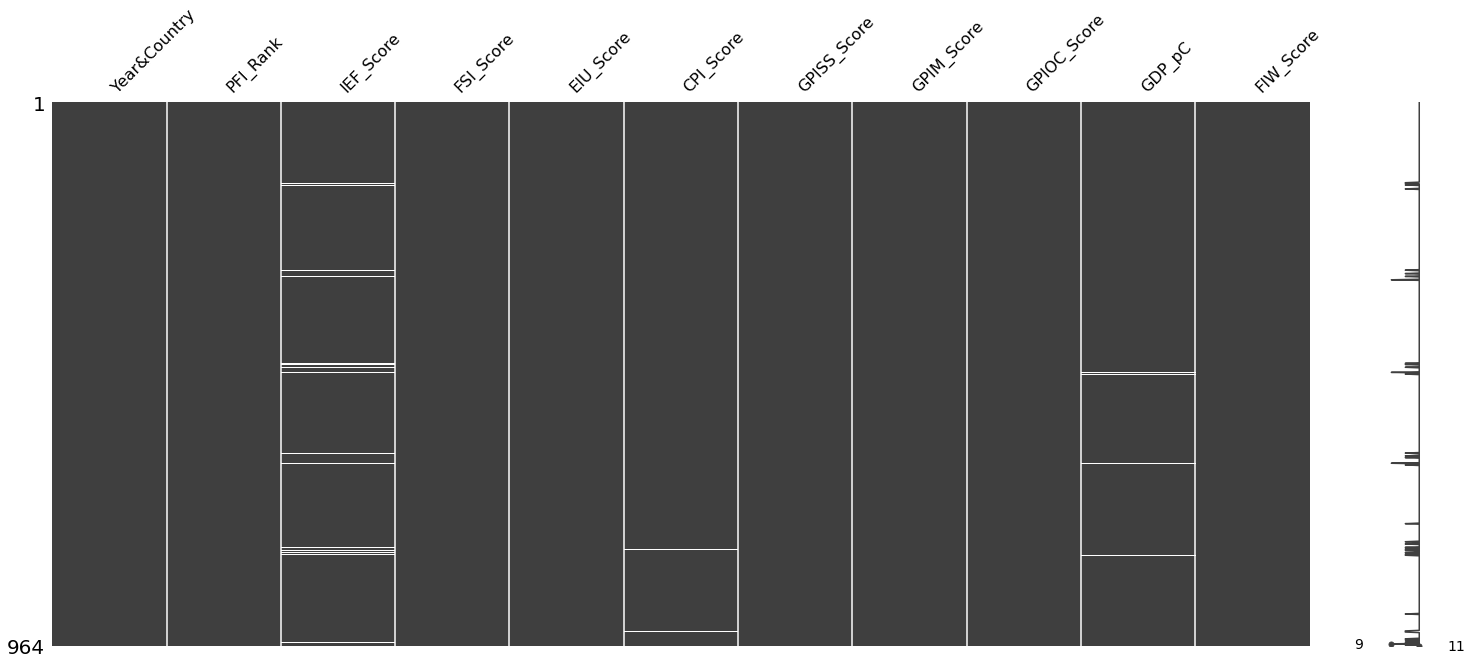

In [123]:
miss.matrix(final_df)

In [124]:
final_df = final_df.dropna()
final_df = final_df.reset_index()
final_df

index                    Year&Country PFI_Rank  IEF_Score   FSI_Score  \
0        0                    2020, Norway        1  73.400000   16.191210   
1        1                   2020, Finland        2  75.700000   14.626666   
2        2                   2020, Denmark        3  78.300000   17.213587   
3        3                    2020, Sweden        4  74.900000   18.209202   
4        4               2020, Netherlands        5  77.000000   22.859835   
5        5                   2020, Jamaica        6  68.500000   60.024947   
6        6                2020, Costa Rica        7  65.800000   40.184018   
7        7               2020, Switzerland        8  82.000000   17.094086   
8        8               2020, New Zealand        9  84.100000   17.879896   
9        9                  2020, Portugal       10  67.000000   23.514663   
10      10                   2020, Germany       11  73.500000   23.188489   
11      11                   2020, Belgium       12  68.900000   27.098145   
12      12                   2020, Ireland       13  80.900000   19.939417   
13      13                   2020, Estonia       14  77.700000   38.523455   
14      14                   2020, Iceland       15  77.100000   17.800000   
15      15                    2020, Canada       16  78.200000   18.668899   
16      16                   2020, Austria       18  73.300000   24.108703   
17      17                   2020, Uruguay       19  69.100000   33.405777   
18      18                    2020, Latvia       22  71.900000   42.311227   
19      19                   2020, Namibia       23  60.900000   65.095915   
20      20                 2020, Australia       26  82.600000   19.746409   
21      21                    2020, Cyprus       27  70.100000   56.057965   
22      22                    2020, Cyprus       27  70.100000   56.057965   
23      23                    2020, Cyprus       77  70.100000   56.057965   
24      24                    2020, Cyprus       77  70.100000   56.057965   
25      25                 2020, Lithuania       28  76.700000   36.470891   
26      26                     2020, Spain       29  66.900000   40.351633   
27      27                     2020, Ghana       30  59.400000   64.158169   
28      28              2020, South Africa       31  58.800000   70.107243   
29      29                  2020, Slovenia       32  67.800000   25.846480   
30      30                  2020, Slovakia       33  66.800000   38.221815   
31      31                    2020, France       34  66.000000   30.481111   
32      32            2020, United Kingdom       35  79.300000   38.260475   
33      33       2020, Trinidad and Tobago       36  58.300000   51.945141   
34      34              2020, Burkina Faso       38  56.700000   85.928523   
35      35                  2020, Botswana       39  69.600000   57.071233   
36      36            2020, Czech Republic       40  74.800000   35.741616   
37      37                     2020, Italy       41  63.800000   42.353130   
38      38               2020, South Korea       42  74.000000   32.015273   
39      39             2020, United States       45  76.600000   38.272758   
40      40          2020, Papua New Guinea       46  58.400000   82.297290   
41      41                   2020, Senegal       47  58.000000   74.564648   
42      42                   2020, Romania       48  69.700000   46.654601   
43      43                    2020, Guyana       49  56.200000   65.951060   
44      44                     2020, Chile       51  76.800000   42.513527   
45      45                2020, Madagascar       54  60.500000   79.530299   
46      46        2020, Dominican Republic       55  60.900000   64.356202   
47      47                 2020, Mauritius       56  74.900000   37.184720   
48      48                     2020, Niger       57  54.700000   95.314883   
49      49    2020, Bosnia and Herzegovina       58  62.600000   70.220406   
50      50                 

In [125]:
final_df = final_df.drop(labels = 'index', axis = 1)

In [126]:
final_df.dtypes

Year&Country     object
PFI_Rank         object
IEF_Score       float64
FSI_Score       float64
EIU_Score       float64
CPI_Score        object
GPISS_Score     float64
GPIM_Score      float64
GPIOC_Score     float64
GDP_pC           object
FIW_Score         int64
dtype: object

In [127]:
final_df.loc[312,'GDP_pC'] = 1700

In [128]:
final_df['PFI_Rank'] = final_df['PFI_Rank'].astype(float)
final_df['CPI_Score'] = final_df['CPI_Score'].astype(float)
final_df['GDP_pC'] = final_df['GDP_pC'].astype(float)
final_df.dtypes

Year&Country     object
PFI_Rank        float64
IEF_Score       float64
FSI_Score       float64
EIU_Score       float64
CPI_Score       float64
GPISS_Score     float64
GPIM_Score      float64
GPIOC_Score     float64
GDP_pC          float64
FIW_Score         int64
dtype: object

In [129]:
# Split the data.
y = final_df[['PFI_Rank']]
X = final_df.drop(columns=['PFI_Rank', 'Year&Country'])
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = .20,random_state=100)

In [130]:
train_X

IEF_Score   FSI_Score  EIU_Score  CPI_Score  GPISS_Score  GPIM_Score  \
772  55.960000   89.700000       2.83       30.0        2.774       2.248   
353  75.700000   37.700000       7.96       71.0        2.082       3.049   
646  65.080000   29.200000       7.86       62.0        1.576       1.218   
174  68.600000   34.000000       8.38       71.0        2.286       1.656   
447  88.800000   30.421203       6.38       85.0        1.311       2.057   
919  47.009172   85.300000       1.95       19.0        2.506       2.234   
308  47.700000  108.000000       2.70       16.0        3.125       2.087   
729  61.810000   83.200000       5.92       28.0        3.009       1.685   
791  67.241849   42.600000       7.29       51.0        1.778       1.325   
861  55.560643   97.300000       5.33       25.0        2.835       1.728   
277  55.200000   74.400000       6.90       41.0        2.184       2.566   
56   73.300000   32.332289       8.13       74.0        1.345       1.414   
569  40.031387   93.400000       3.25       21.0        2.969       2.287   
188  65.500000   28.000000       7.50       60.0        1.353       1.177   
549  53.477003   96.400000       5.11       28.0        2.729       1.730   
268  72.600000   45.400000       3.19       62.0        1.598       2.017   
229  65.000000   49.600000       6.63       44.0        1.772       1.153   
288  58.900000   74.700000       3.11       28.0        3.011       3.252   
450  58.100000   70.540714       3.13       44.0        2.382       2.035   
459  67.700000   64.386758       2.71       36.0        2.730       1.988   
777  42.700000   98.600000       2.37       18.0        3.229       1.892   
512  62.533855   45.200000       7.98       50.0        2.052       1.970   
912  55.620970  103.000000       4.40       30.0        3.208       2.536   
833  60.013559   73.800000       6.71       40.0        2.168       1.680   
736  57.900000   87.400000       4.27       21.0        2.562       2.192   
794  59.633805   70.800000       6.31       53.0        2.557       1.747   
152  52.900000   82.725483       2.71       27.0        2.500       2.070   
684  50.620000   80.900000       6.59       39.0        2.543       1.872   
359  56.800000   83.571630       5.22       25.0        2.473       1.519   
856  46.821911   78.100000       5.75       34.0        2.704       2.048   
239  61.800000   67.000000       6.24       28.0        2.569       1.888   
279  46.200000   75.400000       4.01       35.0        2.348       2.248   
882  57.747928   75.700000       6.72       38.0        2.589       1.555   
395  58.900000   72.070675       6.41       43.0        2.502       1.577   
221  67.200000   47.000000       7.05       36.0        2.489       1.506   
816  54.620702   97.800000       3.85       34.0        2.746       1.814   
622  52.437551   70.200000       3.08       35.0        2.282       2.050   
108  59.500000   92.770368       4.94       27.0        2.762       1.869   
46   60.900000   64.356202       6.32       28.0        2.724       1.545   
853  62.483294   57.500000       3.85       49.0        1.769       1.975   
329  80.400000   20.739305       9.15       73.0        1.589       1.316   
195  62.200000   43.800000       7.52       53.0        2.026       2.023   
378  62.500000   68.060062       6.41       39.0        1.995       1.651   
269  67.300000   75.700000       7.13       37.0        3.391       2.081   
227  67.800000   68.200000       6.60       36.0        2.611       1.774   
54   53.100000   46.087950       6.95       42.0        2.768       1.657   
265  59.700000   95.300000       5.02       28.0        2.749       1.807   
263  74.000000   60.500000       7.16       53.0        2.137       1.323   
197  75.400000   38.900000       8.08       67.0        2.187       1.697   
805  74.742919   43.000000       7.54       59.0        2.120       1.380   
886  37.640856  100.000000       3.05       21.0        2.675       1.836   
1

<AxesSubplot:>

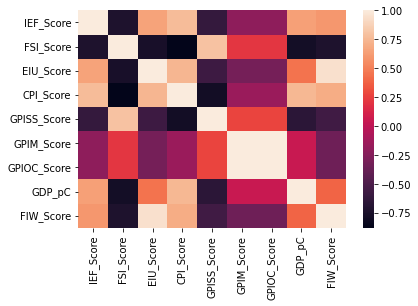

In [131]:
corr_score = train_X[['IEF_Score', 'FSI_Score', 'EIU_Score', 'CPI_Score','GPISS_Score','GPIM_Score','GPIOC_Score','GDP_pC','FIW_Score']].corr()

sns.heatmap(corr_score)

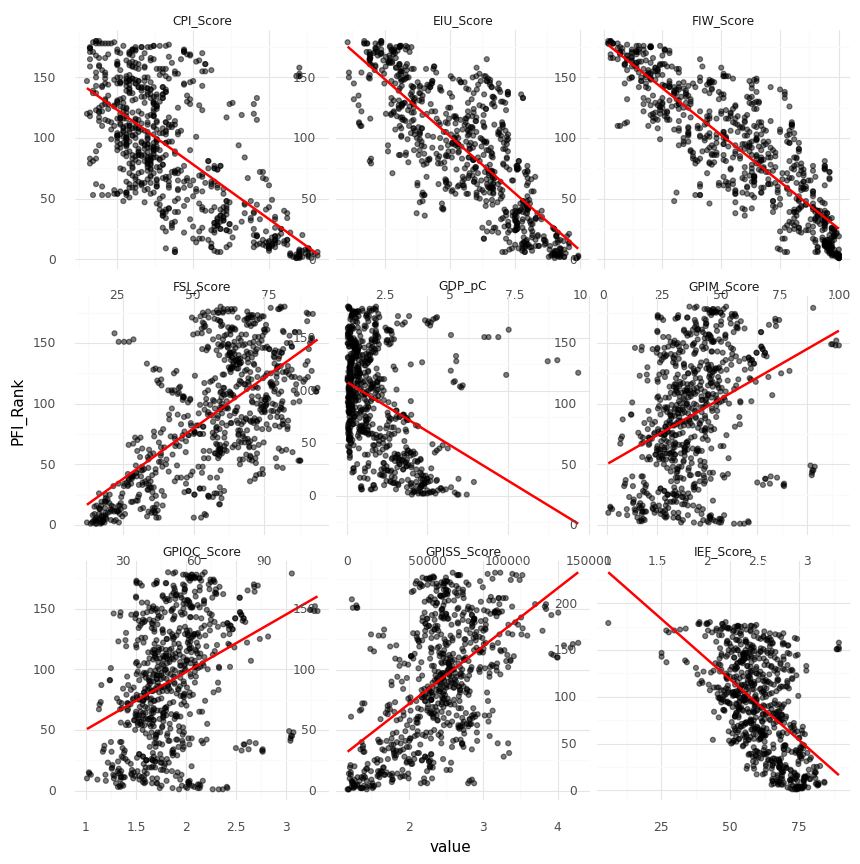

<ggplot: (8771657232559)>

In [132]:
D = train_X.copy()
D['PFI_Rank'] = train_y

(
    ggplot(D.melt(id_vars=["PFI_Rank"]),
           aes(x="value",y="PFI_Rank"))+
    geom_point(alpha=.5) +
    facet_wrap("variable",scales="free") +
    geom_smooth(method="lm",se=False,color="red") +
    theme_minimal() +
    theme(figure_size = (10,10)) 
)

In [133]:
# Set the folds index to ensure comparable samples
fold_generator = KFold(n_splits=5, shuffle=True,random_state=100)

preprocess = ColumnTransformer(transformers=[('num', pp.MinMaxScaler(), ['IEF_Score', 'FSI_Score', 'EIU_Score', 'CPI_Score','GPISS_Score','GPIM_Score','GPIOC_Score','GDP_pC','FIW_Score'])])

pipe = Pipeline(steps=[('pre_process', preprocess),('model',None)])

search_space = [
    # Linear Model
    {'model' : [LM()]},
    
    # KNN with K tuning param
    {'model' : [KNN()],
     'model__n_neighbors':[1,5,10,15,20,25,30]},
    
    # Decision Tree with the Max Depth Param
    {'model': [DTree()],
     'model__max_depth':[2,3,4,5,6]},
    
    # The Bagging decision tree model 
    {'model': [Bag()]},
    
    # Random forest with the N Estimators tuning param
    {'model' : [RF()],
     'model__max_depth':[1,2,3,4,5],
     'model__n_estimators':[100, 300,500,700,900]},
]

search = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='neg_mean_squared_error',
                      n_jobs=4)

search.fit(train_X,train_y['PFI_Rank'])

GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=Pipeline(steps=[('pre_process',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['IEF_Score',
                                                                          'FSI_Score',
                                                                          'EIU_Score',
                                                                          'CPI_Score',
                                                                          'GPISS_Score',
                                                                          'GPIM_Score',
                                                                          'GPIOC_Score',
                                                                          'GDP_pC',
           

In [134]:
search.best_params_

{'model': KNeighborsRegressor(n_neighbors=1), 'model__n_neighbors': 1}

In [135]:
pred_y = search.predict(test_X)

m.r2_score(test_y, pred_y)

0.9707168882535003

In [136]:
rf = search.best_estimator_
vi = permutation_importance(rf, train_X,train_y,n_repeats=5)

In [137]:
vi_dat = pd.DataFrame(dict(variable=train_X.columns,
                           vi = vi['importances_mean'],
                           std = vi['importances_std']))

# Generate intervals
vi_dat['low'] = vi_dat['vi'] - 2*vi_dat['std']
vi_dat['high'] = vi_dat['vi'] + 2*vi_dat['std']

# But in order from most to least important
vi_dat = vi_dat.sort_values(by="vi",ascending=False).reset_index(drop=True)


vi_dat

variable        vi       std       low      high
0    FIW_Score  1.003588  0.048911  0.905765  1.101411
1    CPI_Score  0.352224  0.026099  0.300025  0.404423
2    EIU_Score  0.315758  0.042442  0.230874  0.400642
3    FSI_Score  0.261820  0.012742  0.236337  0.287304
4  GPISS_Score  0.163555  0.009094  0.145368  0.181743
5   GPIM_Score  0.098508  0.009496  0.079516  0.117500
6  GPIOC_Score  0.098508  0.009496  0.079516  0.117500
7    IEF_Score  0.080741  0.008301  0.064139  0.097342
8       GDP_pC  0.052234  0.005173  0.041888  0.062580

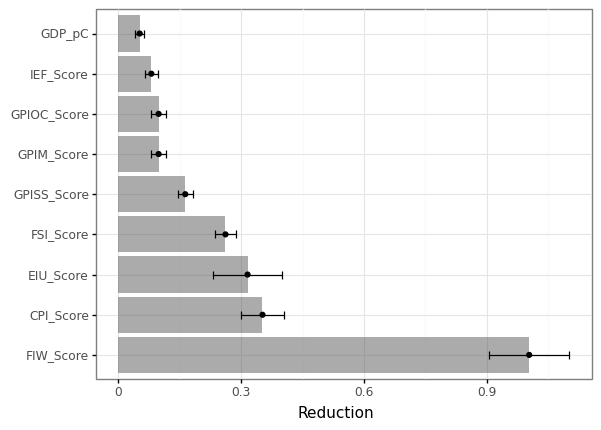

<ggplot: (8771759984415)>

In [138]:
(
    ggplot(vi_dat,
          aes(x="variable",y="vi")) +
    geom_col(alpha=.5) +
    geom_point() +
    geom_errorbar(aes(ymin="low",ymax="high"),width=.2) +
    theme_bw() +
    scale_x_discrete(limits=vi_dat.variable.tolist()) +
    coord_flip() +
    labs(y="Reduction",x="")
)

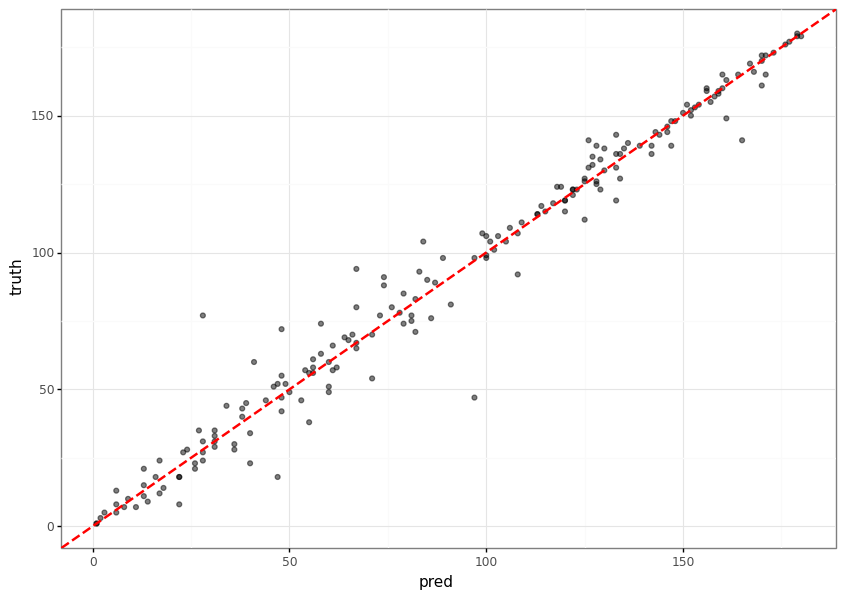

<ggplot: (8771744042427)>

In [139]:
(
    ggplot(pd.DataFrame(dict(pred=pred_y,truth=test_y['PFI_Rank'])),
          aes(x='pred',y="truth")) +
    geom_point(alpha=.5) +
    geom_abline(linetype="dashed",color="red",size=1) +
    theme_bw() +
    theme(figure_size=(10,7))
)

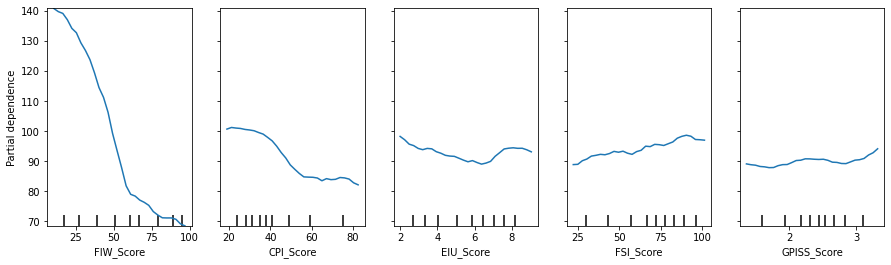

In [140]:
# Target specific features
features = ['FIW_Score','CPI_Score','EIU_Score','FSI_Score','GPISS_Score']

# Calculate the partial dependency
fig, ax = plt.subplots(figsize=(15, 4))
display = plot_partial_dependence(
    rf, train_X, features,n_cols=5,
    n_jobs=4, grid_resolution=30,ax=ax
)

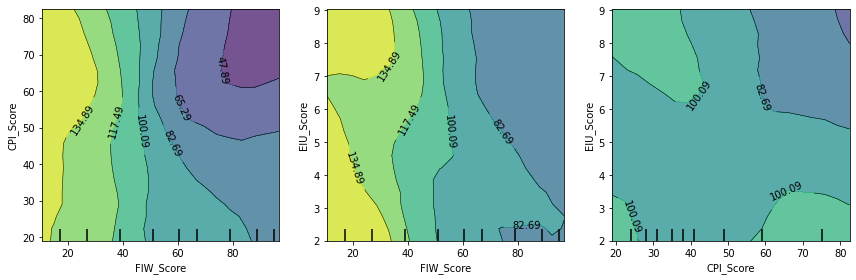

In [141]:
# Feed in the ineraction as a nested list
interacted_features = [['FIW_Score','CPI_Score'],['FIW_Score','EIU_Score'],['CPI_Score','EIU_Score']] 

# Then business as usual when plotting
fig, ax = plt.subplots(figsize=(12, 4))
display = plot_partial_dependence(
    rf, train_X, interacted_features,
    n_cols=3,n_jobs=4, grid_resolution=20,ax=ax
)
fig.tight_layout()

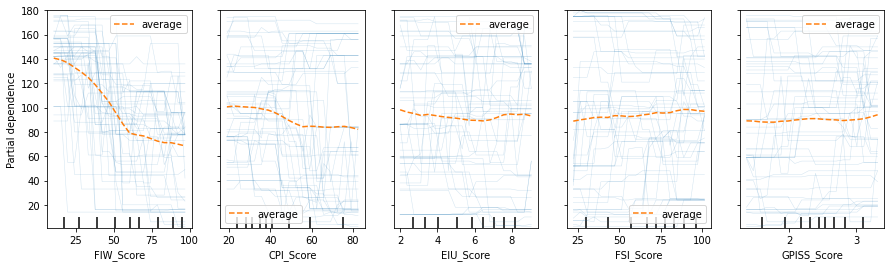

In [142]:
features = ['FIW_Score','CPI_Score','EIU_Score','FSI_Score','GPISS_Score']
fig, ax = plt.subplots(figsize=(15, 4))
display = PartialDependenceDisplay.from_estimator(
    rf,
    train_X,
    features,
    kind="both", # "average" = just PDP, "individual" = just ICE
    subsample=50,
    n_jobs=3,
    grid_resolution=20,
    random_state=0,
    ice_lines_kw={"color": "tab:blue", "alpha": 0.2, "linewidth": 0.5},
    pd_line_kw={"color": "tab:orange", "linestyle": "--"},
    n_cols=len(features),
    ax = ax
)
display.figure_.subplots_adjust(hspace=0.3)